# **Hybrid Multi-Objective Metaheuristic Machine Learning for Pandemic Modeling (Part 2)**

### Import Libraries

In [ ]:
!pip install pyswarms
!pip install sklearn-genetic
!pip install shap
!pip install -U pymoo
!pip install lime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.3/144.3 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 49.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.1/249.1 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 5.6 MB/s eta 0:00:00
  Created wheel for grapheme: filename=grapheme-0.6.0-py3-none-any.whl size=210082 sha256=cfbb49bc34fd260894cc86a2b146e89fbfcb51a4964cc913ff9aaf334381a0b8
  Stored in directory: /root/.cache/pip/wheels/ee/3b/0b/1b865800e916d671a24028d8846986

In [ ]:
import pandas as pd
import numpy as np
import random

import pyswarms as ps
import pyswarms.backend as ps_back
from pyswarms.utils.functions import single_obj as fx
from pyswarms.utils.plotters import (plot_cost_history, plot_contour, plot_surface)

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import ensemble
from sklearn.inspection import permutation_importance
from statistics import mean
from scipy import stats
from scipy.stats import gaussian_kde
from sklearn.metrics import explained_variance_score,r2_score,median_absolute_error,mean_squared_error,mean_absolute_error
from matplotlib.colors import LogNorm
from sklearn.linear_model import LogisticRegression
from lime.lime_tabular import LimeTabularExplainer

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import metrics

from genetic_selection import GeneticSelectionCV

import matplotlib.pyplot as plt
import seaborn as sns
import shap

from pymoo.problems import get_problem
from pymoo.optimize import minimize
from pymoo.algorithms.soo.nonconvex.ga import GA
from pymoo.algorithms.soo.nonconvex.pso import PSO
from pymoo.algorithms.soo.nonconvex.brkga import BRKGA
from pymoo.algorithms.moo.nsga2 import NSGA2

from pymoo.util.running_metric import RunningMetricAnimation
from pymoo.util.running_metric import RunningMetric

from pymoo.core.duplicate import ElementwiseDuplicateElimination
from pymoo.core.mutation import Mutation

from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.mutation.pm import PM
from pymoo.operators.sampling.rnd import FloatRandomSampling
from pymoo.visualization.scatter import Scatter
from pymoo.termination import get_termination
from pymoo.core.problem import Problem

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")


### Initialize & Declaration of Variables

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# set working folder of Google Drive
folder_drive = '/content/drive/MyDrive/Dokument S3 Bismillah/Data/data_saved1.job'

### Load Data

In [ ]:
import joblib

data_saved = joblib.load(folder_drive)

X = data_saved['X']
X_Y1 = data_saved['X_Y1']
X_Y2 = data_saved['X_Y2']
X_Y3 = data_saved['X_Y3']
X_Y4 = data_saved['X_Y4']
X_Y5 = data_saved['X_Y5']
X_Y6 = data_saved['X_Y6']
Y1 = data_saved['Y1']
Y2 = data_saved['Y2']
Y3 = data_saved['Y3']
Y4 = data_saved['Y4']
Y5 = data_saved['Y5']
Y6 = data_saved['Y6']
regrY1 = data_saved['regrY1']
regrY2 = data_saved['regrY2']
regrY3 = data_saved['regrY3']
regrY4 = data_saved['regrY4']
regrY5 = data_saved['regrY5']
regrY6 = data_saved['regrY6']
n_dim_X_features = data_saved['n_dim_X_features']
n_dim_Y_features = data_saved['n_dim_Y_features']
X_features_name = data_saved['X_features_name']
Y_features_name = data_saved['Y_features_name']
shap_values_Y1 = data_saved['shap_values_Y1']
shap_values_Y2 = data_saved['shap_values_Y2']
shap_values_Y3 = data_saved['shap_values_Y3']
shap_values_Y4 = data_saved['shap_values_Y4']
shap_values_Y5 = data_saved['shap_values_Y5']
shap_values_Y6 = data_saved['shap_values_Y6']

#**Novelty SHAPPI**

In [ ]:
print(shap_values_Y1.shape)
print(X_Y1.shape)
print(shap_values_Y1.T)
print(X_Y1)

(951, 12)
(951, 12)
[[-7.7788614e-02 -7.7788614e-02 -7.7788614e-02 ...  5.1598050e-02
   5.1598050e-02  5.1598050e-02]
 [-4.8845850e-05 -5.1765219e-05 -5.1765219e-05 ...  8.4798958e-05
   5.7307989e-05  8.4798958e-05]
 [-1.0485128e+00 -1.0485810e+00 -1.0484886e+00 ...  1.2280760e+00
   1.2278850e+00  1.2280775e+00]
 ...
 [-5.8324438e-02 -5.8364898e-02 -5.8364898e-02 ... -1.0489562e-02
  -1.0489562e-02 -1.0489562e-02]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]]
[[-1.47361173  1.10002451 -0.96659032 ...  2.77435507 -1.47361589
  -1.14797816]
 [-1.47361173  1.10002451 -0.96659032 ...  2.77435507 -1.47361589
  -1.14797816]
 [-1.47361173  1.10002451 -0.96659032 ...  2.77435507 -1.47361589
  -1.14797816]
 ...
 [ 0.68239559 -1.42129298  1.32461437 ...  1.37910828  0.67658351
   1.39057116]
 [ 0.68239559 -1.42129298  1.32469805 ...  1.379108

In [ ]:
print(shap_values_Y2.shape)
print(X_Y2.shape)
print(shap_values_Y2.T)
print(X_Y2)

(951, 12)
(951, 12)
[[-1.78603493e-02 -1.78603493e-02 -1.78603493e-02 ...  1.39492825e-02
   1.39492825e-02  1.39492825e-02]
 [-1.34057424e-04 -1.34057424e-04 -1.34057424e-04 ...  3.29594768e-04
   4.63114411e-04  4.63114411e-04]
 [-1.47933707e-01 -1.48068070e-01 -1.48193836e-01 ...  1.42511353e-01
   1.41375154e-01  1.43837675e-01]
 ...
 [-7.20913522e-03 -7.20913522e-03 -7.20913522e-03 ...  5.89254638e-03
   5.89254638e-03  5.89254638e-03]
 [-1.49644859e-06 -1.49644859e-06 -1.49644859e-06 ...  4.48582250e-06
   4.48582250e-06  4.48582250e-06]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
[[-1.47361173  1.10002451 -0.96659032 ...  2.77435507 -1.47361589
  -1.14797816]
 [-1.47361173  1.10002451 -0.96659032 ...  2.77435507 -1.47361589
  -1.14797816]
 [-1.47361173  1.10002451 -0.96659032 ...  2.77435507 -1.47361589
  -1.14797816]
 ...
 [ 0.68239559 -1.42129298  1.32461437 ...  1.37910828  0.67658351
   1.39057116]
 [ 0.68239559 -

In [ ]:
print(shap_values_Y3.shape)
print(X_Y3.shape)
print(shap_values_Y3.T)
print(X_Y3)

(951, 12)
(951, 12)
[[-8.3245553e-02 -8.3245553e-02 -8.3245553e-02 ...  4.9347527e-02
   4.9347527e-02  4.9347527e-02]
 [-1.6863776e-05 -1.6863776e-05 -1.6863776e-05 ... -2.4281491e-05
  -2.4281491e-05 -2.4281491e-05]
 [-9.5329911e-01 -9.5340937e-01 -9.5341021e-01 ...  1.6710798e+00
   1.6713046e+00  1.6715093e+00]
 ...
 [-3.7425026e-02 -3.7405126e-02 -3.7405126e-02 ... -1.6395690e-02
  -1.6395690e-02 -1.6395690e-02]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]]
[[-1.47361173  1.10002451 -0.96659032 ...  2.77435507 -1.47361589
  -1.14797816]
 [-1.47361173  1.10002451 -0.96659032 ...  2.77435507 -1.47361589
  -1.14797816]
 [-1.47361173  1.10002451 -0.96659032 ...  2.77435507 -1.47361589
  -1.14797816]
 ...
 [ 0.68239559 -1.42129298  1.32461437 ...  1.37910828  0.67658351
   1.39057116]
 [ 0.68239559 -1.42129298  1.32469805 ...  1.379108

In [ ]:
print(shap_values_Y4.shape)
print(X_Y4.shape)
print(shap_values_Y4.T)
print(X_Y4)

(951, 12)
(951, 12)
[[ 1.33837843e-02  1.33837843e-02  1.33853955e-02 ... -3.51518672e-03
  -3.64754559e-03 -3.55199678e-03]
 [ 1.66287078e-04  1.66287078e-04  1.66210069e-04 ...  2.17201561e-03
   2.17201561e-03  9.00625135e-04]
 [-4.81348149e-02 -4.78983223e-02 -4.79220785e-02 ... -1.74779028e-01
  -1.61014035e-01 -1.30737364e-01]
 ...
 [ 1.63048327e-01  1.63267508e-01  1.63267508e-01 ...  3.89183909e-02
   3.89183909e-02  3.89183909e-02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
[[-1.47361173  1.10002451 -0.96659032 ...  2.77435507 -1.47361589
  -1.14797816]
 [-1.47361173  1.10002451 -0.96659032 ...  2.77435507 -1.47361589
  -1.14797816]
 [-1.47361173  1.10002451 -0.96659032 ...  2.77435507 -1.47361589
  -1.14797816]
 ...
 [ 0.68239559 -1.42129298  1.32461437 ...  1.37910828  0.67658351
   1.39057116]
 [ 0.68239559 -

In [ ]:
print(shap_values_Y5.shape)
print(X_Y5.shape)
print(shap_values_Y5.T)
print(X_Y5)

(951, 12)
(951, 12)
[[ 1.33837843e-02  1.33837843e-02  1.33853955e-02 ... -3.51518672e-03
  -3.64754559e-03 -3.55199678e-03]
 [ 1.66287078e-04  1.66287078e-04  1.66210069e-04 ...  2.17201561e-03
   2.17201561e-03  9.00625135e-04]
 [-4.81348149e-02 -4.78983223e-02 -4.79220785e-02 ... -1.74779028e-01
  -1.61014035e-01 -1.30737364e-01]
 ...
 [ 1.63048327e-01  1.63267508e-01  1.63267508e-01 ...  3.89183909e-02
   3.89183909e-02  3.89183909e-02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
[[-1.47361173  1.10002451 -0.96659032 ...  2.77435507 -1.47361589
  -1.14797816]
 [-1.47361173  1.10002451 -0.96659032 ...  2.77435507 -1.47361589
  -1.14797816]
 [-1.47361173  1.10002451 -0.96659032 ...  2.77435507 -1.47361589
  -1.14797816]
 ...
 [ 0.68239559 -1.42129298  1.32461437 ...  1.37910828  0.67658351
   1.39057116]
 [ 0.68239559 -

In [ ]:
print(shap_values_Y6.shape)
print(X_Y6.shape)
print(shap_values_Y6.T)
print(X_Y6)

(951, 12)
(951, 12)
[[ 9.3539683e-03  9.3539683e-03  9.3539683e-03 ... -1.0212215e-02
  -1.0212215e-02 -1.0218284e-02]
 [-3.8354923e-03 -3.8453226e-03 -3.8465930e-03 ...  3.3904873e-03
   3.3904873e-03  3.3354820e-03]
 [-9.3424670e-02 -9.2140652e-02 -9.0548843e-02 ... -5.5630428e-01
  -6.1075085e-01 -6.3277000e-01]
 ...
 [-8.0779374e-01 -8.2377160e-01 -8.2291222e-01 ...  4.2885922e-02
   4.1302174e-02  4.1047357e-02]
 [ 1.4037450e-06  1.4037450e-06  1.4037450e-06 ...  2.5145973e-06
   2.5145973e-06  1.6530907e-06]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]]
[[-1.47361173  1.10002451 -0.96659032 ...  2.77435507 -1.47361589
  -1.14797816]
 [-1.47361173  1.10002451 -0.96659032 ...  2.77435507 -1.47361589
  -1.14797816]
 [-1.47361173  1.10002451 -0.96659032 ...  2.77435507 -1.47361589
  -1.14797816]
 ...
 [ 0.68239559 -1.42129298  1.32461437 ...  1.37910828  0.67658351
   1.39057116]
 [ 0.68239559 -1.42129298  1.32469805 ...  1.379108

In [ ]:
def check_shap_values(shap_values):
  pol = []

  for i in shap_values.T:
    i = [i >= 0]
    pol.append(np.array(i).sum())

  pol = np.where(np.array(pol)>26, "Positive", "Negative")

  return pol

In [ ]:
pol_Y1 = check_shap_values(shap_values_Y1)
print(pol_Y1)

['Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive']


In [ ]:
pol_Y2 = check_shap_values(shap_values_Y2)
print(pol_Y2)

['Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive']


In [ ]:
pol_Y3 = check_shap_values(shap_values_Y3)
print(pol_Y3)

['Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive']


In [ ]:
pol_Y4 = check_shap_values(shap_values_Y4)
print(pol_Y4)

['Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive']


In [ ]:
pol_Y5 = check_shap_values(shap_values_Y5)
print(pol_Y5)

['Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive']


In [ ]:
pol_Y6 = check_shap_values(shap_values_Y6)
print(pol_Y6)

['Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive']


In [ ]:
def analysis_SHAP(shap_values, X_features_name, pol_compare, regr, X, Y):
  print("---------------------------------------------------------------")
  pol_anal = pd.DataFrame(X_features_name)

  pol_anal.columns = ["Feature"]

  #print(pol_anal)

  print("Mean = ", np.abs(shap_values).mean(axis=0))

  pol_anal["SHAP Average"] = pd.DataFrame(shap_values.mean(axis=0))
  pol_anal["SHAP Score"] = pd.DataFrame(np.abs(shap_values).sum(axis=0))

  print("Condition = ", [shap_values.T.mean(axis=1) >= 0])
  print("---------------------------------------------------------------","\n")

  pol_anal["Polarity"] = pol_compare

  perm_imp = permutation_importance(regr, X, Y, n_repeats=10,
                                  random_state=0)
  pol_anal["PI Score"] = pd.DataFrame(perm_imp.importances_mean)
  pol_anal["PI Error"] = pd.DataFrame(perm_imp.importances_std)

  scaler_s = MinMaxScaler(feature_range=(0, 0.1))
  pol_anal["SHAP Score"] = scaler_s.fit_transform(pol_anal["SHAP Score"].values.reshape(-1, 1))

  return pol_anal, perm_imp

In [ ]:
def analysis_SHAPPI(pol_anal, perm_imp):
  print("---------------------------------------------------------------")
  scaler_s = MinMaxScaler(feature_range=(0, 0.1))
  n_shap = scaler_s.fit_transform(pol_anal["SHAP Score"].values.reshape(-1, 1))

  scaler_p = MinMaxScaler()
  n_pi = scaler_p.fit_transform(perm_imp.importances_mean.reshape(-1, 1))

  pol_anal["SHAPPI"] = (n_shap + n_pi)/2

  pol_anal = pol_anal.sort_values(by=["SHAPPI"], ascending=False)

  df_shappi = pol_anal.drop(["SHAP Average", "SHAP Score", "PI Score"], axis=1)

  # df_shappi.to_csv("shappiy2.csv")
  return df_shappi

In [ ]:
# Plotting the SHAP Score, PI Score, and SHAPPI
def plot_shap_pi_shappi(pol_anal, title):
    plt.figure(figsize=(10, 6))

    # SHAP Score plot
    plt.plot(pol_anal['Feature'], pol_anal['SHAP Score'], marker='o', label='SHAP Score', color='b')

    # PI Score plot
    plt.plot(pol_anal['Feature'], pol_anal['PI Score'], marker='s', label='PI Score', color='r')

    # SHAPPI Score plot (if exists)
    if 'SHAPPI' in pol_anal.columns:
        plt.plot(pol_anal['Feature'], pol_anal['SHAPPI'], marker='x', label='SHAPPI Score', color='g')
    else:
        # Calculate SHAPPI if not present
        pol_anal["SHAPPI"] = (pol_anal['SHAP Score'] + pol_anal['PI Score']) / 2
        plt.plot(pol_anal['Feature'], pol_anal['SHAPPI'], marker='x', label='SHAPPI', color='g')

    plt.xlabel("Feature")
    plt.ylabel("Score")
    plt.title(title)
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    plt.show()

In [ ]:
# Function to calculate SHAPPI if not present
def calculate_shappi(pol_anal):
    if 'SHAPPI' not in pol_anal.columns:
        pol_anal['SHAPPI'] = (pol_anal['SHAP Score'] + pol_anal['PI Score']) / 2

In [ ]:
# Function to plot SHAP, PI, SHAPPI Scores and Beanplot
def plot_shap_pi_shappi_with_beanplot(pol_anal, title):
    # Calculate SHAPPI if not already present
    calculate_shappi(pol_anal)

    # Create subplots for line plot and beanplot
    fig, axes = plt.subplots(figsize=(10, 5))

    # Beanplot using seaborn
    sns.violinplot(
        data=pol_anal[['SHAP Score', 'PI Score', 'SHAPPI']],
        ax=axes,
        palette="muted",
        inner="quartile",
        linewidth=1.5
    )
    axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])
    axes.set_ylabel("Score Distribution")
    axes.set_title(title)

    # Add mean annotations to Beanplot
    for i, col in enumerate(['SHAP Score', 'PI Score', 'SHAPPI']):
        mean_val = pol_anal[col].mean()
        axes.text(i, mean_val, f'{mean_val:.2f}', ha='center', va='center', fontsize=10, color='black')

    # Adjust layout
    plt.tight_layout()
    plt.show()

In [ ]:
print("Analysis SHAP Y1 Polarity with Y2:")
pol_anal_Y1_Y2, perm_imp_Y1_Y2 = analysis_SHAP(shap_values_Y1, X_features_name, pol_Y2, regrY1, X_Y1, Y1)

Analysis SHAP Y1 Polarity with Y2:
---------------------------------------------------------------
Mean =  [7.0241496e-02 1.1670313e-04 9.0837318e-01 1.0346279e-02 2.7468039e-03
 4.5867036e-03 1.7783068e-03 9.4873654e-03 1.1246762e-01 2.6715659e-02
 0.0000000e+00 0.0000000e+00]
Condition =  [array([ True, False, False,  True, False,  True,  True, False, False,
        True,  True,  True])]
--------------------------------------------------------------- 



In [ ]:
print("Analysis SHAPPI Y1 Polarity with Y2:")
shappi_Y1_Y2 = analysis_SHAPPI(pol_anal_Y1_Y2, perm_imp_Y1_Y2)
shappi_Y1_Y2

Analysis SHAPPI Y1 Polarity with Y2:
---------------------------------------------------------------


Feature  Polarity      PI Error    SHAPPI
2   number_vaccinations  Positive  5.483615e-02  0.550000
8         inflation_yoy  Positive  3.061404e-03  0.022375
0                   BOR  Positive  3.771381e-04  0.007459
9               BI_rate  Positive  1.436467e-04  0.002983
3     retail_recreation  Positive  1.276967e-04  0.000965
7           residential  Positive  4.677558e-05  0.000794
5                 parks  Positive  2.820760e-05  0.000394
4      grocery_pharmacy  Positive  2.411294e-05  0.000201
6      transit_stations  Positive  3.843331e-06  0.000128
1     medical_personnel  Positive  1.452916e-07  0.000006
10               bansos  Positive  0.000000e+00  0.000000
11         minimum_wage  Positive  0.000000e+00  0.000000

In [ ]:
pol_anal_Y1_Y2

Feature  SHAP Average  SHAP Score  Polarity      PI Score  \
0                   BOR      0.026221    0.007733  Positive  1.232868e-02   
1     medical_personnel     -0.000105    0.000013  Positive  2.217911e-07   
2   number_vaccinations     -0.011828    0.100000  Positive  1.715755e+00   
3     retail_recreation      0.000550    0.001139  Positive  1.355968e-03   
4      grocery_pharmacy     -0.001461    0.000302  Positive  1.696884e-04   
5                 parks      0.000321    0.000505  Positive  4.854886e-04   
6      transit_stations      0.000947    0.000196  Positive  1.028783e-04   
7           residential     -0.002381    0.001044  Positive  9.325627e-04   
8         inflation_yoy     -0.002474    0.012381  Positive  5.553522e-02   
9               BI_rate      0.010243    0.002941  Positive  5.189597e-03   
10               bansos      0.000000    0.000000  Positive  0.000000e+00   
11         minimum_wage      0.000000    0.000000  Positive  0.000000e+00   

        PI Error    SHAPPI  
0   3.771381e-04  0.007459  
1   1.452916e-07  0.000006  
2   5.483615e-02  0.550000  
3   1.276967e-04  0.000965  
4   2.411294e-05  0.000201  
5   2.820760e-05  0.000394  
6   3.843331e-06  0.000128  
7   4.677558e-05  0.000794  
8   3.061404e-03  0.022375  
9   1.436467e-04  0.002983  
10  0.000000e+00  0.000000  
11  0.000000e+00  0.000000

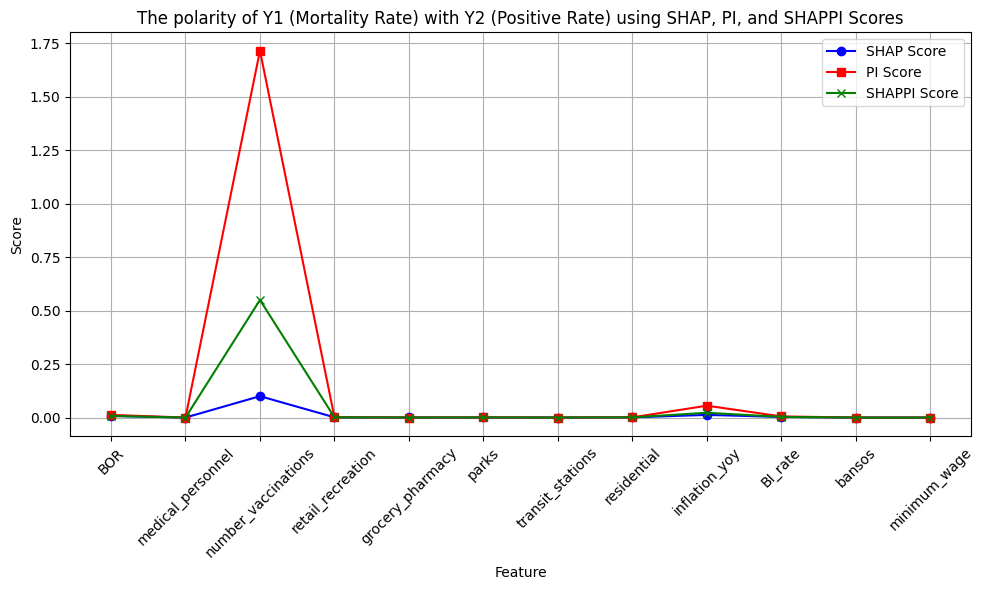

In [ ]:
plot_shap_pi_shappi(pol_anal_Y1_Y2, "The polarity of Y1 (Mortality Rate) with Y2 (Positive Rate) using SHAP, PI, and SHAPPI Scores")

<ipython-input-23-c9a0d6b6b287>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])


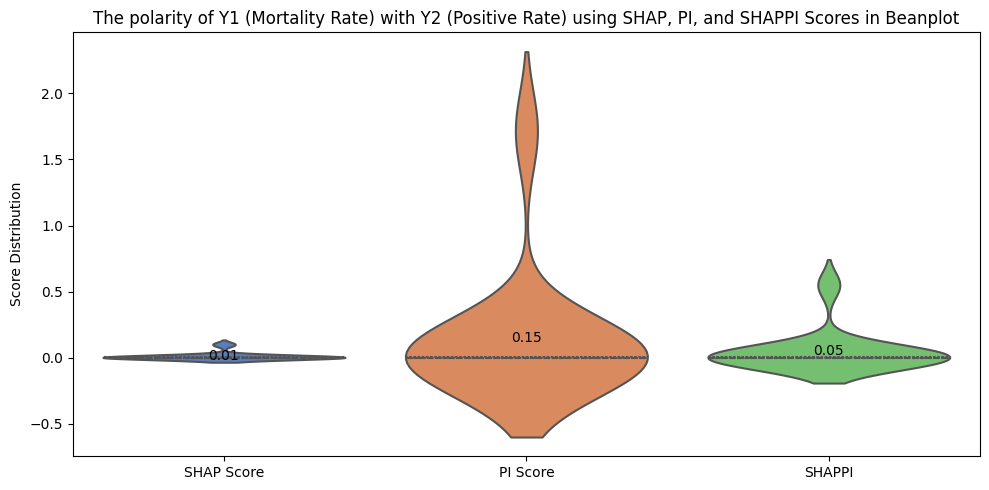

In [ ]:
plot_shap_pi_shappi_with_beanplot(pol_anal_Y1_Y2, "The polarity of Y1 (Mortality Rate) with Y2 (Positive Rate) using SHAP, PI, and SHAPPI Scores in Beanplot")

In [ ]:
print("Analysis SHAP Y1 Polarity with Y3:")
pol_anal_Y1_Y3, perm_imp_Y1_Y3 = analysis_SHAP(shap_values_Y1, X_features_name, pol_Y3, regrY1, X_Y1, Y1)

Analysis SHAP Y1 Polarity with Y3:
---------------------------------------------------------------
Mean =  [7.0241496e-02 1.1670313e-04 9.0837318e-01 1.0346279e-02 2.7468039e-03
 4.5867036e-03 1.7783068e-03 9.4873654e-03 1.1246762e-01 2.6715659e-02
 0.0000000e+00 0.0000000e+00]
Condition =  [array([ True, False, False,  True, False,  True,  True, False, False,
        True,  True,  True])]
--------------------------------------------------------------- 



In [ ]:
print("Analysis SHAPPI Y1 Polarity with Y3:")
shappi_Y1_Y3 = analysis_SHAPPI(pol_anal_Y1_Y3, perm_imp_Y1_Y3)
shappi_Y1_Y3

Analysis SHAPPI Y1 Polarity with Y3:
---------------------------------------------------------------


Feature  Polarity      PI Error    SHAPPI
2   number_vaccinations  Positive  5.483615e-02  0.550000
8         inflation_yoy  Positive  3.061404e-03  0.022375
0                   BOR  Positive  3.771381e-04  0.007459
9               BI_rate  Positive  1.436467e-04  0.002983
3     retail_recreation  Positive  1.276967e-04  0.000965
7           residential  Positive  4.677558e-05  0.000794
5                 parks  Positive  2.820760e-05  0.000394
4      grocery_pharmacy  Positive  2.411294e-05  0.000201
6      transit_stations  Positive  3.843331e-06  0.000128
1     medical_personnel  Positive  1.452916e-07  0.000006
10               bansos  Positive  0.000000e+00  0.000000
11         minimum_wage  Positive  0.000000e+00  0.000000

In [ ]:
pol_anal_Y1_Y3

Feature  SHAP Average  SHAP Score  Polarity      PI Score  \
0                   BOR      0.026221    0.007733  Positive  1.232868e-02   
1     medical_personnel     -0.000105    0.000013  Positive  2.217911e-07   
2   number_vaccinations     -0.011828    0.100000  Positive  1.715755e+00   
3     retail_recreation      0.000550    0.001139  Positive  1.355968e-03   
4      grocery_pharmacy     -0.001461    0.000302  Positive  1.696884e-04   
5                 parks      0.000321    0.000505  Positive  4.854886e-04   
6      transit_stations      0.000947    0.000196  Positive  1.028783e-04   
7           residential     -0.002381    0.001044  Positive  9.325627e-04   
8         inflation_yoy     -0.002474    0.012381  Positive  5.553522e-02   
9               BI_rate      0.010243    0.002941  Positive  5.189597e-03   
10               bansos      0.000000    0.000000  Positive  0.000000e+00   
11         minimum_wage      0.000000    0.000000  Positive  0.000000e+00   

        PI Error    SHAPPI  
0   3.771381e-04  0.007459  
1   1.452916e-07  0.000006  
2   5.483615e-02  0.550000  
3   1.276967e-04  0.000965  
4   2.411294e-05  0.000201  
5   2.820760e-05  0.000394  
6   3.843331e-06  0.000128  
7   4.677558e-05  0.000794  
8   3.061404e-03  0.022375  
9   1.436467e-04  0.002983  
10  0.000000e+00  0.000000  
11  0.000000e+00  0.000000

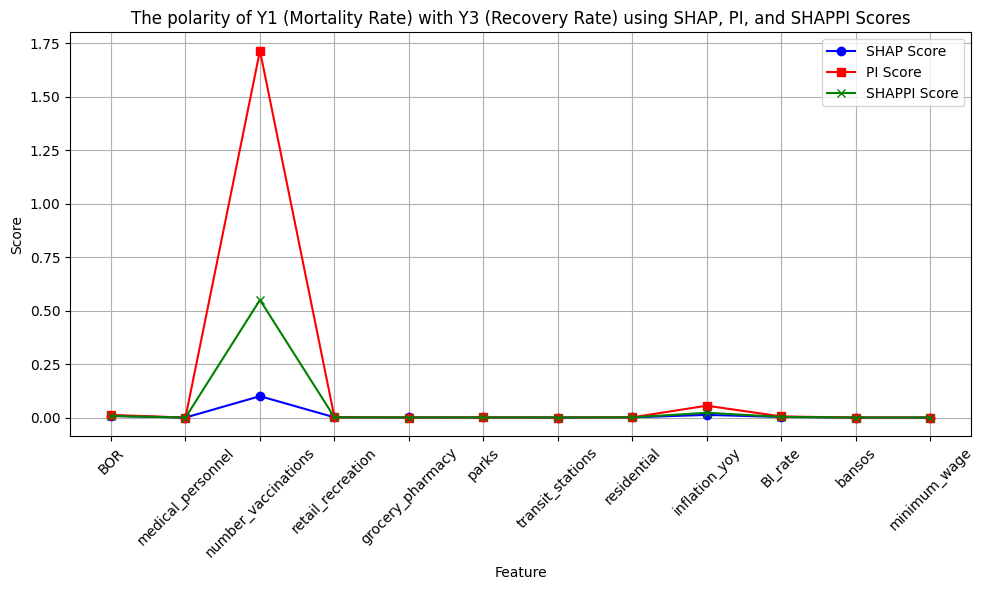

In [ ]:
plot_shap_pi_shappi(pol_anal_Y1_Y3, "The polarity of Y1 (Mortality Rate) with Y3 (Recovery Rate) using SHAP, PI, and SHAPPI Scores")

<ipython-input-23-c9a0d6b6b287>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])


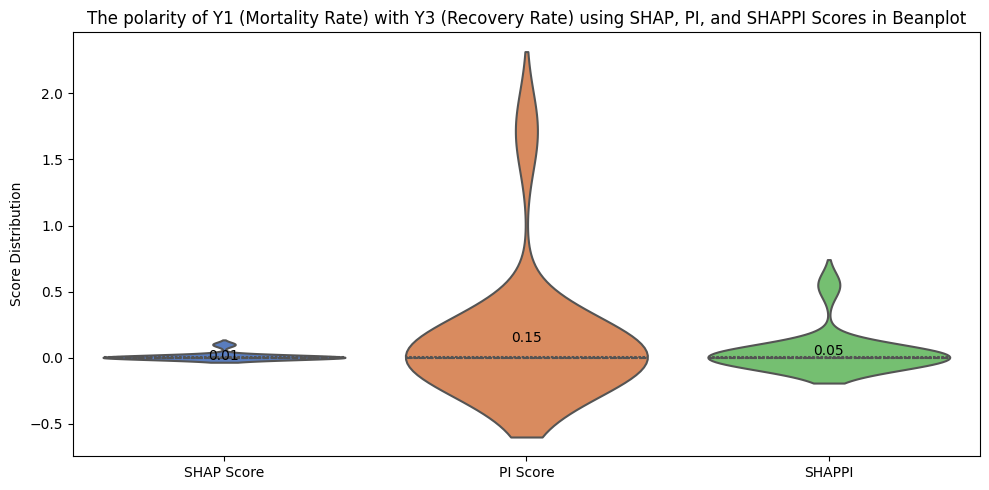

In [ ]:
plot_shap_pi_shappi_with_beanplot(pol_anal_Y1_Y3, "The polarity of Y1 (Mortality Rate) with Y3 (Recovery Rate) using SHAP, PI, and SHAPPI Scores in Beanplot")

In [ ]:
print("Analysis SHAP Y1 Polarity with Y4:")
pol_anal_Y1_Y4, perm_imp_Y1_Y4 = analysis_SHAP(shap_values_Y1, X_features_name, pol_Y4, regrY1, X_Y1, Y1)

Analysis SHAP Y1 Polarity with Y4:
---------------------------------------------------------------
Mean =  [7.0241496e-02 1.1670313e-04 9.0837318e-01 1.0346279e-02 2.7468039e-03
 4.5867036e-03 1.7783068e-03 9.4873654e-03 1.1246762e-01 2.6715659e-02
 0.0000000e+00 0.0000000e+00]
Condition =  [array([ True, False, False,  True, False,  True,  True, False, False,
        True,  True,  True])]
--------------------------------------------------------------- 



In [ ]:
print("Analysis SHAPPI Y1 Polarity with Y4:")
shappi_Y1_Y4 = analysis_SHAPPI(pol_anal_Y1_Y4, perm_imp_Y1_Y4)
shappi_Y1_Y4

Analysis SHAPPI Y1 Polarity with Y4:
---------------------------------------------------------------


Feature  Polarity      PI Error    SHAPPI
2   number_vaccinations  Positive  5.483615e-02  0.550000
8         inflation_yoy  Positive  3.061404e-03  0.022375
0                   BOR  Positive  3.771381e-04  0.007459
9               BI_rate  Positive  1.436467e-04  0.002983
3     retail_recreation  Positive  1.276967e-04  0.000965
7           residential  Positive  4.677558e-05  0.000794
5                 parks  Positive  2.820760e-05  0.000394
4      grocery_pharmacy  Positive  2.411294e-05  0.000201
6      transit_stations  Positive  3.843331e-06  0.000128
1     medical_personnel  Positive  1.452916e-07  0.000006
10               bansos  Positive  0.000000e+00  0.000000
11         minimum_wage  Positive  0.000000e+00  0.000000

In [ ]:
pol_anal_Y1_Y4

Feature  SHAP Average  SHAP Score  Polarity      PI Score  \
0                   BOR      0.026221    0.007733  Positive  1.232868e-02   
1     medical_personnel     -0.000105    0.000013  Positive  2.217911e-07   
2   number_vaccinations     -0.011828    0.100000  Positive  1.715755e+00   
3     retail_recreation      0.000550    0.001139  Positive  1.355968e-03   
4      grocery_pharmacy     -0.001461    0.000302  Positive  1.696884e-04   
5                 parks      0.000321    0.000505  Positive  4.854886e-04   
6      transit_stations      0.000947    0.000196  Positive  1.028783e-04   
7           residential     -0.002381    0.001044  Positive  9.325627e-04   
8         inflation_yoy     -0.002474    0.012381  Positive  5.553522e-02   
9               BI_rate      0.010243    0.002941  Positive  5.189597e-03   
10               bansos      0.000000    0.000000  Positive  0.000000e+00   
11         minimum_wage      0.000000    0.000000  Positive  0.000000e+00   

        PI Error    SHAPPI  
0   3.771381e-04  0.007459  
1   1.452916e-07  0.000006  
2   5.483615e-02  0.550000  
3   1.276967e-04  0.000965  
4   2.411294e-05  0.000201  
5   2.820760e-05  0.000394  
6   3.843331e-06  0.000128  
7   4.677558e-05  0.000794  
8   3.061404e-03  0.022375  
9   1.436467e-04  0.002983  
10  0.000000e+00  0.000000  
11  0.000000e+00  0.000000

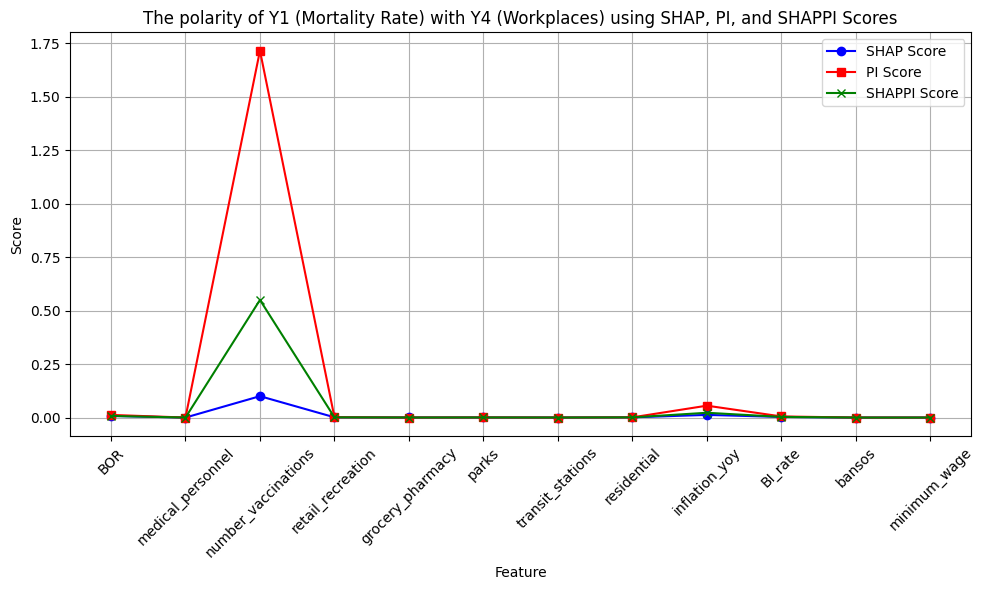

In [ ]:
plot_shap_pi_shappi(pol_anal_Y1_Y4, "The polarity of Y1 (Mortality Rate) with Y4 (Workplaces) using SHAP, PI, and SHAPPI Scores")

<ipython-input-23-c9a0d6b6b287>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])


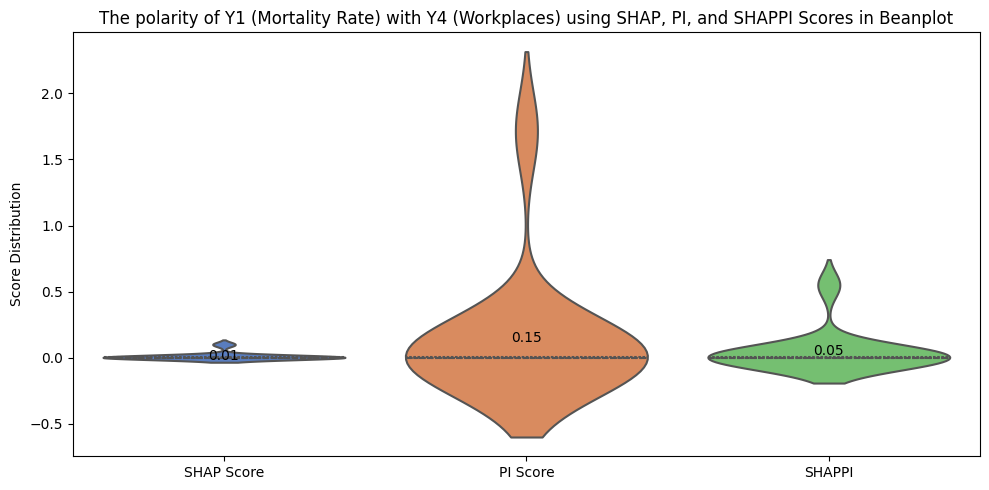

In [ ]:
plot_shap_pi_shappi_with_beanplot(pol_anal_Y1_Y4, "The polarity of Y1 (Mortality Rate) with Y4 (Workplaces) using SHAP, PI, and SHAPPI Scores in Beanplot")

In [ ]:
print("Analysis SHAP Y1 Polarity with Y5:")
pol_anal_Y1_Y5, perm_imp_Y1_Y5 = analysis_SHAP(shap_values_Y1, X_features_name, pol_Y5, regrY1, X_Y1, Y1)

Analysis SHAP Y1 Polarity with Y5:
---------------------------------------------------------------
Mean =  [7.0241496e-02 1.1670313e-04 9.0837318e-01 1.0346279e-02 2.7468039e-03
 4.5867036e-03 1.7783068e-03 9.4873654e-03 1.1246762e-01 2.6715659e-02
 0.0000000e+00 0.0000000e+00]
Condition =  [array([ True, False, False,  True, False,  True,  True, False, False,
        True,  True,  True])]
--------------------------------------------------------------- 



In [ ]:
print("Analysis SHAPPI Y1 Polarity with Y5:")
shappi_Y1_Y5 = analysis_SHAPPI(pol_anal_Y1_Y5, perm_imp_Y1_Y5)
shappi_Y1_Y5

Analysis SHAPPI Y1 Polarity with Y5:
---------------------------------------------------------------


Feature  Polarity      PI Error    SHAPPI
2   number_vaccinations  Positive  5.483615e-02  0.550000
8         inflation_yoy  Positive  3.061404e-03  0.022375
0                   BOR  Positive  3.771381e-04  0.007459
9               BI_rate  Positive  1.436467e-04  0.002983
3     retail_recreation  Positive  1.276967e-04  0.000965
7           residential  Positive  4.677558e-05  0.000794
5                 parks  Positive  2.820760e-05  0.000394
4      grocery_pharmacy  Positive  2.411294e-05  0.000201
6      transit_stations  Positive  3.843331e-06  0.000128
1     medical_personnel  Positive  1.452916e-07  0.000006
10               bansos  Positive  0.000000e+00  0.000000
11         minimum_wage  Positive  0.000000e+00  0.000000

In [ ]:
pol_anal_Y1_Y5

Feature  SHAP Average  SHAP Score  Polarity      PI Score  \
0                   BOR      0.026221    0.007733  Positive  1.232868e-02   
1     medical_personnel     -0.000105    0.000013  Positive  2.217911e-07   
2   number_vaccinations     -0.011828    0.100000  Positive  1.715755e+00   
3     retail_recreation      0.000550    0.001139  Positive  1.355968e-03   
4      grocery_pharmacy     -0.001461    0.000302  Positive  1.696884e-04   
5                 parks      0.000321    0.000505  Positive  4.854886e-04   
6      transit_stations      0.000947    0.000196  Positive  1.028783e-04   
7           residential     -0.002381    0.001044  Positive  9.325627e-04   
8         inflation_yoy     -0.002474    0.012381  Positive  5.553522e-02   
9               BI_rate      0.010243    0.002941  Positive  5.189597e-03   
10               bansos      0.000000    0.000000  Positive  0.000000e+00   
11         minimum_wage      0.000000    0.000000  Positive  0.000000e+00   

        PI Error    SHAPPI  
0   3.771381e-04  0.007459  
1   1.452916e-07  0.000006  
2   5.483615e-02  0.550000  
3   1.276967e-04  0.000965  
4   2.411294e-05  0.000201  
5   2.820760e-05  0.000394  
6   3.843331e-06  0.000128  
7   4.677558e-05  0.000794  
8   3.061404e-03  0.022375  
9   1.436467e-04  0.002983  
10  0.000000e+00  0.000000  
11  0.000000e+00  0.000000

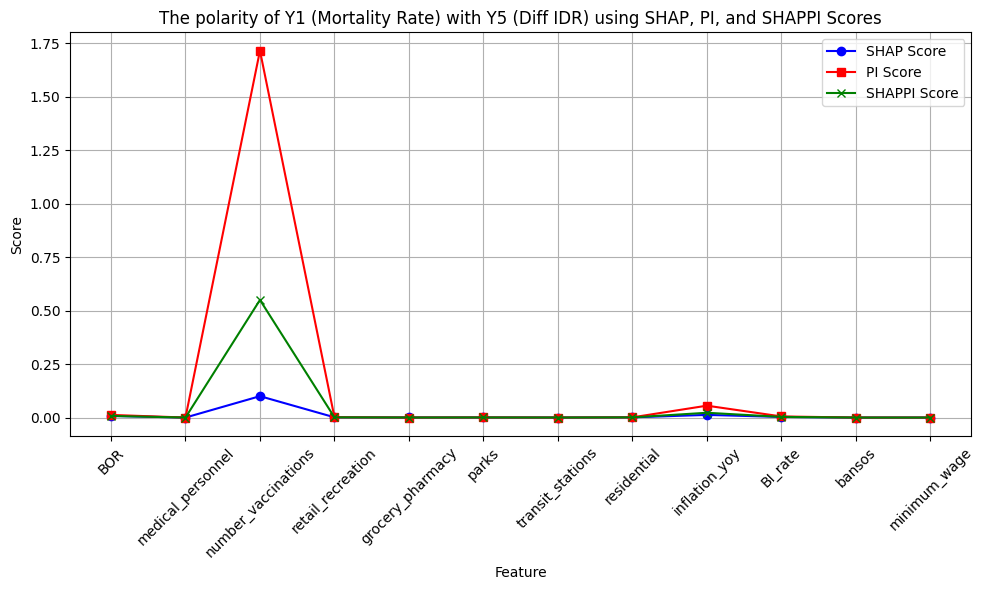

In [ ]:
plot_shap_pi_shappi(pol_anal_Y1_Y5, "The polarity of Y1 (Mortality Rate) with Y5 (Diff IDR) using SHAP, PI, and SHAPPI Scores")

<ipython-input-23-c9a0d6b6b287>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])


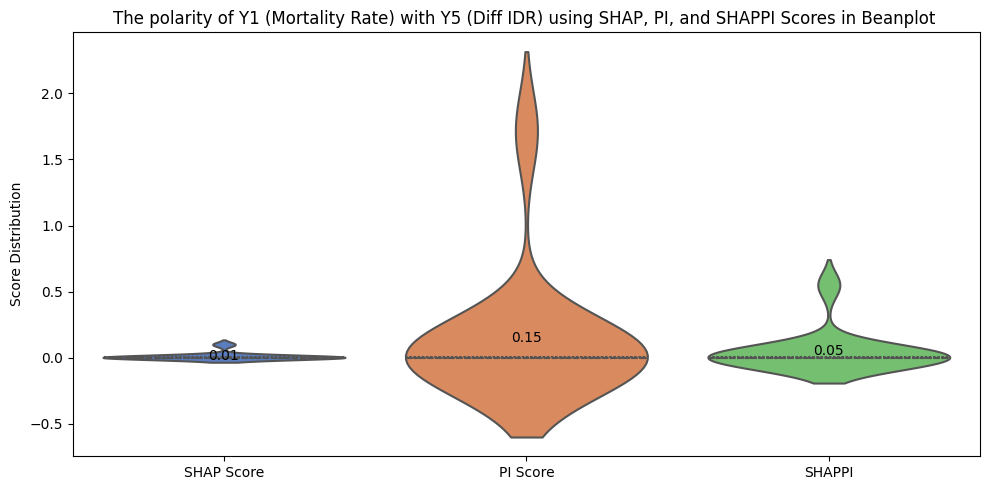

In [ ]:
plot_shap_pi_shappi_with_beanplot(pol_anal_Y1_Y5, "The polarity of Y1 (Mortality Rate) with Y5 (Diff IDR) using SHAP, PI, and SHAPPI Scores in Beanplot ")

In [ ]:
print("Analysis SHAP Y1 Polarity with Y6:")
pol_anal_Y1_Y6, perm_imp_Y1_Y6 = analysis_SHAP(shap_values_Y1, X_features_name, pol_Y6, regrY1, X_Y1, Y1)

Analysis SHAP Y1 Polarity with Y6:
---------------------------------------------------------------
Mean =  [7.0241496e-02 1.1670313e-04 9.0837318e-01 1.0346279e-02 2.7468039e-03
 4.5867036e-03 1.7783068e-03 9.4873654e-03 1.1246762e-01 2.6715659e-02
 0.0000000e+00 0.0000000e+00]
Condition =  [array([ True, False, False,  True, False,  True,  True, False, False,
        True,  True,  True])]
--------------------------------------------------------------- 



In [ ]:
print("Analysis SHAPPI Y1 Polarity with Y6:")
shappi_Y1_Y6 = analysis_SHAPPI(pol_anal_Y1_Y6, perm_imp_Y1_Y6)
shappi_Y1_Y6

Analysis SHAPPI Y1 Polarity with Y6:
---------------------------------------------------------------


Feature  Polarity      PI Error    SHAPPI
2   number_vaccinations  Positive  5.483615e-02  0.550000
8         inflation_yoy  Positive  3.061404e-03  0.022375
0                   BOR  Positive  3.771381e-04  0.007459
9               BI_rate  Positive  1.436467e-04  0.002983
3     retail_recreation  Positive  1.276967e-04  0.000965
7           residential  Positive  4.677558e-05  0.000794
5                 parks  Positive  2.820760e-05  0.000394
4      grocery_pharmacy  Positive  2.411294e-05  0.000201
6      transit_stations  Positive  3.843331e-06  0.000128
1     medical_personnel  Positive  1.452916e-07  0.000006
10               bansos  Positive  0.000000e+00  0.000000
11         minimum_wage  Positive  0.000000e+00  0.000000

In [ ]:
pol_anal_Y1_Y6

Feature  SHAP Average  SHAP Score  Polarity      PI Score  \
0                   BOR      0.026221    0.007733  Positive  1.232868e-02   
1     medical_personnel     -0.000105    0.000013  Positive  2.217911e-07   
2   number_vaccinations     -0.011828    0.100000  Positive  1.715755e+00   
3     retail_recreation      0.000550    0.001139  Positive  1.355968e-03   
4      grocery_pharmacy     -0.001461    0.000302  Positive  1.696884e-04   
5                 parks      0.000321    0.000505  Positive  4.854886e-04   
6      transit_stations      0.000947    0.000196  Positive  1.028783e-04   
7           residential     -0.002381    0.001044  Positive  9.325627e-04   
8         inflation_yoy     -0.002474    0.012381  Positive  5.553522e-02   
9               BI_rate      0.010243    0.002941  Positive  5.189597e-03   
10               bansos      0.000000    0.000000  Positive  0.000000e+00   
11         minimum_wage      0.000000    0.000000  Positive  0.000000e+00   

        PI Error    SHAPPI  
0   3.771381e-04  0.007459  
1   1.452916e-07  0.000006  
2   5.483615e-02  0.550000  
3   1.276967e-04  0.000965  
4   2.411294e-05  0.000201  
5   2.820760e-05  0.000394  
6   3.843331e-06  0.000128  
7   4.677558e-05  0.000794  
8   3.061404e-03  0.022375  
9   1.436467e-04  0.002983  
10  0.000000e+00  0.000000  
11  0.000000e+00  0.000000

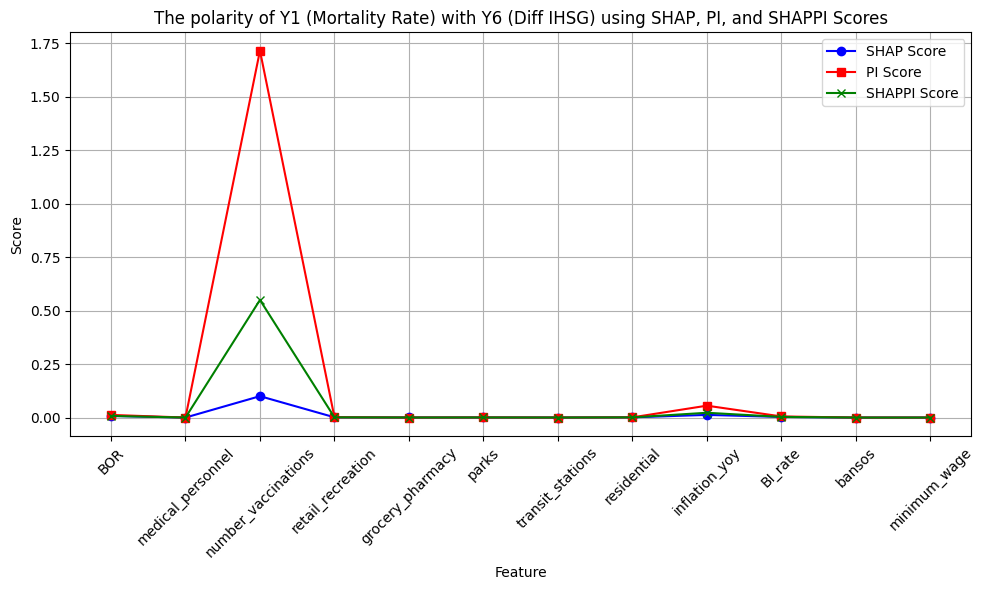

In [ ]:
plot_shap_pi_shappi(pol_anal_Y1_Y6, "The polarity of Y1 (Mortality Rate) with Y6 (Diff IHSG) using SHAP, PI, and SHAPPI Scores")

<ipython-input-23-c9a0d6b6b287>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])


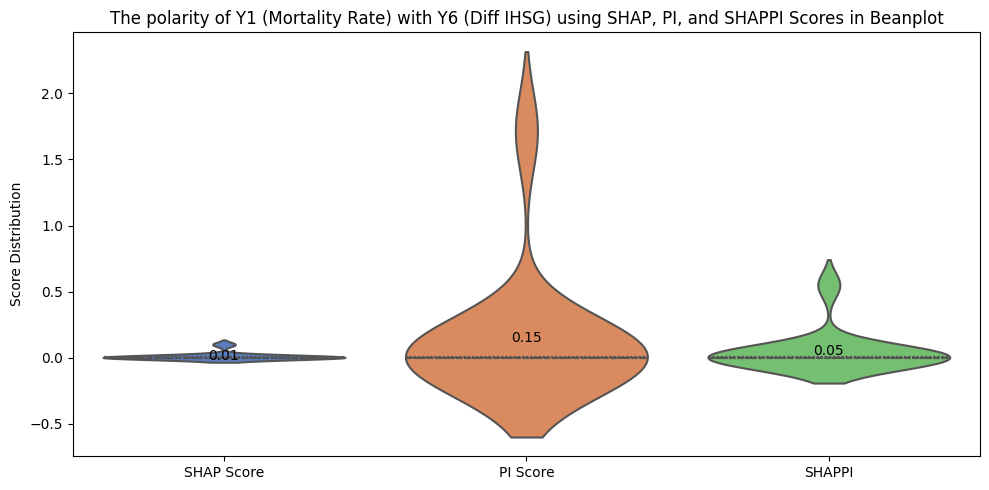

In [ ]:
plot_shap_pi_shappi_with_beanplot(pol_anal_Y1_Y6, "The polarity of Y1 (Mortality Rate) with Y6 (Diff IHSG) using SHAP, PI, and SHAPPI Scores in Beanplot")

In [ ]:
print("Analysis SHAP Y2 Polarity with Y1:")
pol_anal_Y2_Y1, perm_imp_Y2_Y1 = analysis_SHAP(shap_values_Y2, X_features_name, pol_Y1, regrY2, X_Y2, Y2)

Analysis SHAP Y2 Polarity with Y1:
---------------------------------------------------------------
Mean =  [4.9485948e-02 3.1799066e-04 4.8669115e-01 2.5604038e-02 6.9400139e-02
 2.5373284e-02 4.6517517e-02 3.2975927e-02 5.0224638e-01 2.1775883e-02
 3.8155671e-05 0.0000000e+00]
Condition =  [array([False,  True, False,  True, False,  True, False, False,  True,
       False, False,  True])]
--------------------------------------------------------------- 



In [ ]:
print("Analysis SHAPPI Y2 Polarity with Y1:")
shappi_Y2_Y1 = analysis_SHAPPI(pol_anal_Y2_Y1, perm_imp_Y2_Y1)
shappi_Y2_Y1

Analysis SHAPPI Y2 Polarity with Y1:
---------------------------------------------------------------


Feature  Polarity      PI Error    SHAPPI
2   number_vaccinations  Positive  8.664513e-02  0.548451
8         inflation_yoy  Positive  5.674266e-02  0.379085
0                   BOR  Positive  4.615036e-03  0.016724
6      transit_stations  Positive  5.711109e-03  0.016428
7           residential  Positive  2.352375e-03  0.014906
4      grocery_pharmacy  Positive  3.415858e-03  0.012988
5                 parks  Positive  1.402657e-03  0.007399
3     retail_recreation  Positive  8.627769e-04  0.005389
9               BI_rate  Positive  1.093945e-03  0.005093
1     medical_personnel  Positive  1.094488e-06  0.000033
10               bansos  Positive  5.697426e-07  0.000004
11         minimum_wage  Positive  0.000000e+00  0.000000

In [ ]:
pol_anal_Y2_Y1

Feature  SHAP Average  SHAP Score  Polarity  PI Score  \
0                   BOR     -0.007029    0.009853  Positive  0.041292   
1     medical_personnel      0.000184    0.000063  Positive  0.000005   
2   number_vaccinations     -0.142672    0.096903  Positive  1.749961   
3     retail_recreation      0.000251    0.005098  Positive  0.009940   
4      grocery_pharmacy     -0.009044    0.013818  Positive  0.021275   
5                 parks      0.005602    0.005052  Positive  0.017056   
6      transit_stations     -0.005807    0.009262  Positive  0.041288   
7           residential     -0.006291    0.006566  Positive  0.040679   
8         inflation_yoy      0.180791    0.100000  Positive  1.151773   
9               BI_rate     -0.000044    0.004336  Positive  0.010238   
10               bansos     -0.000034    0.000008  Positive  0.000002   
11         minimum_wage      0.000000    0.000000  Positive  0.000000   

        PI Error    SHAPPI  
0   4.615036e-03  0.016724  
1   1.094488e-06  0.000033  
2   8.664513e-02  0.548451  
3   8.627769e-04  0.005389  
4   3.415858e-03  0.012988  
5   1.402657e-03  0.007399  
6   5.711109e-03  0.016428  
7   2.352375e-03  0.014906  
8   5.674266e-02  0.379085  
9   1.093945e-03  0.005093  
10  5.697426e-07  0.000004  
11  0.000000e+00  0.000000

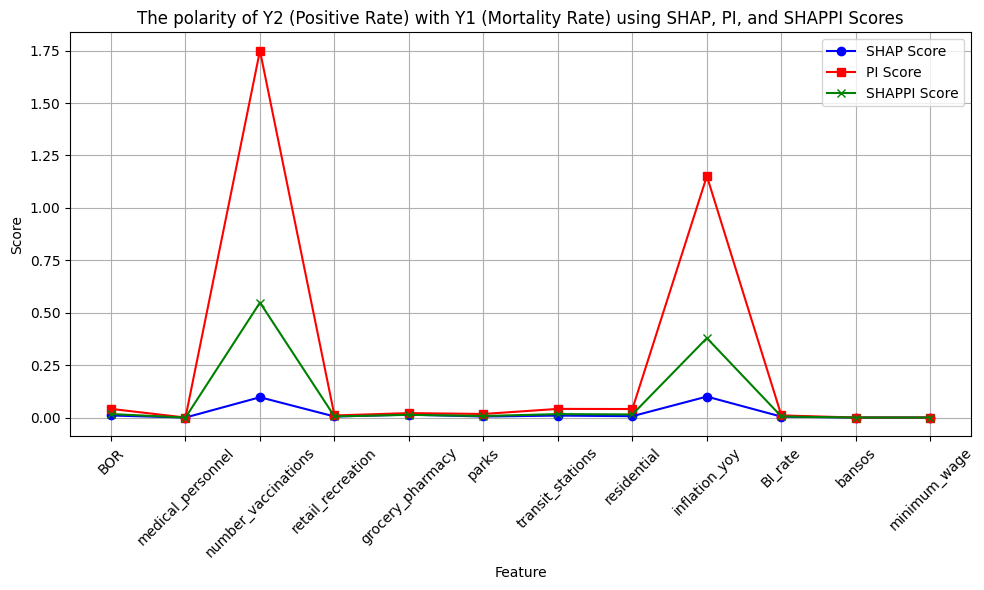

In [ ]:
plot_shap_pi_shappi(pol_anal_Y2_Y1, "The polarity of Y2 (Positive Rate) with Y1 (Mortality Rate) using SHAP, PI, and SHAPPI Scores")

<ipython-input-23-c9a0d6b6b287>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])


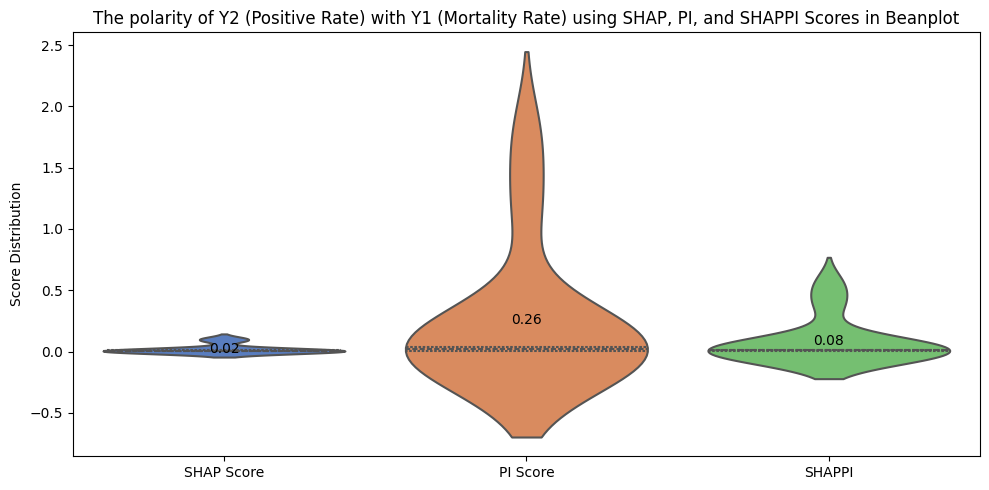

In [ ]:
plot_shap_pi_shappi_with_beanplot(pol_anal_Y2_Y1, "The polarity of Y2 (Positive Rate) with Y1 (Mortality Rate) using SHAP, PI, and SHAPPI Scores in Beanplot")

In [ ]:
print("Analysis SHAP Y2 Polarity with Y3:")
pol_anal_Y2_Y3, perm_imp_Y2_Y3 = analysis_SHAP(shap_values_Y2, X_features_name, pol_Y3, regrY2, X_Y2, Y2)

Analysis SHAP Y2 Polarity with Y3:
---------------------------------------------------------------
Mean =  [4.9485948e-02 3.1799066e-04 4.8669115e-01 2.5604038e-02 6.9400139e-02
 2.5373284e-02 4.6517517e-02 3.2975927e-02 5.0224638e-01 2.1775883e-02
 3.8155671e-05 0.0000000e+00]
Condition =  [array([False,  True, False,  True, False,  True, False, False,  True,
       False, False,  True])]
--------------------------------------------------------------- 



In [ ]:
print("Analysis SHAPPI Y2 Polarity with Y3:")
shappi_Y2_Y3 = analysis_SHAPPI(pol_anal_Y2_Y3, perm_imp_Y2_Y3)
shappi_Y2_Y3

Analysis SHAPPI Y2 Polarity with Y3:
---------------------------------------------------------------


Feature  Polarity      PI Error    SHAPPI
2   number_vaccinations  Positive  8.664513e-02  0.548451
8         inflation_yoy  Positive  5.674266e-02  0.379085
0                   BOR  Positive  4.615036e-03  0.016724
6      transit_stations  Positive  5.711109e-03  0.016428
7           residential  Positive  2.352375e-03  0.014906
4      grocery_pharmacy  Positive  3.415858e-03  0.012988
5                 parks  Positive  1.402657e-03  0.007399
3     retail_recreation  Positive  8.627769e-04  0.005389
9               BI_rate  Positive  1.093945e-03  0.005093
1     medical_personnel  Positive  1.094488e-06  0.000033
10               bansos  Positive  5.697426e-07  0.000004
11         minimum_wage  Positive  0.000000e+00  0.000000

In [ ]:
pol_anal_Y2_Y3

Feature  SHAP Average  SHAP Score  Polarity  PI Score  \
0                   BOR     -0.007029    0.009853  Positive  0.041292   
1     medical_personnel      0.000184    0.000063  Positive  0.000005   
2   number_vaccinations     -0.142672    0.096903  Positive  1.749961   
3     retail_recreation      0.000251    0.005098  Positive  0.009940   
4      grocery_pharmacy     -0.009044    0.013818  Positive  0.021275   
5                 parks      0.005602    0.005052  Positive  0.017056   
6      transit_stations     -0.005807    0.009262  Positive  0.041288   
7           residential     -0.006291    0.006566  Positive  0.040679   
8         inflation_yoy      0.180791    0.100000  Positive  1.151773   
9               BI_rate     -0.000044    0.004336  Positive  0.010238   
10               bansos     -0.000034    0.000008  Positive  0.000002   
11         minimum_wage      0.000000    0.000000  Positive  0.000000   

        PI Error    SHAPPI  
0   4.615036e-03  0.016724  
1   1.094488e-06  0.000033  
2   8.664513e-02  0.548451  
3   8.627769e-04  0.005389  
4   3.415858e-03  0.012988  
5   1.402657e-03  0.007399  
6   5.711109e-03  0.016428  
7   2.352375e-03  0.014906  
8   5.674266e-02  0.379085  
9   1.093945e-03  0.005093  
10  5.697426e-07  0.000004  
11  0.000000e+00  0.000000

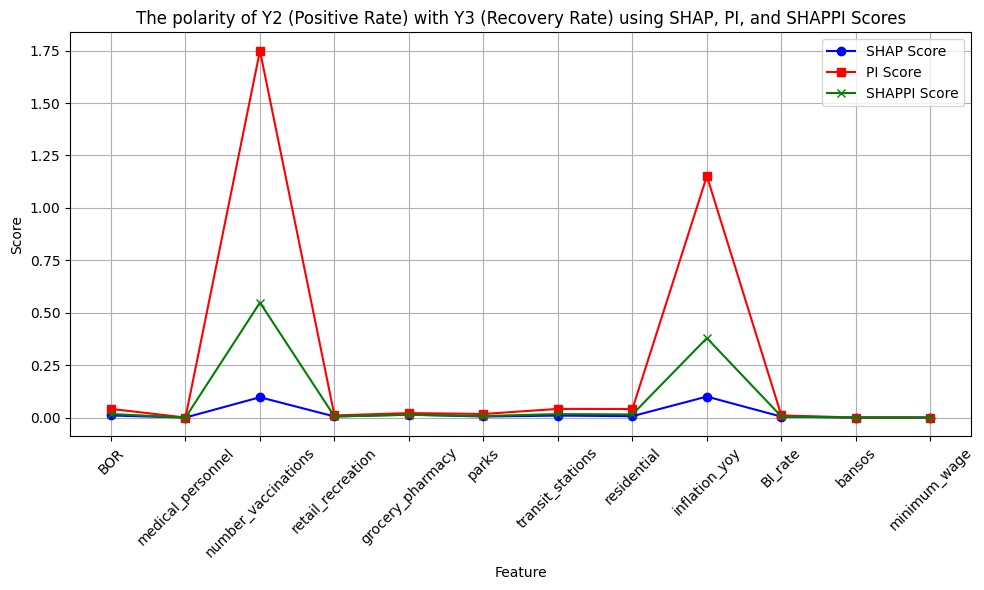

In [ ]:
plot_shap_pi_shappi(pol_anal_Y2_Y3, "The polarity of Y2 (Positive Rate) with Y3 (Recovery Rate) using SHAP, PI, and SHAPPI Scores")

<ipython-input-23-c9a0d6b6b287>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])


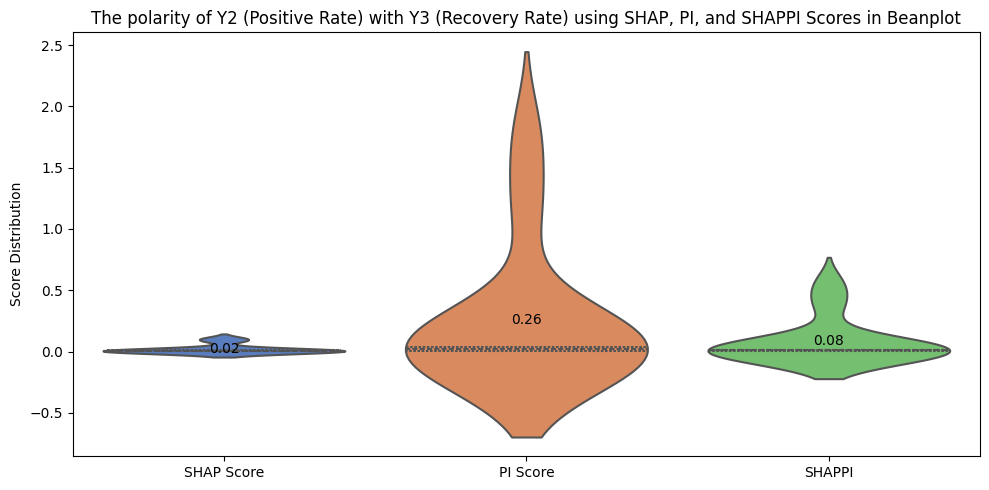

In [ ]:
plot_shap_pi_shappi_with_beanplot(pol_anal_Y2_Y3, "The polarity of Y2 (Positive Rate) with Y3 (Recovery Rate) using SHAP, PI, and SHAPPI Scores in Beanplot")

In [ ]:
print("Analysis SHAP Y2 Polarity with Y4:")
pol_anal_Y2_Y4, perm_imp_Y2_Y4 = analysis_SHAP(shap_values_Y2, X_features_name, pol_Y4, regrY2, X_Y2, Y2)

Analysis SHAP Y2 Polarity with Y4:
---------------------------------------------------------------
Mean =  [4.9485948e-02 3.1799066e-04 4.8669115e-01 2.5604038e-02 6.9400139e-02
 2.5373284e-02 4.6517517e-02 3.2975927e-02 5.0224638e-01 2.1775883e-02
 3.8155671e-05 0.0000000e+00]
Condition =  [array([False,  True, False,  True, False,  True, False, False,  True,
       False, False,  True])]
--------------------------------------------------------------- 



In [ ]:
print("Analysis SHAPPI Y2 Polarity with Y4:")
shappi_Y2_Y4 = analysis_SHAPPI(pol_anal_Y2_Y4, perm_imp_Y2_Y4)
shappi_Y2_Y4

Analysis SHAPPI Y2 Polarity with Y4:
---------------------------------------------------------------


Feature  Polarity      PI Error    SHAPPI
2   number_vaccinations  Positive  8.664513e-02  0.548451
8         inflation_yoy  Positive  5.674266e-02  0.379085
0                   BOR  Positive  4.615036e-03  0.016724
6      transit_stations  Positive  5.711109e-03  0.016428
7           residential  Positive  2.352375e-03  0.014906
4      grocery_pharmacy  Positive  3.415858e-03  0.012988
5                 parks  Positive  1.402657e-03  0.007399
3     retail_recreation  Positive  8.627769e-04  0.005389
9               BI_rate  Positive  1.093945e-03  0.005093
1     medical_personnel  Positive  1.094488e-06  0.000033
10               bansos  Positive  5.697426e-07  0.000004
11         minimum_wage  Positive  0.000000e+00  0.000000

In [ ]:
pol_anal_Y2_Y4

Feature  SHAP Average  SHAP Score  Polarity  PI Score  \
0                   BOR     -0.007029    0.009853  Positive  0.041292   
1     medical_personnel      0.000184    0.000063  Positive  0.000005   
2   number_vaccinations     -0.142672    0.096903  Positive  1.749961   
3     retail_recreation      0.000251    0.005098  Positive  0.009940   
4      grocery_pharmacy     -0.009044    0.013818  Positive  0.021275   
5                 parks      0.005602    0.005052  Positive  0.017056   
6      transit_stations     -0.005807    0.009262  Positive  0.041288   
7           residential     -0.006291    0.006566  Positive  0.040679   
8         inflation_yoy      0.180791    0.100000  Positive  1.151773   
9               BI_rate     -0.000044    0.004336  Positive  0.010238   
10               bansos     -0.000034    0.000008  Positive  0.000002   
11         minimum_wage      0.000000    0.000000  Positive  0.000000   

        PI Error    SHAPPI  
0   4.615036e-03  0.016724  
1   1.094488e-06  0.000033  
2   8.664513e-02  0.548451  
3   8.627769e-04  0.005389  
4   3.415858e-03  0.012988  
5   1.402657e-03  0.007399  
6   5.711109e-03  0.016428  
7   2.352375e-03  0.014906  
8   5.674266e-02  0.379085  
9   1.093945e-03  0.005093  
10  5.697426e-07  0.000004  
11  0.000000e+00  0.000000

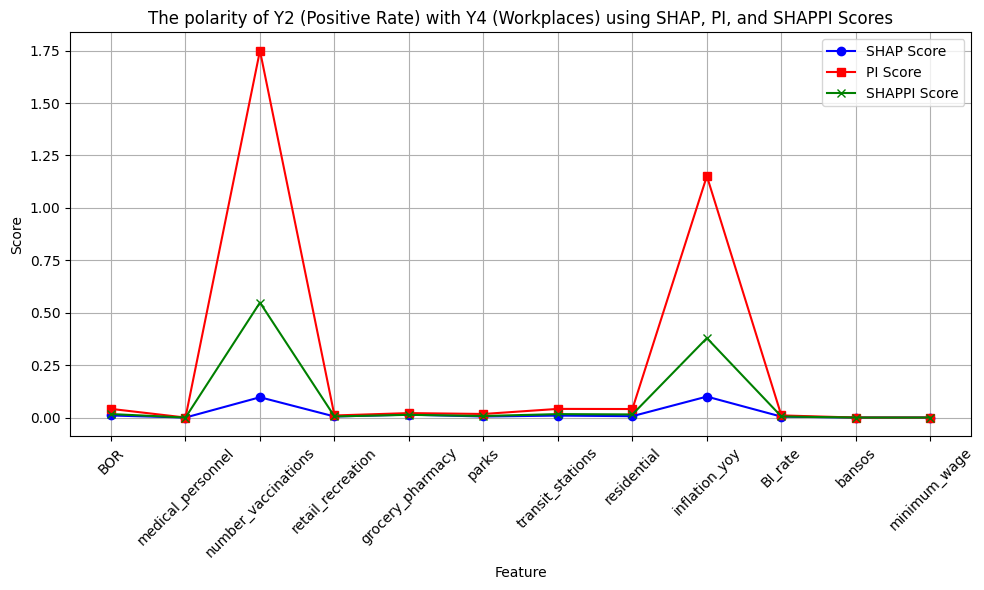

In [ ]:
plot_shap_pi_shappi(pol_anal_Y2_Y4, "The polarity of Y2 (Positive Rate) with Y4 (Workplaces) using SHAP, PI, and SHAPPI Scores")

<ipython-input-23-c9a0d6b6b287>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])


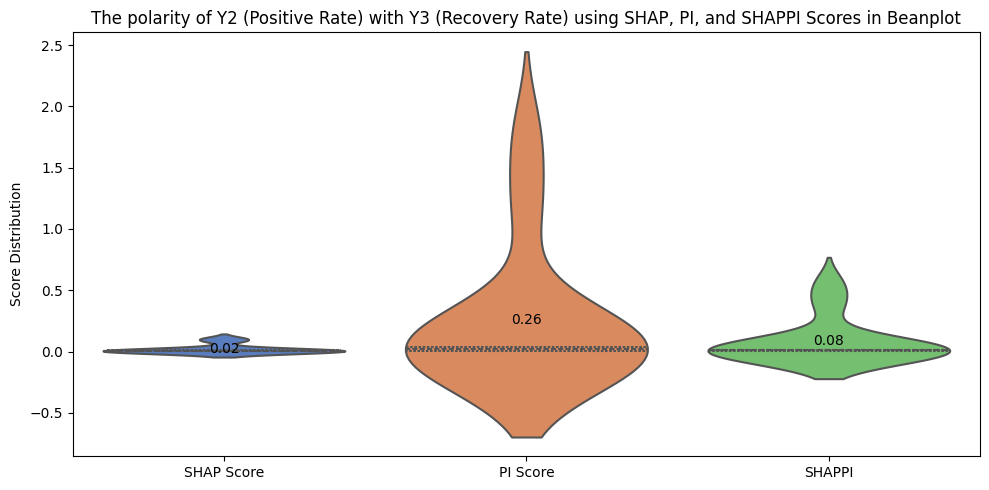

In [ ]:
plot_shap_pi_shappi_with_beanplot(pol_anal_Y2_Y4, "The polarity of Y2 (Positive Rate) with Y3 (Recovery Rate) using SHAP, PI, and SHAPPI Scores in Beanplot")

In [ ]:
print("Analysis SHAP Y2 Polarity with Y5:")
pol_anal_Y2_Y5, perm_imp_Y2_Y5 = analysis_SHAP(shap_values_Y2, X_features_name, pol_Y5, regrY2, X_Y2, Y2)

Analysis SHAP Y2 Polarity with Y5:
---------------------------------------------------------------
Mean =  [4.9485948e-02 3.1799066e-04 4.8669115e-01 2.5604038e-02 6.9400139e-02
 2.5373284e-02 4.6517517e-02 3.2975927e-02 5.0224638e-01 2.1775883e-02
 3.8155671e-05 0.0000000e+00]
Condition =  [array([False,  True, False,  True, False,  True, False, False,  True,
       False, False,  True])]
--------------------------------------------------------------- 



In [ ]:
print("Analysis SHAPPI Y2 Polarity with Y5:")
shappi_Y2_Y5 = analysis_SHAPPI(pol_anal_Y2_Y5, perm_imp_Y2_Y5)
shappi_Y2_Y5

Analysis SHAPPI Y2 Polarity with Y5:
---------------------------------------------------------------


Feature  Polarity      PI Error    SHAPPI
2   number_vaccinations  Positive  8.664513e-02  0.548451
8         inflation_yoy  Positive  5.674266e-02  0.379085
0                   BOR  Positive  4.615036e-03  0.016724
6      transit_stations  Positive  5.711109e-03  0.016428
7           residential  Positive  2.352375e-03  0.014906
4      grocery_pharmacy  Positive  3.415858e-03  0.012988
5                 parks  Positive  1.402657e-03  0.007399
3     retail_recreation  Positive  8.627769e-04  0.005389
9               BI_rate  Positive  1.093945e-03  0.005093
1     medical_personnel  Positive  1.094488e-06  0.000033
10               bansos  Positive  5.697426e-07  0.000004
11         minimum_wage  Positive  0.000000e+00  0.000000

In [ ]:
pol_anal_Y2_Y5

Feature  SHAP Average  SHAP Score  Polarity  PI Score  \
0                   BOR     -0.007029    0.009853  Positive  0.041292   
1     medical_personnel      0.000184    0.000063  Positive  0.000005   
2   number_vaccinations     -0.142672    0.096903  Positive  1.749961   
3     retail_recreation      0.000251    0.005098  Positive  0.009940   
4      grocery_pharmacy     -0.009044    0.013818  Positive  0.021275   
5                 parks      0.005602    0.005052  Positive  0.017056   
6      transit_stations     -0.005807    0.009262  Positive  0.041288   
7           residential     -0.006291    0.006566  Positive  0.040679   
8         inflation_yoy      0.180791    0.100000  Positive  1.151773   
9               BI_rate     -0.000044    0.004336  Positive  0.010238   
10               bansos     -0.000034    0.000008  Positive  0.000002   
11         minimum_wage      0.000000    0.000000  Positive  0.000000   

        PI Error    SHAPPI  
0   4.615036e-03  0.016724  
1   1.094488e-06  0.000033  
2   8.664513e-02  0.548451  
3   8.627769e-04  0.005389  
4   3.415858e-03  0.012988  
5   1.402657e-03  0.007399  
6   5.711109e-03  0.016428  
7   2.352375e-03  0.014906  
8   5.674266e-02  0.379085  
9   1.093945e-03  0.005093  
10  5.697426e-07  0.000004  
11  0.000000e+00  0.000000

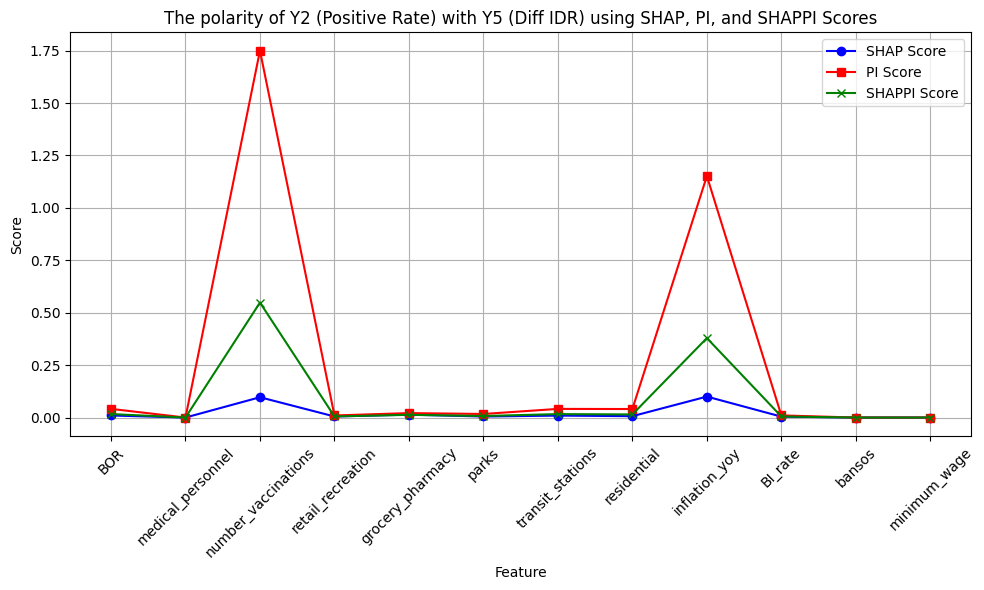

In [ ]:
plot_shap_pi_shappi(pol_anal_Y2_Y5, "The polarity of Y2 (Positive Rate) with Y5 (Diff IDR) using SHAP, PI, and SHAPPI Scores")

<ipython-input-23-c9a0d6b6b287>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])


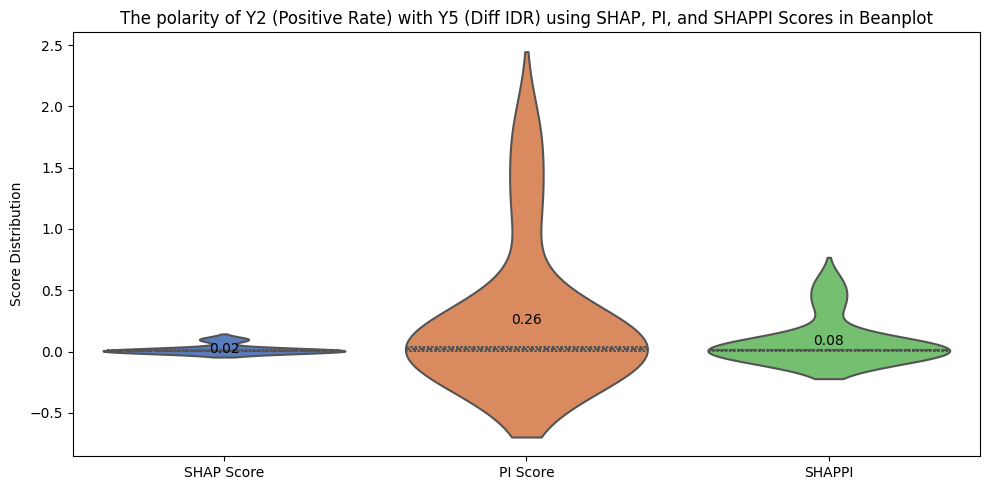

In [ ]:
plot_shap_pi_shappi_with_beanplot(pol_anal_Y2_Y5, "The polarity of Y2 (Positive Rate) with Y5 (Diff IDR) using SHAP, PI, and SHAPPI Scores in Beanplot")

In [ ]:
print("Analysis SHAP Y2 Polarity with Y6:")
pol_anal_Y2_Y6, perm_imp_Y2_Y6 = analysis_SHAP(shap_values_Y2, X_features_name, pol_Y6, regrY2, X_Y2, Y2)

Analysis SHAP Y2 Polarity with Y6:
---------------------------------------------------------------
Mean =  [4.9485948e-02 3.1799066e-04 4.8669115e-01 2.5604038e-02 6.9400139e-02
 2.5373284e-02 4.6517517e-02 3.2975927e-02 5.0224638e-01 2.1775883e-02
 3.8155671e-05 0.0000000e+00]
Condition =  [array([False,  True, False,  True, False,  True, False, False,  True,
       False, False,  True])]
--------------------------------------------------------------- 



In [ ]:
print("Analysis SHAPPI Y2 Polarity with Y6:")
shappi_Y2_Y6 = analysis_SHAPPI(pol_anal_Y2_Y6, perm_imp_Y2_Y6)
shappi_Y2_Y6

Analysis SHAPPI Y2 Polarity with Y6:
---------------------------------------------------------------


Feature  Polarity      PI Error    SHAPPI
2   number_vaccinations  Positive  8.664513e-02  0.548451
8         inflation_yoy  Positive  5.674266e-02  0.379085
0                   BOR  Positive  4.615036e-03  0.016724
6      transit_stations  Positive  5.711109e-03  0.016428
7           residential  Positive  2.352375e-03  0.014906
4      grocery_pharmacy  Positive  3.415858e-03  0.012988
5                 parks  Positive  1.402657e-03  0.007399
3     retail_recreation  Positive  8.627769e-04  0.005389
9               BI_rate  Positive  1.093945e-03  0.005093
1     medical_personnel  Positive  1.094488e-06  0.000033
10               bansos  Positive  5.697426e-07  0.000004
11         minimum_wage  Positive  0.000000e+00  0.000000

In [ ]:
pol_anal_Y2_Y6

Feature  SHAP Average  SHAP Score  Polarity  PI Score  \
0                   BOR     -0.007029    0.009853  Positive  0.041292   
1     medical_personnel      0.000184    0.000063  Positive  0.000005   
2   number_vaccinations     -0.142672    0.096903  Positive  1.749961   
3     retail_recreation      0.000251    0.005098  Positive  0.009940   
4      grocery_pharmacy     -0.009044    0.013818  Positive  0.021275   
5                 parks      0.005602    0.005052  Positive  0.017056   
6      transit_stations     -0.005807    0.009262  Positive  0.041288   
7           residential     -0.006291    0.006566  Positive  0.040679   
8         inflation_yoy      0.180791    0.100000  Positive  1.151773   
9               BI_rate     -0.000044    0.004336  Positive  0.010238   
10               bansos     -0.000034    0.000008  Positive  0.000002   
11         minimum_wage      0.000000    0.000000  Positive  0.000000   

        PI Error    SHAPPI  
0   4.615036e-03  0.016724  
1   1.094488e-06  0.000033  
2   8.664513e-02  0.548451  
3   8.627769e-04  0.005389  
4   3.415858e-03  0.012988  
5   1.402657e-03  0.007399  
6   5.711109e-03  0.016428  
7   2.352375e-03  0.014906  
8   5.674266e-02  0.379085  
9   1.093945e-03  0.005093  
10  5.697426e-07  0.000004  
11  0.000000e+00  0.000000

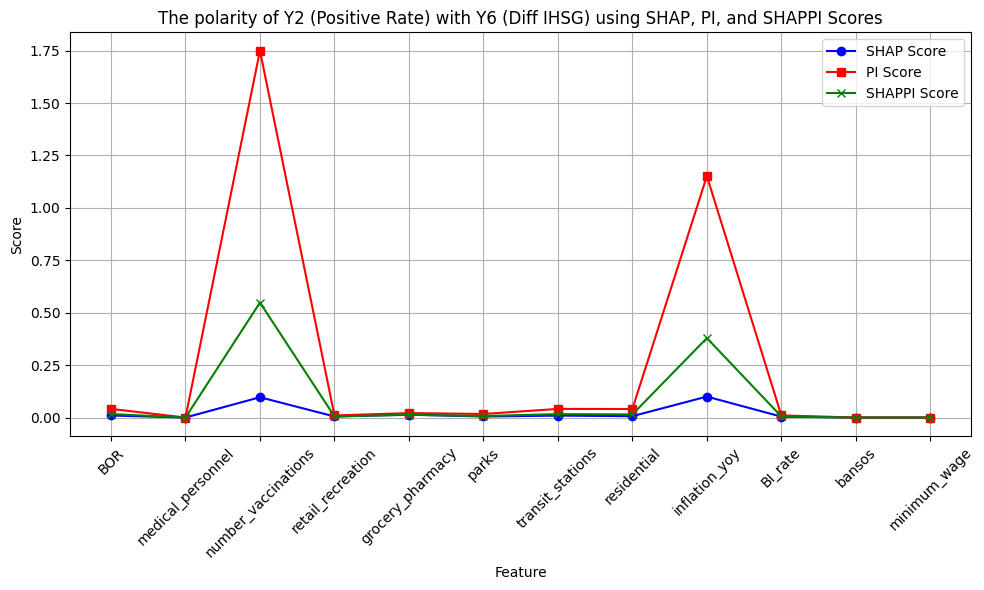

In [ ]:
plot_shap_pi_shappi(pol_anal_Y2_Y6, "The polarity of Y2 (Positive Rate) with Y6 (Diff IHSG) using SHAP, PI, and SHAPPI Scores")

<ipython-input-23-c9a0d6b6b287>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])


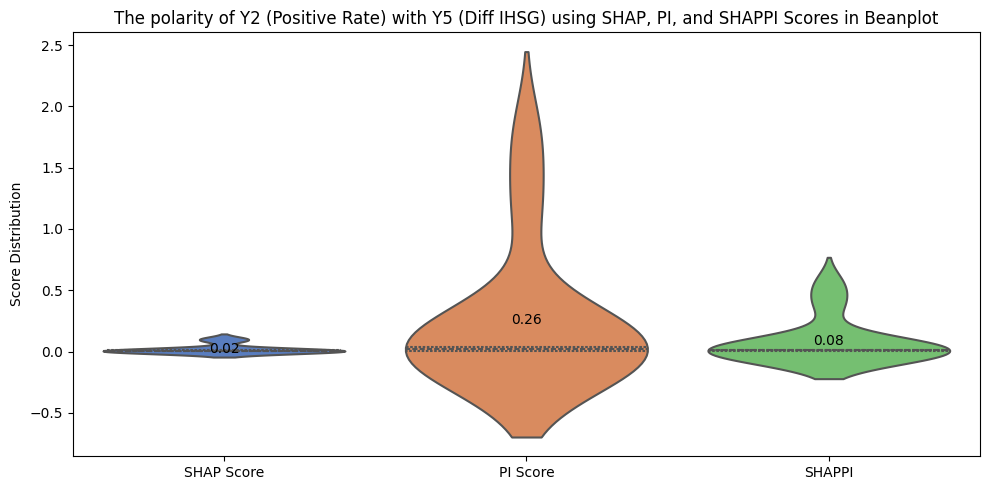

In [ ]:
plot_shap_pi_shappi_with_beanplot(pol_anal_Y2_Y6, "The polarity of Y2 (Positive Rate) with Y5 (Diff IHSG) using SHAP, PI, and SHAPPI Scores in Beanplot")

In [ ]:
print("Analysis SHAP Y3 Polarity with Y1:")
pol_anal_Y3_Y1, perm_imp_Y3_Y1 = analysis_SHAP(shap_values_Y3, X_features_name, pol_Y1, regrY3, X_Y3, Y3)

Analysis SHAP Y3 Polarity with Y1:
---------------------------------------------------------------
Mean =  [7.4160680e-02 4.7582289e-05 8.8334119e-01 8.4658796e-03 1.8597161e-03
 3.1092123e-03 3.1732041e-03 1.0362838e-03 7.2641946e-02 2.7013481e-02
 0.0000000e+00 0.0000000e+00]
Condition =  [array([ True, False, False, False, False,  True,  True, False,  True,
        True,  True,  True])]
--------------------------------------------------------------- 



In [ ]:
print("Analysis SHAPPI Y3 Polarity with Y1:")
shappi_Y3_Y1 = analysis_SHAPPI(pol_anal_Y3_Y1, perm_imp_Y3_Y1)
shappi_Y3_Y1

Analysis SHAPPI Y3 Polarity with Y1:
---------------------------------------------------------------


Feature  Polarity      PI Error    SHAPPI
2   number_vaccinations  Positive  6.156646e-02  0.550000
8         inflation_yoy  Positive  1.023702e-03  0.010401
0                   BOR  Positive  6.781678e-04  0.008219
9               BI_rate  Positive  1.769550e-04  0.002699
3     retail_recreation  Positive  2.419537e-04  0.001009
5                 parks  Positive  1.178649e-05  0.000247
6      transit_stations  Positive  1.360273e-05  0.000225
4      grocery_pharmacy  Positive  9.184425e-06  0.000135
7           residential  Positive  5.190862e-06  0.000072
1     medical_personnel  Positive  9.845689e-08  0.000003
10               bansos  Positive  0.000000e+00  0.000000
11         minimum_wage  Positive  0.000000e+00  0.000000

In [ ]:
pol_anal_Y3_Y1

Feature  SHAP Average  SHAP Score  Polarity      PI Score  \
0                   BOR      0.025338    0.008395  Positive  1.408665e-02   
1     medical_personnel     -0.000039    0.000005  Positive  2.262291e-07   
2   number_vaccinations     -0.012394    0.100000  Positive  1.751420e+00   
3     retail_recreation     -0.001765    0.000958  Positive  1.857290e-03   
4      grocery_pharmacy     -0.000142    0.000211  Positive  1.053411e-04   
5                 parks      0.000247    0.000352  Positive  2.492974e-04   
6      transit_stations      0.000539    0.000359  Positive  1.587317e-04   
7           residential     -0.000118    0.000117  Positive  4.576244e-05   
8         inflation_yoy      0.000233    0.008224  Positive  2.203082e-02   
9               BI_rate      0.008856    0.003058  Positive  4.099887e-03   
10               bansos      0.000000    0.000000  Positive  0.000000e+00   
11         minimum_wage      0.000000    0.000000  Positive  0.000000e+00   

        PI Error    SHAPPI  
0   6.781678e-04  0.008219  
1   9.845689e-08  0.000003  
2   6.156646e-02  0.550000  
3   2.419537e-04  0.001009  
4   9.184425e-06  0.000135  
5   1.178649e-05  0.000247  
6   1.360273e-05  0.000225  
7   5.190862e-06  0.000072  
8   1.023702e-03  0.010401  
9   1.769550e-04  0.002699  
10  0.000000e+00  0.000000  
11  0.000000e+00  0.000000

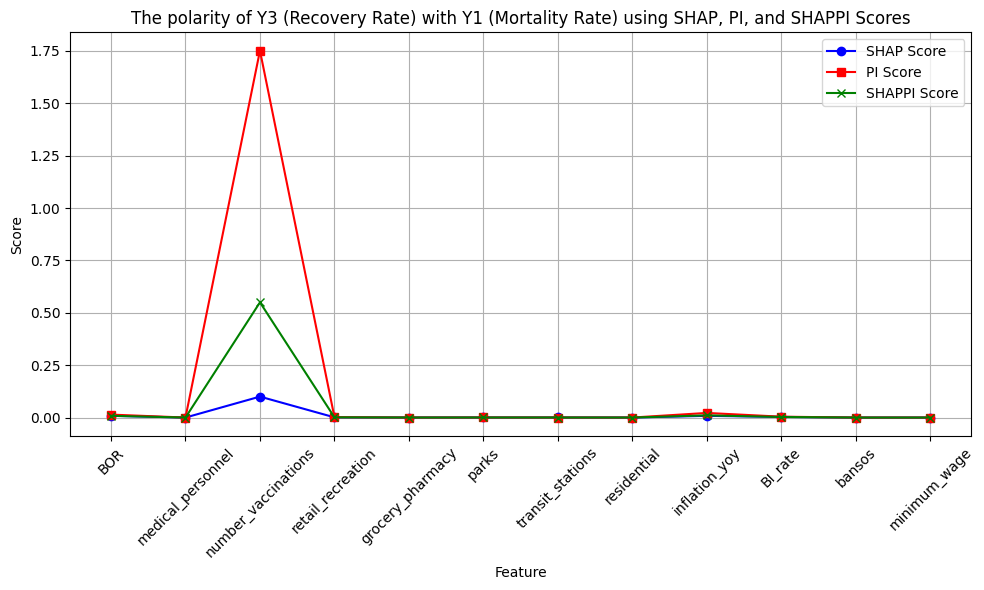

In [ ]:
plot_shap_pi_shappi(pol_anal_Y3_Y1, "The polarity of Y3 (Recovery Rate) with Y1 (Mortality Rate) using SHAP, PI, and SHAPPI Scores")

<ipython-input-23-c9a0d6b6b287>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])


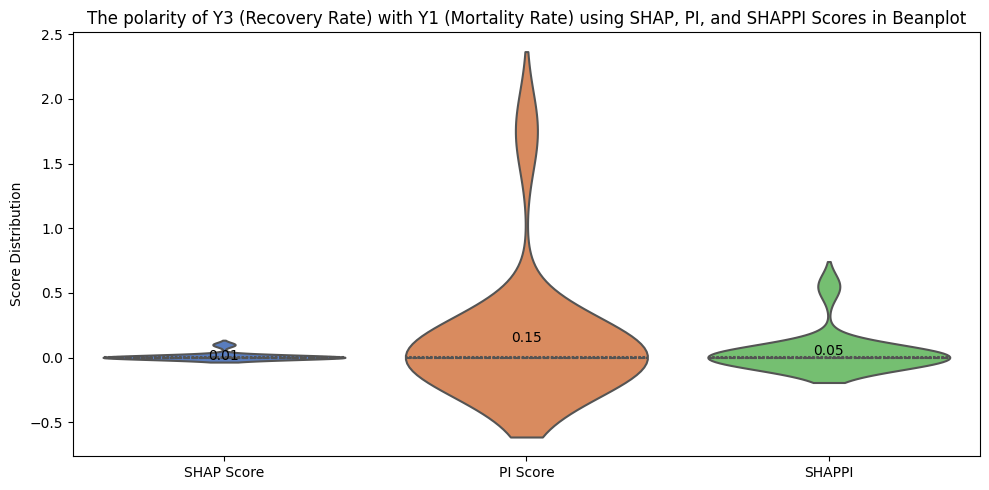

In [ ]:
plot_shap_pi_shappi_with_beanplot(pol_anal_Y3_Y1, "The polarity of Y3 (Recovery Rate) with Y1 (Mortality Rate) using SHAP, PI, and SHAPPI Scores in Beanplot")

In [ ]:
print("Analysis SHAP Y3 Polarity with Y2:")
pol_anal_Y3_Y2, perm_imp_Y3_Y2 = analysis_SHAP(shap_values_Y3, X_features_name, pol_Y2, regrY3, X_Y3, Y3)

Analysis SHAP Y3 Polarity with Y2:
---------------------------------------------------------------
Mean =  [7.4160680e-02 4.7582289e-05 8.8334119e-01 8.4658796e-03 1.8597161e-03
 3.1092123e-03 3.1732041e-03 1.0362838e-03 7.2641946e-02 2.7013481e-02
 0.0000000e+00 0.0000000e+00]
Condition =  [array([ True, False, False, False, False,  True,  True, False,  True,
        True,  True,  True])]
--------------------------------------------------------------- 



In [ ]:
print("Analysis SHAPPI Y3 Polarity with Y2:")
shappi_Y3_Y2 = analysis_SHAPPI(pol_anal_Y3_Y2, perm_imp_Y3_Y2)
shappi_Y3_Y2

Analysis SHAPPI Y3 Polarity with Y2:
---------------------------------------------------------------


Feature  Polarity      PI Error    SHAPPI
2   number_vaccinations  Positive  6.156646e-02  0.550000
8         inflation_yoy  Positive  1.023702e-03  0.010401
0                   BOR  Positive  6.781678e-04  0.008219
9               BI_rate  Positive  1.769550e-04  0.002699
3     retail_recreation  Positive  2.419537e-04  0.001009
5                 parks  Positive  1.178649e-05  0.000247
6      transit_stations  Positive  1.360273e-05  0.000225
4      grocery_pharmacy  Positive  9.184425e-06  0.000135
7           residential  Positive  5.190862e-06  0.000072
1     medical_personnel  Positive  9.845689e-08  0.000003
10               bansos  Positive  0.000000e+00  0.000000
11         minimum_wage  Positive  0.000000e+00  0.000000

In [ ]:
pol_anal_Y3_Y2

Feature  SHAP Average  SHAP Score  Polarity      PI Score  \
0                   BOR      0.025338    0.008395  Positive  1.408665e-02   
1     medical_personnel     -0.000039    0.000005  Positive  2.262291e-07   
2   number_vaccinations     -0.012394    0.100000  Positive  1.751420e+00   
3     retail_recreation     -0.001765    0.000958  Positive  1.857290e-03   
4      grocery_pharmacy     -0.000142    0.000211  Positive  1.053411e-04   
5                 parks      0.000247    0.000352  Positive  2.492974e-04   
6      transit_stations      0.000539    0.000359  Positive  1.587317e-04   
7           residential     -0.000118    0.000117  Positive  4.576244e-05   
8         inflation_yoy      0.000233    0.008224  Positive  2.203082e-02   
9               BI_rate      0.008856    0.003058  Positive  4.099887e-03   
10               bansos      0.000000    0.000000  Positive  0.000000e+00   
11         minimum_wage      0.000000    0.000000  Positive  0.000000e+00   

        PI Error    SHAPPI  
0   6.781678e-04  0.008219  
1   9.845689e-08  0.000003  
2   6.156646e-02  0.550000  
3   2.419537e-04  0.001009  
4   9.184425e-06  0.000135  
5   1.178649e-05  0.000247  
6   1.360273e-05  0.000225  
7   5.190862e-06  0.000072  
8   1.023702e-03  0.010401  
9   1.769550e-04  0.002699  
10  0.000000e+00  0.000000  
11  0.000000e+00  0.000000

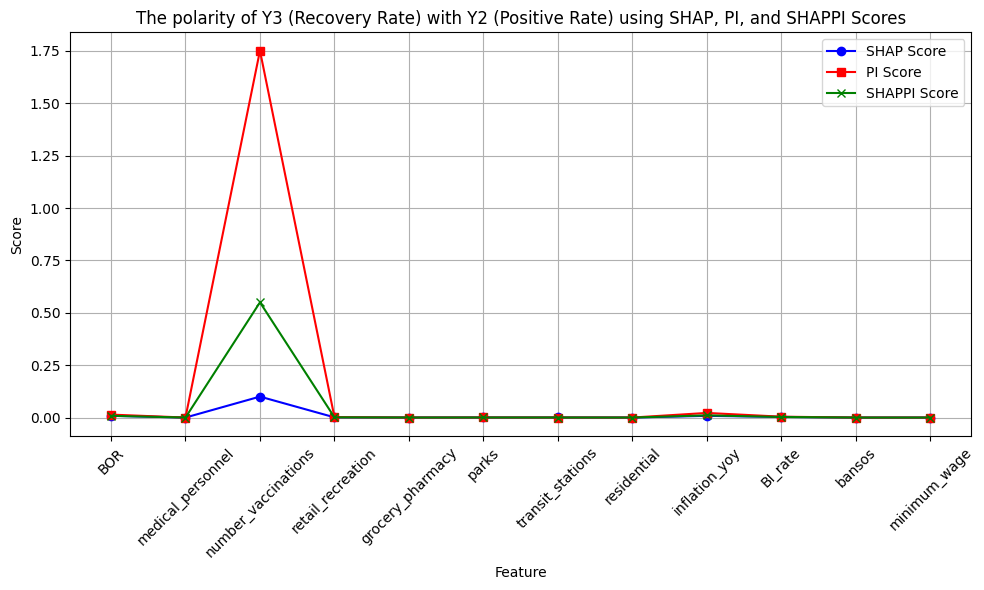

In [ ]:
plot_shap_pi_shappi(pol_anal_Y3_Y2, "The polarity of Y3 (Recovery Rate) with Y2 (Positive Rate) using SHAP, PI, and SHAPPI Scores")

<ipython-input-23-c9a0d6b6b287>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])


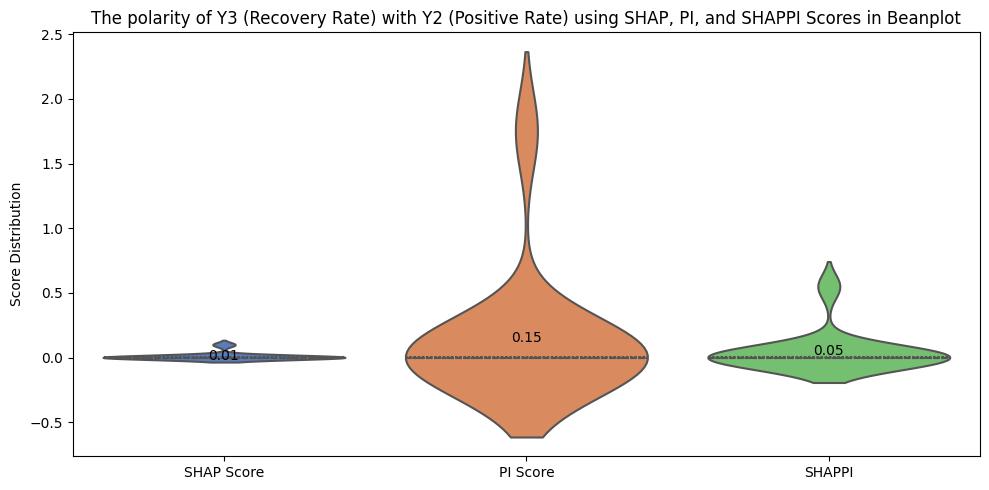

In [ ]:
plot_shap_pi_shappi_with_beanplot(pol_anal_Y3_Y2, "The polarity of Y3 (Recovery Rate) with Y2 (Positive Rate) using SHAP, PI, and SHAPPI Scores in Beanplot")

In [ ]:
print("Analysis SHAP Y3 Polarity with Y4:")
pol_anal_Y3_Y4, perm_imp_Y3_Y4 = analysis_SHAP(shap_values_Y3, X_features_name, pol_Y4, regrY3, X_Y3, Y3)

Analysis SHAP Y3 Polarity with Y4:
---------------------------------------------------------------
Mean =  [7.4160680e-02 4.7582289e-05 8.8334119e-01 8.4658796e-03 1.8597161e-03
 3.1092123e-03 3.1732041e-03 1.0362838e-03 7.2641946e-02 2.7013481e-02
 0.0000000e+00 0.0000000e+00]
Condition =  [array([ True, False, False, False, False,  True,  True, False,  True,
        True,  True,  True])]
--------------------------------------------------------------- 



In [ ]:
print("Analysis SHAPPI Y3 Polarity with Y4:")
shappi_Y3_Y4 = analysis_SHAPPI(pol_anal_Y3_Y4, perm_imp_Y3_Y4)
shappi_Y3_Y4

Analysis SHAPPI Y3 Polarity with Y4:
---------------------------------------------------------------


Feature  Polarity      PI Error    SHAPPI
2   number_vaccinations  Positive  6.156646e-02  0.550000
8         inflation_yoy  Positive  1.023702e-03  0.010401
0                   BOR  Positive  6.781678e-04  0.008219
9               BI_rate  Positive  1.769550e-04  0.002699
3     retail_recreation  Positive  2.419537e-04  0.001009
5                 parks  Positive  1.178649e-05  0.000247
6      transit_stations  Positive  1.360273e-05  0.000225
4      grocery_pharmacy  Positive  9.184425e-06  0.000135
7           residential  Positive  5.190862e-06  0.000072
1     medical_personnel  Positive  9.845689e-08  0.000003
10               bansos  Positive  0.000000e+00  0.000000
11         minimum_wage  Positive  0.000000e+00  0.000000

In [ ]:
pol_anal_Y3_Y4

Feature  SHAP Average  SHAP Score  Polarity      PI Score  \
0                   BOR      0.025338    0.008395  Positive  1.408665e-02   
1     medical_personnel     -0.000039    0.000005  Positive  2.262291e-07   
2   number_vaccinations     -0.012394    0.100000  Positive  1.751420e+00   
3     retail_recreation     -0.001765    0.000958  Positive  1.857290e-03   
4      grocery_pharmacy     -0.000142    0.000211  Positive  1.053411e-04   
5                 parks      0.000247    0.000352  Positive  2.492974e-04   
6      transit_stations      0.000539    0.000359  Positive  1.587317e-04   
7           residential     -0.000118    0.000117  Positive  4.576244e-05   
8         inflation_yoy      0.000233    0.008224  Positive  2.203082e-02   
9               BI_rate      0.008856    0.003058  Positive  4.099887e-03   
10               bansos      0.000000    0.000000  Positive  0.000000e+00   
11         minimum_wage      0.000000    0.000000  Positive  0.000000e+00   

        PI Error    SHAPPI  
0   6.781678e-04  0.008219  
1   9.845689e-08  0.000003  
2   6.156646e-02  0.550000  
3   2.419537e-04  0.001009  
4   9.184425e-06  0.000135  
5   1.178649e-05  0.000247  
6   1.360273e-05  0.000225  
7   5.190862e-06  0.000072  
8   1.023702e-03  0.010401  
9   1.769550e-04  0.002699  
10  0.000000e+00  0.000000  
11  0.000000e+00  0.000000

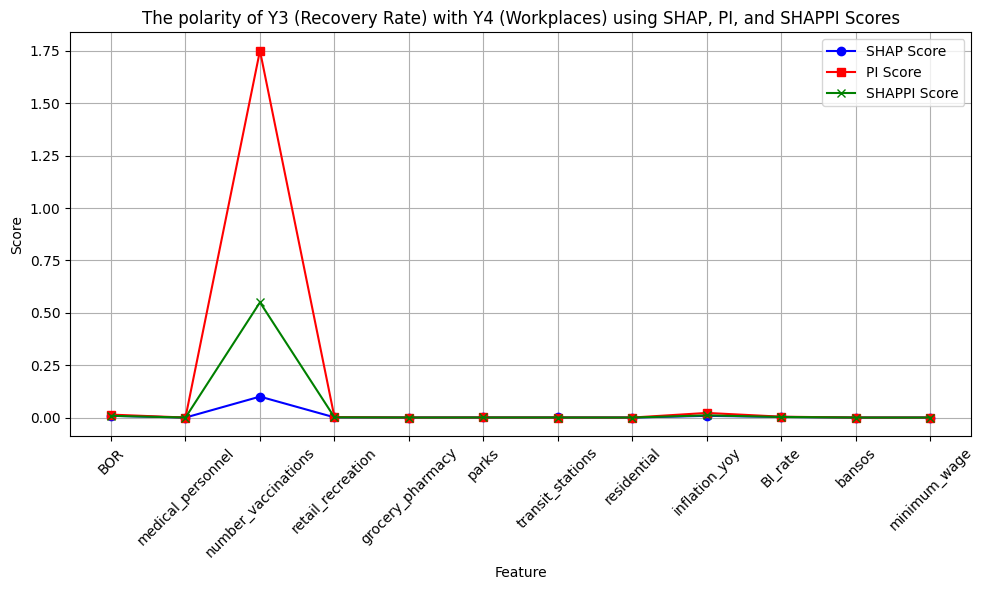

In [ ]:
plot_shap_pi_shappi(pol_anal_Y3_Y4, "The polarity of Y3 (Recovery Rate) with Y4 (Workplaces) using SHAP, PI, and SHAPPI Scores")

<ipython-input-23-c9a0d6b6b287>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])


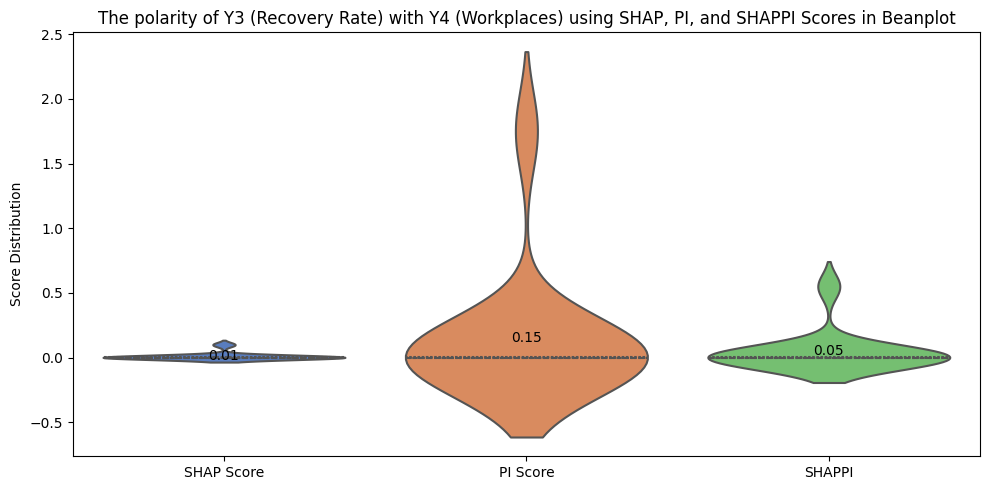

In [ ]:
plot_shap_pi_shappi_with_beanplot(pol_anal_Y3_Y4, "The polarity of Y3 (Recovery Rate) with Y4 (Workplaces) using SHAP, PI, and SHAPPI Scores in Beanplot")

In [ ]:
print("Analysis SHAP Y3 Polarity with Y5:")
pol_anal_Y3_Y5, perm_imp_Y3_Y5 = analysis_SHAP(shap_values_Y3, X_features_name, pol_Y5, regrY3, X_Y3, Y3)

Analysis SHAP Y3 Polarity with Y5:
---------------------------------------------------------------
Mean =  [7.4160680e-02 4.7582289e-05 8.8334119e-01 8.4658796e-03 1.8597161e-03
 3.1092123e-03 3.1732041e-03 1.0362838e-03 7.2641946e-02 2.7013481e-02
 0.0000000e+00 0.0000000e+00]
Condition =  [array([ True, False, False, False, False,  True,  True, False,  True,
        True,  True,  True])]
--------------------------------------------------------------- 



In [ ]:
print("Analysis SHAPPI Y3 Polarity with Y5:")
shappi_Y3_Y5 = analysis_SHAPPI(pol_anal_Y3_Y5, perm_imp_Y3_Y5)
shappi_Y3_Y5

Analysis SHAPPI Y3 Polarity with Y5:
---------------------------------------------------------------


Feature  Polarity      PI Error    SHAPPI
2   number_vaccinations  Positive  6.156646e-02  0.550000
8         inflation_yoy  Positive  1.023702e-03  0.010401
0                   BOR  Positive  6.781678e-04  0.008219
9               BI_rate  Positive  1.769550e-04  0.002699
3     retail_recreation  Positive  2.419537e-04  0.001009
5                 parks  Positive  1.178649e-05  0.000247
6      transit_stations  Positive  1.360273e-05  0.000225
4      grocery_pharmacy  Positive  9.184425e-06  0.000135
7           residential  Positive  5.190862e-06  0.000072
1     medical_personnel  Positive  9.845689e-08  0.000003
10               bansos  Positive  0.000000e+00  0.000000
11         minimum_wage  Positive  0.000000e+00  0.000000

In [ ]:
pol_anal_Y3_Y5

Feature  SHAP Average  SHAP Score  Polarity      PI Score  \
0                   BOR      0.025338    0.008395  Positive  1.408665e-02   
1     medical_personnel     -0.000039    0.000005  Positive  2.262291e-07   
2   number_vaccinations     -0.012394    0.100000  Positive  1.751420e+00   
3     retail_recreation     -0.001765    0.000958  Positive  1.857290e-03   
4      grocery_pharmacy     -0.000142    0.000211  Positive  1.053411e-04   
5                 parks      0.000247    0.000352  Positive  2.492974e-04   
6      transit_stations      0.000539    0.000359  Positive  1.587317e-04   
7           residential     -0.000118    0.000117  Positive  4.576244e-05   
8         inflation_yoy      0.000233    0.008224  Positive  2.203082e-02   
9               BI_rate      0.008856    0.003058  Positive  4.099887e-03   
10               bansos      0.000000    0.000000  Positive  0.000000e+00   
11         minimum_wage      0.000000    0.000000  Positive  0.000000e+00   

        PI Error    SHAPPI  
0   6.781678e-04  0.008219  
1   9.845689e-08  0.000003  
2   6.156646e-02  0.550000  
3   2.419537e-04  0.001009  
4   9.184425e-06  0.000135  
5   1.178649e-05  0.000247  
6   1.360273e-05  0.000225  
7   5.190862e-06  0.000072  
8   1.023702e-03  0.010401  
9   1.769550e-04  0.002699  
10  0.000000e+00  0.000000  
11  0.000000e+00  0.000000

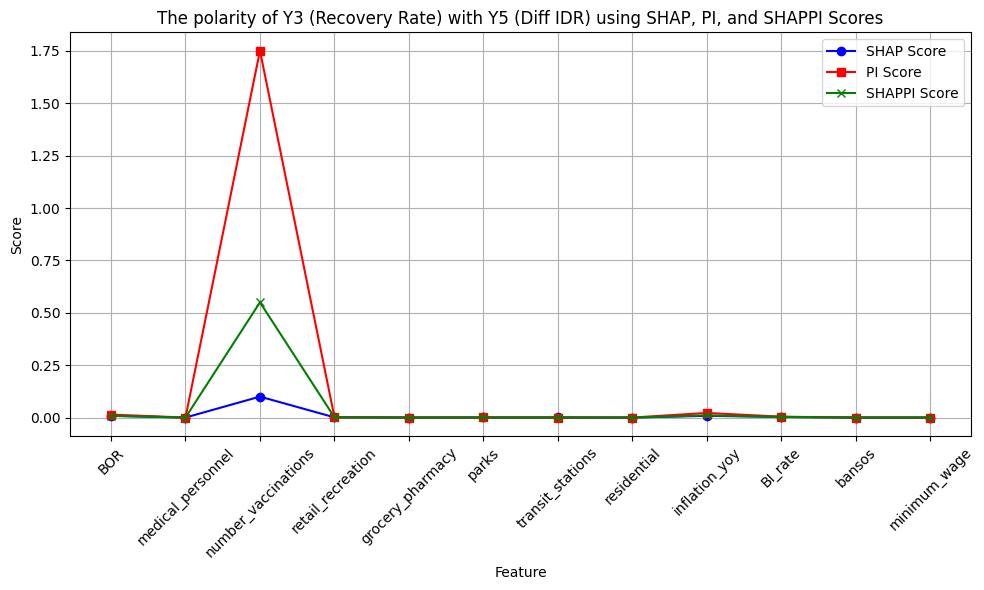

In [ ]:
plot_shap_pi_shappi(pol_anal_Y3_Y5, "The polarity of Y3 (Recovery Rate) with Y5 (Diff IDR) using SHAP, PI, and SHAPPI Scores")

<ipython-input-23-c9a0d6b6b287>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])


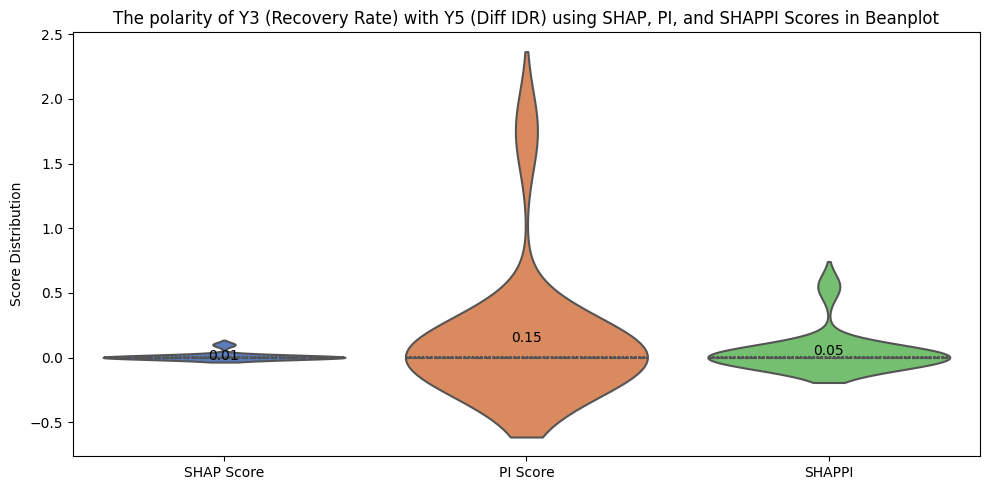

In [ ]:
plot_shap_pi_shappi_with_beanplot(pol_anal_Y3_Y5, "The polarity of Y3 (Recovery Rate) with Y5 (Diff IDR) using SHAP, PI, and SHAPPI Scores in Beanplot")

In [ ]:
print("Analysis SHAP Y3 Polarity with Y6:")
pol_anal_Y3_Y6, perm_imp_Y3_Y6 = analysis_SHAP(shap_values_Y3, X_features_name, pol_Y6, regrY3, X_Y3, Y3)

Analysis SHAP Y3 Polarity with Y6:
---------------------------------------------------------------
Mean =  [7.4160680e-02 4.7582289e-05 8.8334119e-01 8.4658796e-03 1.8597161e-03
 3.1092123e-03 3.1732041e-03 1.0362838e-03 7.2641946e-02 2.7013481e-02
 0.0000000e+00 0.0000000e+00]
Condition =  [array([ True, False, False, False, False,  True,  True, False,  True,
        True,  True,  True])]
--------------------------------------------------------------- 



In [ ]:
print("Analysis SHAPPI Y3 Polarity with Y6:")
shappi_Y3_Y6 = analysis_SHAPPI(pol_anal_Y3_Y6, perm_imp_Y3_Y6)
shappi_Y3_Y6

Analysis SHAPPI Y3 Polarity with Y6:
---------------------------------------------------------------


Feature  Polarity      PI Error    SHAPPI
2   number_vaccinations  Positive  6.156646e-02  0.550000
8         inflation_yoy  Positive  1.023702e-03  0.010401
0                   BOR  Positive  6.781678e-04  0.008219
9               BI_rate  Positive  1.769550e-04  0.002699
3     retail_recreation  Positive  2.419537e-04  0.001009
5                 parks  Positive  1.178649e-05  0.000247
6      transit_stations  Positive  1.360273e-05  0.000225
4      grocery_pharmacy  Positive  9.184425e-06  0.000135
7           residential  Positive  5.190862e-06  0.000072
1     medical_personnel  Positive  9.845689e-08  0.000003
10               bansos  Positive  0.000000e+00  0.000000
11         minimum_wage  Positive  0.000000e+00  0.000000

In [ ]:
pol_anal_Y3_Y6

Feature  SHAP Average  SHAP Score  Polarity      PI Score  \
0                   BOR      0.025338    0.008395  Positive  1.408665e-02   
1     medical_personnel     -0.000039    0.000005  Positive  2.262291e-07   
2   number_vaccinations     -0.012394    0.100000  Positive  1.751420e+00   
3     retail_recreation     -0.001765    0.000958  Positive  1.857290e-03   
4      grocery_pharmacy     -0.000142    0.000211  Positive  1.053411e-04   
5                 parks      0.000247    0.000352  Positive  2.492974e-04   
6      transit_stations      0.000539    0.000359  Positive  1.587317e-04   
7           residential     -0.000118    0.000117  Positive  4.576244e-05   
8         inflation_yoy      0.000233    0.008224  Positive  2.203082e-02   
9               BI_rate      0.008856    0.003058  Positive  4.099887e-03   
10               bansos      0.000000    0.000000  Positive  0.000000e+00   
11         minimum_wage      0.000000    0.000000  Positive  0.000000e+00   

        PI Error    SHAPPI  
0   6.781678e-04  0.008219  
1   9.845689e-08  0.000003  
2   6.156646e-02  0.550000  
3   2.419537e-04  0.001009  
4   9.184425e-06  0.000135  
5   1.178649e-05  0.000247  
6   1.360273e-05  0.000225  
7   5.190862e-06  0.000072  
8   1.023702e-03  0.010401  
9   1.769550e-04  0.002699  
10  0.000000e+00  0.000000  
11  0.000000e+00  0.000000

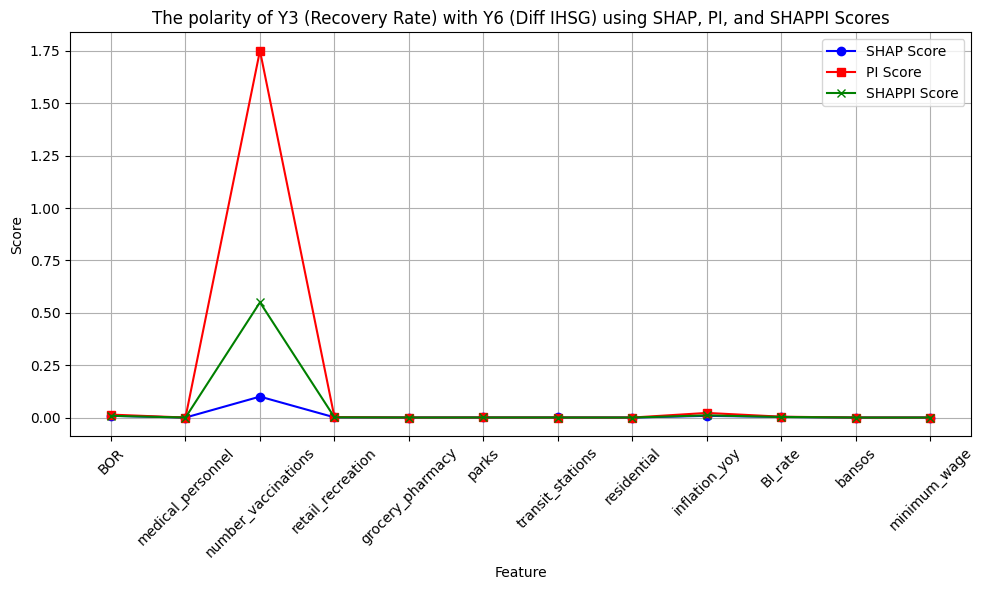

In [ ]:
plot_shap_pi_shappi(pol_anal_Y3_Y6, "The polarity of Y3 (Recovery Rate) with Y6 (Diff IHSG) using SHAP, PI, and SHAPPI Scores")

<ipython-input-23-c9a0d6b6b287>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])


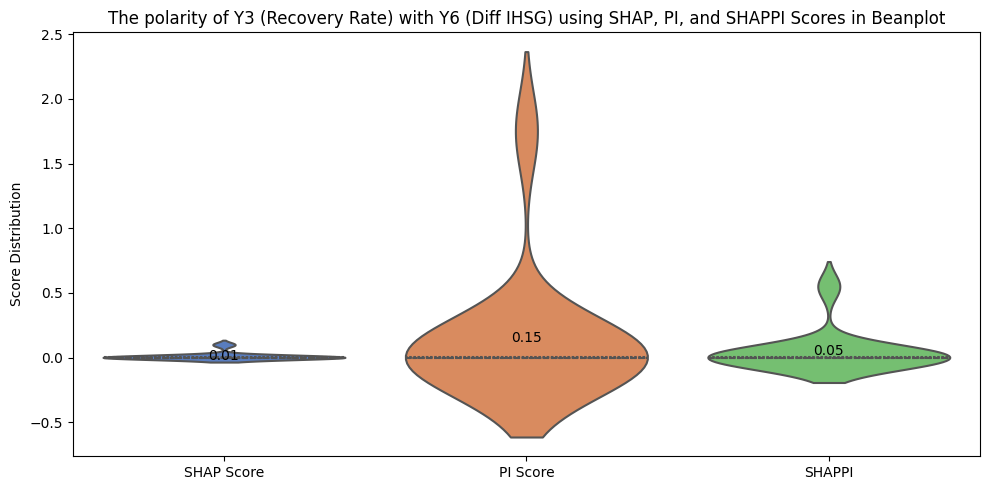

In [ ]:
plot_shap_pi_shappi_with_beanplot(pol_anal_Y3_Y6, "The polarity of Y3 (Recovery Rate) with Y6 (Diff IHSG) using SHAP, PI, and SHAPPI Scores in Beanplot")

In [ ]:
print("Analysis SHAP Y4 Polarity with Y1:")
pol_anal_Y4_Y1, perm_imp_Y4_Y1 = analysis_SHAP(shap_values_Y4, X_features_name, pol_Y1, regrY4, X_Y4, Y4)

Analysis SHAP Y4 Polarity with Y1:
---------------------------------------------------------------
Mean =  [0.0068955  0.00045943 0.0861159  0.01881132 0.07204203 0.22542131
 0.3992333  0.161998   0.20505948 0.0174467  0.         0.        ]
Condition =  [array([False,  True, False, False, False,  True,  True, False, False,
       False,  True,  True])]
--------------------------------------------------------------- 



In [ ]:
print("Analysis SHAPPI Y4 Polarity with Y1:")
shappi_Y4_Y1 = analysis_SHAPPI(pol_anal_Y4_Y1, perm_imp_Y4_Y1)
shappi_Y4_Y1

Analysis SHAPPI Y4 Polarity with Y1:
---------------------------------------------------------------


Feature  Polarity  PI Error    SHAPPI
6      transit_stations  Positive  0.029932  0.550000
5                 parks  Positive  0.008345  0.182283
8         inflation_yoy  Positive  0.007588  0.163074
7           residential  Positive  0.010085  0.147716
4      grocery_pharmacy  Positive  0.012008  0.115858
2   number_vaccinations  Positive  0.008141  0.106788
3     retail_recreation  Positive  0.001040  0.013256
9               BI_rate  Positive  0.000767  0.007562
0                   BOR  Positive  0.000736  0.002167
1     medical_personnel  Positive  0.000011  0.000095
10               bansos  Positive  0.000000  0.000000
11         minimum_wage  Positive  0.000000  0.000000

In [ ]:
pol_anal_Y4_Y1

Feature  SHAP Average  SHAP Score  Polarity  PI Score  \
0                   BOR     -0.002099    0.001727  Positive  0.001858   
1     medical_personnel      0.000296    0.000115  Positive  0.000053   
2   number_vaccinations     -0.033406    0.021570  Positive  0.136830   
3     retail_recreation     -0.004080    0.004712  Positive  0.015536   
4      grocery_pharmacy     -0.058586    0.018045  Positive  0.152270   
5                 parks      0.080237    0.056464  Positive  0.219565   
6      transit_stations      0.099421    0.100000  Positive  0.712636   
7           residential     -0.005888    0.040577  Positive  0.181619   
8         inflation_yoy     -0.043187    0.051363  Positive  0.195822   
9               BI_rate     -0.000054    0.004370  Positive  0.007664   
10               bansos      0.000000    0.000000  Positive  0.000000   
11         minimum_wage      0.000000    0.000000  Positive  0.000000   

    PI Error    SHAPPI  
0   0.000736  0.002167  
1   0.000011  0.000095  
2   0.008141  0.106788  
3   0.001040  0.013256  
4   0.012008  0.115858  
5   0.008345  0.182283  
6   0.029932  0.550000  
7   0.010085  0.147716  
8   0.007588  0.163074  
9   0.000767  0.007562  
10  0.000000  0.000000  
11  0.000000  0.000000

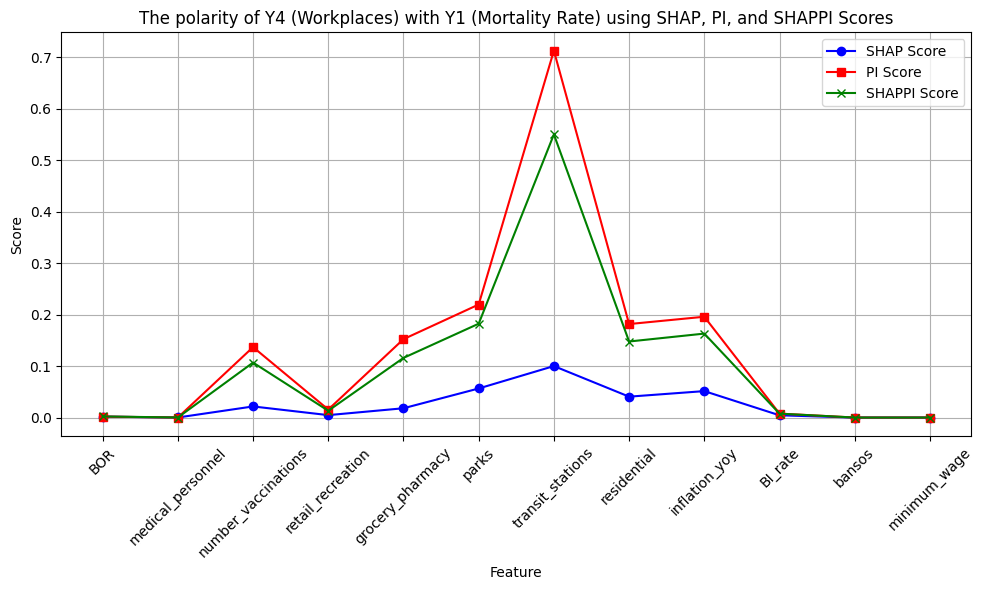

In [ ]:
plot_shap_pi_shappi(pol_anal_Y4_Y1, "The polarity of Y4 (Workplaces) with Y1 (Mortality Rate) using SHAP, PI, and SHAPPI Scores")

<ipython-input-23-c9a0d6b6b287>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])


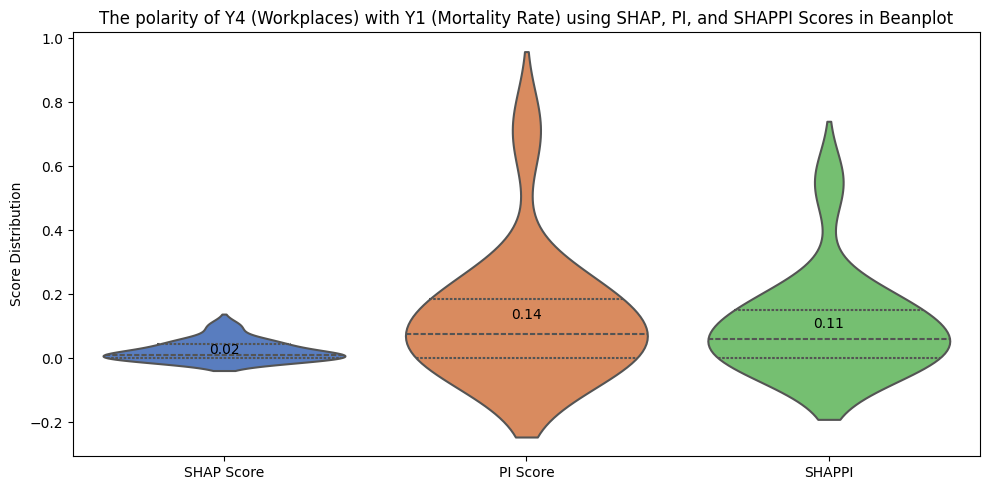

In [ ]:
plot_shap_pi_shappi_with_beanplot(pol_anal_Y4_Y1, "The polarity of Y4 (Workplaces) with Y1 (Mortality Rate) using SHAP, PI, and SHAPPI Scores in Beanplot")

In [ ]:
print("Analysis SHAP Y4 Polarity with Y2:")
pol_anal_Y4_Y2, perm_imp_Y4_Y2 = analysis_SHAP(shap_values_Y4, X_features_name, pol_Y2, regrY4, X_Y4, Y4)

Analysis SHAP Y4 Polarity with Y2:
---------------------------------------------------------------
Mean =  [0.0068955  0.00045943 0.0861159  0.01881132 0.07204203 0.22542131
 0.3992333  0.161998   0.20505948 0.0174467  0.         0.        ]
Condition =  [array([False,  True, False, False, False,  True,  True, False, False,
       False,  True,  True])]
--------------------------------------------------------------- 



In [ ]:
print("Analysis SHAPPI Y4 Polarity with Y2:")
shappi_Y4_Y2 = analysis_SHAPPI(pol_anal_Y4_Y2, perm_imp_Y4_Y2)
shappi_Y4_Y2

Analysis SHAPPI Y4 Polarity with Y2:
---------------------------------------------------------------


Feature  Polarity  PI Error    SHAPPI
6      transit_stations  Positive  0.029932  0.550000
5                 parks  Positive  0.008345  0.182283
8         inflation_yoy  Positive  0.007588  0.163074
7           residential  Positive  0.010085  0.147716
4      grocery_pharmacy  Positive  0.012008  0.115858
2   number_vaccinations  Positive  0.008141  0.106788
3     retail_recreation  Positive  0.001040  0.013256
9               BI_rate  Positive  0.000767  0.007562
0                   BOR  Positive  0.000736  0.002167
1     medical_personnel  Positive  0.000011  0.000095
10               bansos  Positive  0.000000  0.000000
11         minimum_wage  Positive  0.000000  0.000000

In [ ]:
pol_anal_Y4_Y2

Feature  SHAP Average  SHAP Score  Polarity  PI Score  \
0                   BOR     -0.002099    0.001727  Positive  0.001858   
1     medical_personnel      0.000296    0.000115  Positive  0.000053   
2   number_vaccinations     -0.033406    0.021570  Positive  0.136830   
3     retail_recreation     -0.004080    0.004712  Positive  0.015536   
4      grocery_pharmacy     -0.058586    0.018045  Positive  0.152270   
5                 parks      0.080237    0.056464  Positive  0.219565   
6      transit_stations      0.099421    0.100000  Positive  0.712636   
7           residential     -0.005888    0.040577  Positive  0.181619   
8         inflation_yoy     -0.043187    0.051363  Positive  0.195822   
9               BI_rate     -0.000054    0.004370  Positive  0.007664   
10               bansos      0.000000    0.000000  Positive  0.000000   
11         minimum_wage      0.000000    0.000000  Positive  0.000000   

    PI Error    SHAPPI  
0   0.000736  0.002167  
1   0.000011  0.000095  
2   0.008141  0.106788  
3   0.001040  0.013256  
4   0.012008  0.115858  
5   0.008345  0.182283  
6   0.029932  0.550000  
7   0.010085  0.147716  
8   0.007588  0.163074  
9   0.000767  0.007562  
10  0.000000  0.000000  
11  0.000000  0.000000

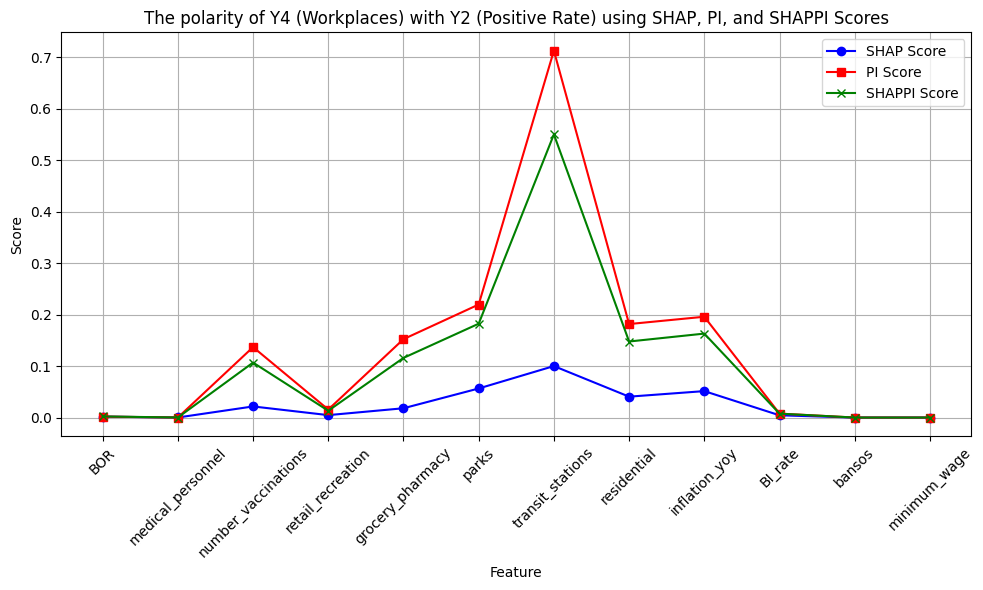

In [ ]:
plot_shap_pi_shappi(pol_anal_Y4_Y2, "The polarity of Y4 (Workplaces) with Y2 (Positive Rate) using SHAP, PI, and SHAPPI Scores")

<ipython-input-23-c9a0d6b6b287>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])


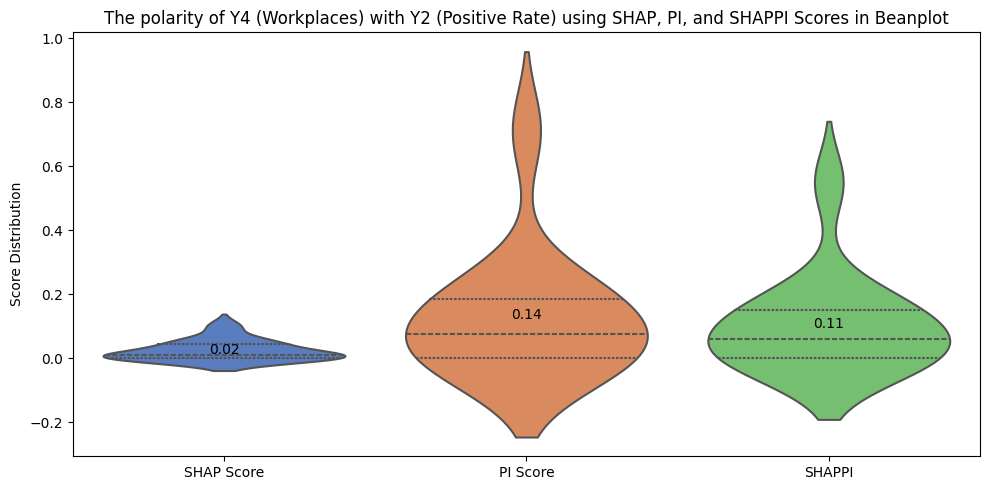

In [ ]:
plot_shap_pi_shappi_with_beanplot(pol_anal_Y4_Y2, "The polarity of Y4 (Workplaces) with Y2 (Positive Rate) using SHAP, PI, and SHAPPI Scores in Beanplot")

In [ ]:
print("Analysis SHAP Y4 Polarity with Y3:")
pol_anal_Y4_Y3, perm_imp_Y4_Y3 = analysis_SHAP(shap_values_Y4, X_features_name, pol_Y3, regrY4, X_Y4, Y4)

Analysis SHAP Y4 Polarity with Y3:
---------------------------------------------------------------
Mean =  [0.0068955  0.00045943 0.0861159  0.01881132 0.07204203 0.22542131
 0.3992333  0.161998   0.20505948 0.0174467  0.         0.        ]
Condition =  [array([False,  True, False, False, False,  True,  True, False, False,
       False,  True,  True])]
--------------------------------------------------------------- 



In [ ]:
print("Analysis SHAPPI Y4 Polarity with Y3:")
shappi_Y4_Y3 = analysis_SHAPPI(pol_anal_Y4_Y3, perm_imp_Y4_Y3)
shappi_Y4_Y3

Analysis SHAPPI Y4 Polarity with Y3:
---------------------------------------------------------------


Feature  Polarity  PI Error    SHAPPI
6      transit_stations  Positive  0.029932  0.550000
5                 parks  Positive  0.008345  0.182283
8         inflation_yoy  Positive  0.007588  0.163074
7           residential  Positive  0.010085  0.147716
4      grocery_pharmacy  Positive  0.012008  0.115858
2   number_vaccinations  Positive  0.008141  0.106788
3     retail_recreation  Positive  0.001040  0.013256
9               BI_rate  Positive  0.000767  0.007562
0                   BOR  Positive  0.000736  0.002167
1     medical_personnel  Positive  0.000011  0.000095
10               bansos  Positive  0.000000  0.000000
11         minimum_wage  Positive  0.000000  0.000000

In [ ]:
pol_anal_Y4_Y3

Feature  SHAP Average  SHAP Score  Polarity  PI Score  \
0                   BOR     -0.002099    0.001727  Positive  0.001858   
1     medical_personnel      0.000296    0.000115  Positive  0.000053   
2   number_vaccinations     -0.033406    0.021570  Positive  0.136830   
3     retail_recreation     -0.004080    0.004712  Positive  0.015536   
4      grocery_pharmacy     -0.058586    0.018045  Positive  0.152270   
5                 parks      0.080237    0.056464  Positive  0.219565   
6      transit_stations      0.099421    0.100000  Positive  0.712636   
7           residential     -0.005888    0.040577  Positive  0.181619   
8         inflation_yoy     -0.043187    0.051363  Positive  0.195822   
9               BI_rate     -0.000054    0.004370  Positive  0.007664   
10               bansos      0.000000    0.000000  Positive  0.000000   
11         minimum_wage      0.000000    0.000000  Positive  0.000000   

    PI Error    SHAPPI  
0   0.000736  0.002167  
1   0.000011  0.000095  
2   0.008141  0.106788  
3   0.001040  0.013256  
4   0.012008  0.115858  
5   0.008345  0.182283  
6   0.029932  0.550000  
7   0.010085  0.147716  
8   0.007588  0.163074  
9   0.000767  0.007562  
10  0.000000  0.000000  
11  0.000000  0.000000

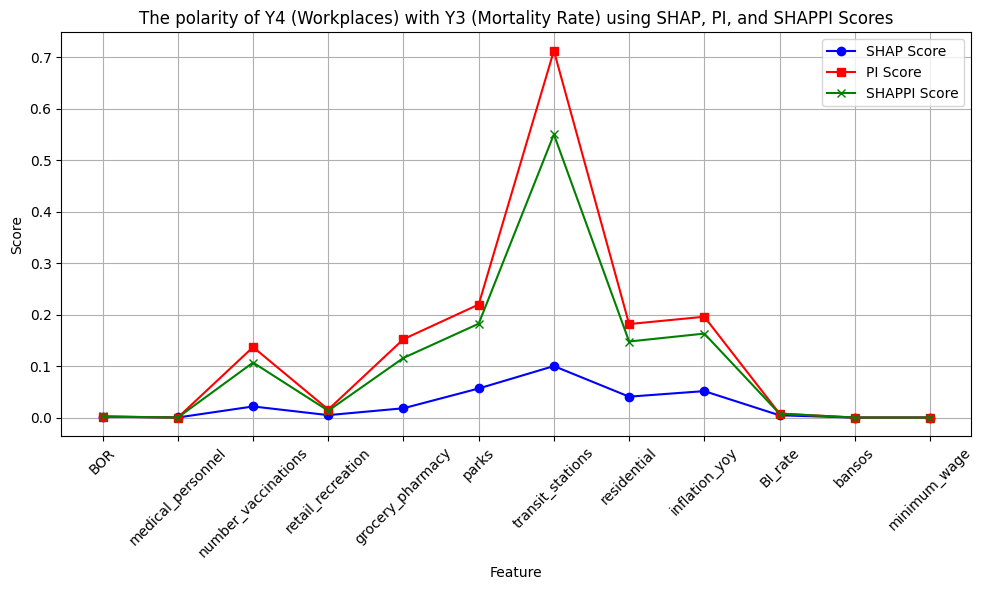

In [ ]:
plot_shap_pi_shappi(pol_anal_Y4_Y3, "The polarity of Y4 (Workplaces) with Y3 (Mortality Rate) using SHAP, PI, and SHAPPI Scores")

<ipython-input-23-c9a0d6b6b287>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])


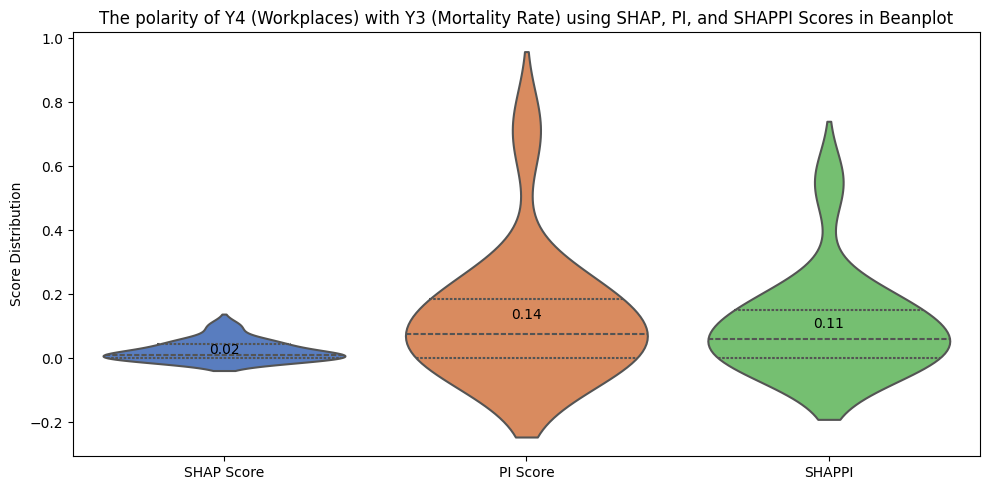

In [ ]:
plot_shap_pi_shappi_with_beanplot(pol_anal_Y4_Y3, "The polarity of Y4 (Workplaces) with Y3 (Mortality Rate) using SHAP, PI, and SHAPPI Scores in Beanplot")

In [ ]:
print("Analysis SHAP Y4 Polarity with Y5:")
pol_anal_Y4_Y5, perm_imp_Y4_Y5 = analysis_SHAP(shap_values_Y4, X_features_name, pol_Y5, regrY4, X_Y4, Y4)

Analysis SHAP Y4 Polarity with Y5:
---------------------------------------------------------------
Mean =  [0.0068955  0.00045943 0.0861159  0.01881132 0.07204203 0.22542131
 0.3992333  0.161998   0.20505948 0.0174467  0.         0.        ]
Condition =  [array([False,  True, False, False, False,  True,  True, False, False,
       False,  True,  True])]
--------------------------------------------------------------- 



In [ ]:
print("Analysis SHAPPI Y4 Polarity with Y5:")
shappi_Y4_Y5 = analysis_SHAPPI(pol_anal_Y4_Y5, perm_imp_Y4_Y5)
shappi_Y4_Y5

Analysis SHAPPI Y4 Polarity with Y5:
---------------------------------------------------------------


Feature  Polarity  PI Error    SHAPPI
6      transit_stations  Positive  0.029932  0.550000
5                 parks  Positive  0.008345  0.182283
8         inflation_yoy  Positive  0.007588  0.163074
7           residential  Positive  0.010085  0.147716
4      grocery_pharmacy  Positive  0.012008  0.115858
2   number_vaccinations  Positive  0.008141  0.106788
3     retail_recreation  Positive  0.001040  0.013256
9               BI_rate  Positive  0.000767  0.007562
0                   BOR  Positive  0.000736  0.002167
1     medical_personnel  Positive  0.000011  0.000095
10               bansos  Positive  0.000000  0.000000
11         minimum_wage  Positive  0.000000  0.000000

In [ ]:
pol_anal_Y4_Y5

Feature  SHAP Average  SHAP Score  Polarity  PI Score  \
0                   BOR     -0.002099    0.001727  Positive  0.001858   
1     medical_personnel      0.000296    0.000115  Positive  0.000053   
2   number_vaccinations     -0.033406    0.021570  Positive  0.136830   
3     retail_recreation     -0.004080    0.004712  Positive  0.015536   
4      grocery_pharmacy     -0.058586    0.018045  Positive  0.152270   
5                 parks      0.080237    0.056464  Positive  0.219565   
6      transit_stations      0.099421    0.100000  Positive  0.712636   
7           residential     -0.005888    0.040577  Positive  0.181619   
8         inflation_yoy     -0.043187    0.051363  Positive  0.195822   
9               BI_rate     -0.000054    0.004370  Positive  0.007664   
10               bansos      0.000000    0.000000  Positive  0.000000   
11         minimum_wage      0.000000    0.000000  Positive  0.000000   

    PI Error    SHAPPI  
0   0.000736  0.002167  
1   0.000011  0.000095  
2   0.008141  0.106788  
3   0.001040  0.013256  
4   0.012008  0.115858  
5   0.008345  0.182283  
6   0.029932  0.550000  
7   0.010085  0.147716  
8   0.007588  0.163074  
9   0.000767  0.007562  
10  0.000000  0.000000  
11  0.000000  0.000000

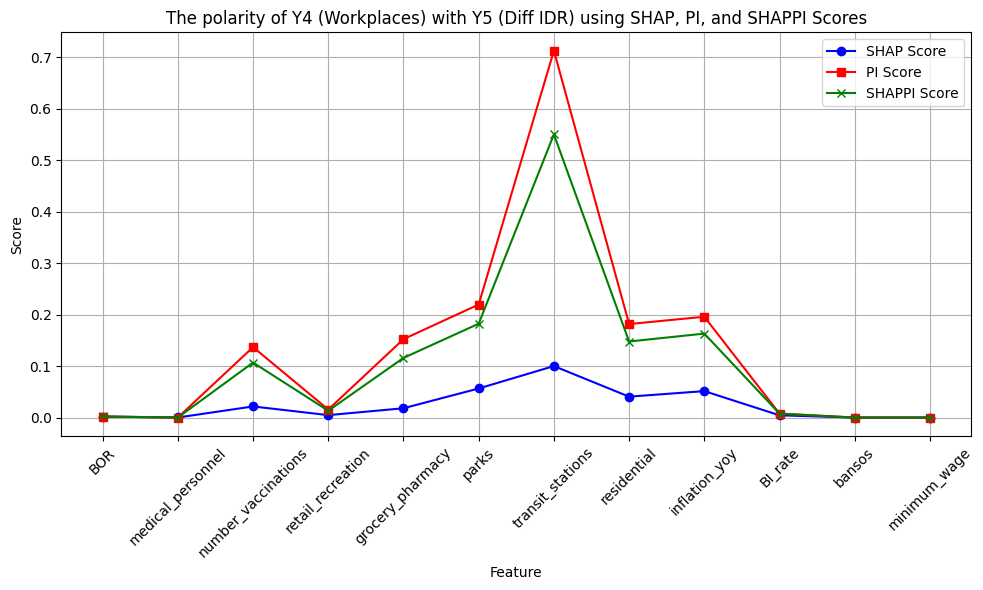

In [ ]:
plot_shap_pi_shappi(pol_anal_Y4_Y5, "The polarity of Y4 (Workplaces) with Y5 (Diff IDR) using SHAP, PI, and SHAPPI Scores")

<ipython-input-23-c9a0d6b6b287>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])


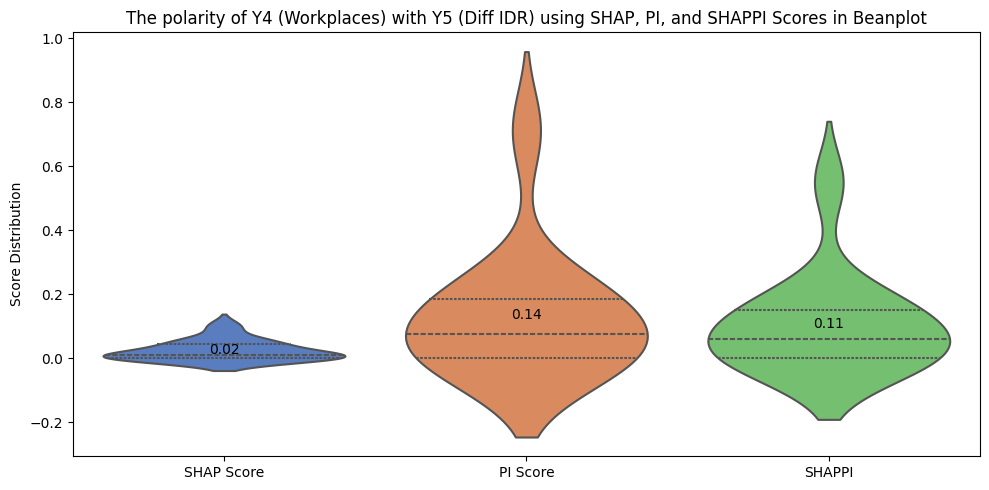

In [ ]:
plot_shap_pi_shappi_with_beanplot(pol_anal_Y4_Y5, "The polarity of Y4 (Workplaces) with Y5 (Diff IDR) using SHAP, PI, and SHAPPI Scores in Beanplot")

In [ ]:
print("Analysis SHAP Y4 Polarity with Y6:")
pol_anal_Y4_Y6, perm_imp_Y4_Y6 = analysis_SHAP(shap_values_Y4, X_features_name, pol_Y6, regrY4, X_Y4, Y4)

Analysis SHAP Y4 Polarity with Y6:
---------------------------------------------------------------
Mean =  [0.0068955  0.00045943 0.0861159  0.01881132 0.07204203 0.22542131
 0.3992333  0.161998   0.20505948 0.0174467  0.         0.        ]
Condition =  [array([False,  True, False, False, False,  True,  True, False, False,
       False,  True,  True])]
--------------------------------------------------------------- 



In [ ]:
print("Analysis SHAPPI Y4 Polarity with Y6:")
shappi_Y4_Y6 = analysis_SHAPPI(pol_anal_Y4_Y6, perm_imp_Y4_Y6)
shappi_Y4_Y6

Analysis SHAPPI Y4 Polarity with Y6:
---------------------------------------------------------------


Feature  Polarity  PI Error    SHAPPI
6      transit_stations  Positive  0.029932  0.550000
5                 parks  Positive  0.008345  0.182283
8         inflation_yoy  Positive  0.007588  0.163074
7           residential  Positive  0.010085  0.147716
4      grocery_pharmacy  Positive  0.012008  0.115858
2   number_vaccinations  Positive  0.008141  0.106788
3     retail_recreation  Positive  0.001040  0.013256
9               BI_rate  Positive  0.000767  0.007562
0                   BOR  Positive  0.000736  0.002167
1     medical_personnel  Positive  0.000011  0.000095
10               bansos  Positive  0.000000  0.000000
11         minimum_wage  Positive  0.000000  0.000000

In [ ]:
pol_anal_Y4_Y6

Feature  SHAP Average  SHAP Score  Polarity  PI Score  \
0                   BOR     -0.002099    0.001727  Positive  0.001858   
1     medical_personnel      0.000296    0.000115  Positive  0.000053   
2   number_vaccinations     -0.033406    0.021570  Positive  0.136830   
3     retail_recreation     -0.004080    0.004712  Positive  0.015536   
4      grocery_pharmacy     -0.058586    0.018045  Positive  0.152270   
5                 parks      0.080237    0.056464  Positive  0.219565   
6      transit_stations      0.099421    0.100000  Positive  0.712636   
7           residential     -0.005888    0.040577  Positive  0.181619   
8         inflation_yoy     -0.043187    0.051363  Positive  0.195822   
9               BI_rate     -0.000054    0.004370  Positive  0.007664   
10               bansos      0.000000    0.000000  Positive  0.000000   
11         minimum_wage      0.000000    0.000000  Positive  0.000000   

    PI Error    SHAPPI  
0   0.000736  0.002167  
1   0.000011  0.000095  
2   0.008141  0.106788  
3   0.001040  0.013256  
4   0.012008  0.115858  
5   0.008345  0.182283  
6   0.029932  0.550000  
7   0.010085  0.147716  
8   0.007588  0.163074  
9   0.000767  0.007562  
10  0.000000  0.000000  
11  0.000000  0.000000

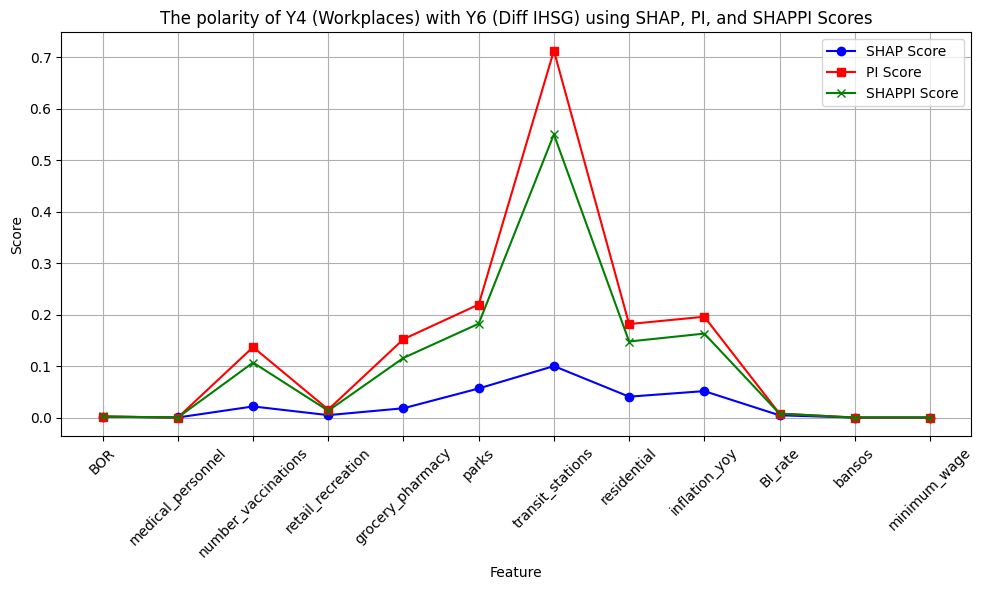

In [ ]:
plot_shap_pi_shappi(pol_anal_Y4_Y6, "The polarity of Y4 (Workplaces) with Y6 (Diff IHSG) using SHAP, PI, and SHAPPI Scores")

<ipython-input-23-c9a0d6b6b287>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])


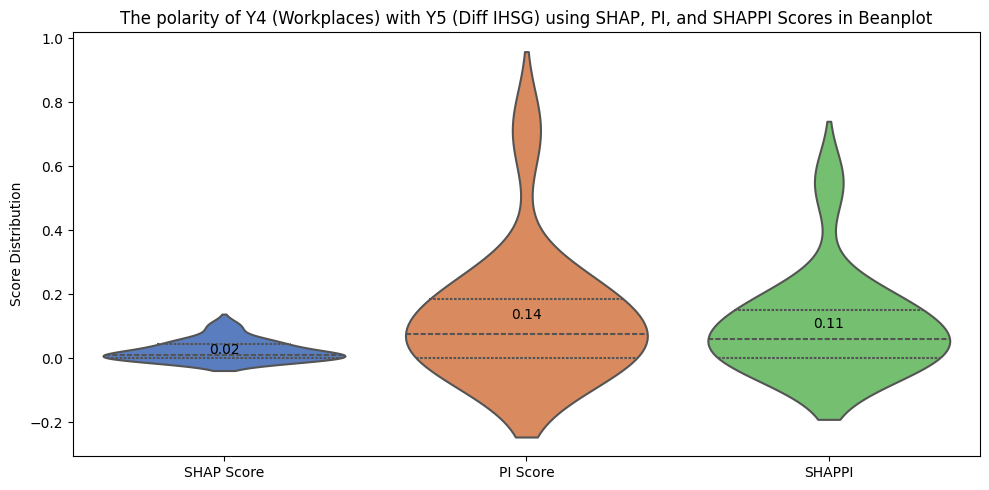

In [ ]:
plot_shap_pi_shappi_with_beanplot(pol_anal_Y4_Y6, "The polarity of Y4 (Workplaces) with Y5 (Diff IHSG) using SHAP, PI, and SHAPPI Scores in Beanplot")

In [ ]:
print("Analysis SHAP Y5 Polarity with Y1:")
pol_anal_Y5_Y1, perm_imp_Y5_Y1 = analysis_SHAP(shap_values_Y5, X_features_name, pol_Y1, regrY5, X_Y5, Y5)

Analysis SHAP Y5 Polarity with Y1:
---------------------------------------------------------------
Mean =  [0.0068955  0.00045943 0.0861159  0.01881132 0.07204203 0.22542131
 0.3992333  0.161998   0.20505948 0.0174467  0.         0.        ]
Condition =  [array([False,  True, False, False, False,  True,  True, False, False,
       False,  True,  True])]
--------------------------------------------------------------- 



In [ ]:
print("Analysis SHAPPI Y5 Polarity with Y1:")
shappi_Y5_Y1 = analysis_SHAPPI(pol_anal_Y5_Y1, perm_imp_Y5_Y1)
shappi_Y5_Y1

Analysis SHAPPI Y5 Polarity with Y1:
---------------------------------------------------------------


Feature  Polarity  PI Error    SHAPPI
2   number_vaccinations  Positive  0.027653  0.510785
3     retail_recreation  Positive  0.032951  0.268343
5                 parks  Positive  0.023914  0.235606
8         inflation_yoy  Positive  0.030192  0.203561
4      grocery_pharmacy  Positive  0.012775  0.172994
6      transit_stations  Positive  0.013572  0.154015
7           residential  Positive  0.008432  0.113611
9               BI_rate  Positive  0.011505  0.100551
0                   BOR  Positive  0.006574  0.015741
1     medical_personnel  Positive  0.000003  0.000062
10               bansos  Positive  0.000000  0.000000
11         minimum_wage  Positive  0.000000  0.000000

In [ ]:
pol_anal_Y5_Y1

Feature  SHAP Average  SHAP Score  Polarity  PI Score  \
0                   BOR     -0.002099    0.001727  Positive  0.024329   
1     medical_personnel      0.000296    0.000115  Positive  0.000008   
2   number_vaccinations     -0.033406    0.021570  Positive  0.817669   
3     retail_recreation     -0.004080    0.004712  Positive  0.434978   
4      grocery_pharmacy     -0.058586    0.018045  Positive  0.268149   
5                 parks      0.080237    0.056464  Positive  0.339127   
6      transit_stations      0.099421    0.100000  Positive  0.170099   
7           residential     -0.005888    0.040577  Positive  0.152614   
8         inflation_yoy     -0.043187    0.051363  Positive  0.290893   
9               BI_rate     -0.000054    0.004370  Positive  0.160861   
10               bansos      0.000000    0.000000  Positive  0.000000   
11         minimum_wage      0.000000    0.000000  Positive  0.000000   

    PI Error    SHAPPI  
0   0.006574  0.015741  
1   0.000003  0.000062  
2   0.027653  0.510785  
3   0.032951  0.268343  
4   0.012775  0.172994  
5   0.023914  0.235606  
6   0.013572  0.154015  
7   0.008432  0.113611  
8   0.030192  0.203561  
9   0.011505  0.100551  
10  0.000000  0.000000  
11  0.000000  0.000000

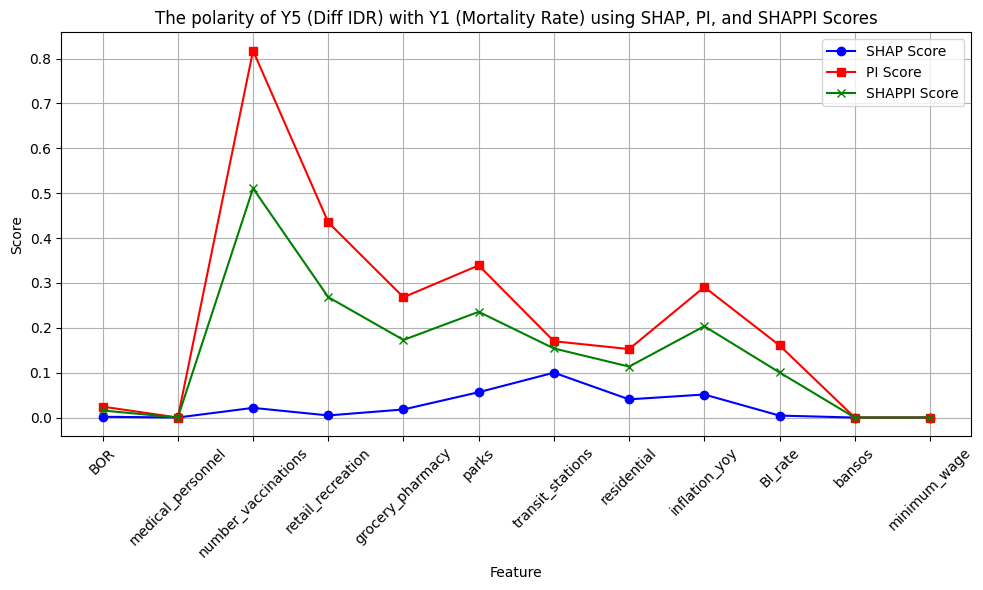

In [ ]:
plot_shap_pi_shappi(pol_anal_Y5_Y1, "The polarity of Y5 (Diff IDR) with Y1 (Mortality Rate) using SHAP, PI, and SHAPPI Scores")

<ipython-input-23-c9a0d6b6b287>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])


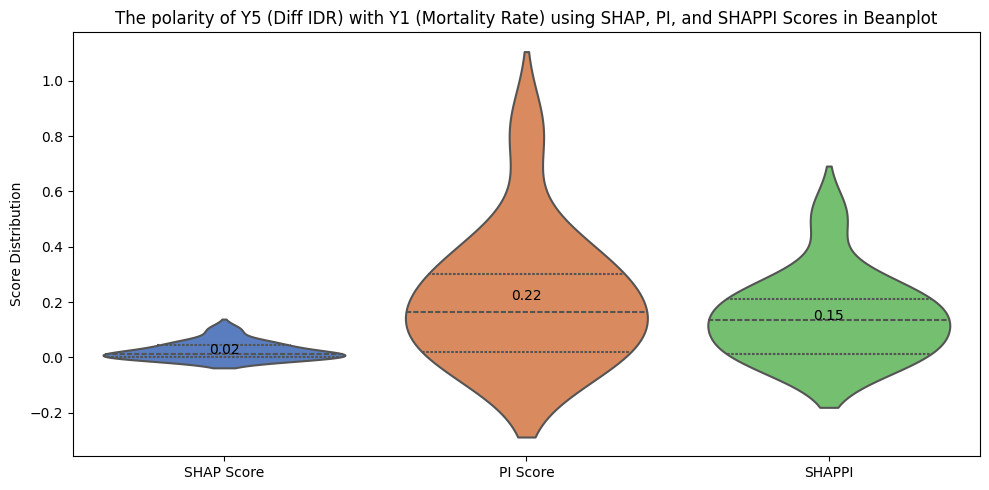

In [ ]:
plot_shap_pi_shappi_with_beanplot(pol_anal_Y5_Y1, "The polarity of Y5 (Diff IDR) with Y1 (Mortality Rate) using SHAP, PI, and SHAPPI Scores in Beanplot")

In [ ]:
print("Analysis SHAP Y5 Polarity with Y2:")
pol_anal_Y5_Y2, perm_imp_Y5_Y2 = analysis_SHAP(shap_values_Y5, X_features_name, pol_Y2, regrY5, X_Y5, Y5)

Analysis SHAP Y5 Polarity with Y2:
---------------------------------------------------------------
Mean =  [0.0068955  0.00045943 0.0861159  0.01881132 0.07204203 0.22542131
 0.3992333  0.161998   0.20505948 0.0174467  0.         0.        ]
Condition =  [array([False,  True, False, False, False,  True,  True, False, False,
       False,  True,  True])]
--------------------------------------------------------------- 



In [ ]:
print("Analysis SHAPPI Y5 Polarity with Y2:")
shappi_Y5_Y2 = analysis_SHAPPI(pol_anal_Y5_Y2, perm_imp_Y5_Y2)
shappi_Y5_Y2

Analysis SHAPPI Y5 Polarity with Y2:
---------------------------------------------------------------


Feature  Polarity  PI Error    SHAPPI
2   number_vaccinations  Positive  0.027653  0.510785
3     retail_recreation  Positive  0.032951  0.268343
5                 parks  Positive  0.023914  0.235606
8         inflation_yoy  Positive  0.030192  0.203561
4      grocery_pharmacy  Positive  0.012775  0.172994
6      transit_stations  Positive  0.013572  0.154015
7           residential  Positive  0.008432  0.113611
9               BI_rate  Positive  0.011505  0.100551
0                   BOR  Positive  0.006574  0.015741
1     medical_personnel  Positive  0.000003  0.000062
10               bansos  Positive  0.000000  0.000000
11         minimum_wage  Positive  0.000000  0.000000

In [ ]:
pol_anal_Y5_Y2

Feature  SHAP Average  SHAP Score  Polarity  PI Score  \
0                   BOR     -0.002099    0.001727  Positive  0.024329   
1     medical_personnel      0.000296    0.000115  Positive  0.000008   
2   number_vaccinations     -0.033406    0.021570  Positive  0.817669   
3     retail_recreation     -0.004080    0.004712  Positive  0.434978   
4      grocery_pharmacy     -0.058586    0.018045  Positive  0.268149   
5                 parks      0.080237    0.056464  Positive  0.339127   
6      transit_stations      0.099421    0.100000  Positive  0.170099   
7           residential     -0.005888    0.040577  Positive  0.152614   
8         inflation_yoy     -0.043187    0.051363  Positive  0.290893   
9               BI_rate     -0.000054    0.004370  Positive  0.160861   
10               bansos      0.000000    0.000000  Positive  0.000000   
11         minimum_wage      0.000000    0.000000  Positive  0.000000   

    PI Error    SHAPPI  
0   0.006574  0.015741  
1   0.000003  0.000062  
2   0.027653  0.510785  
3   0.032951  0.268343  
4   0.012775  0.172994  
5   0.023914  0.235606  
6   0.013572  0.154015  
7   0.008432  0.113611  
8   0.030192  0.203561  
9   0.011505  0.100551  
10  0.000000  0.000000  
11  0.000000  0.000000

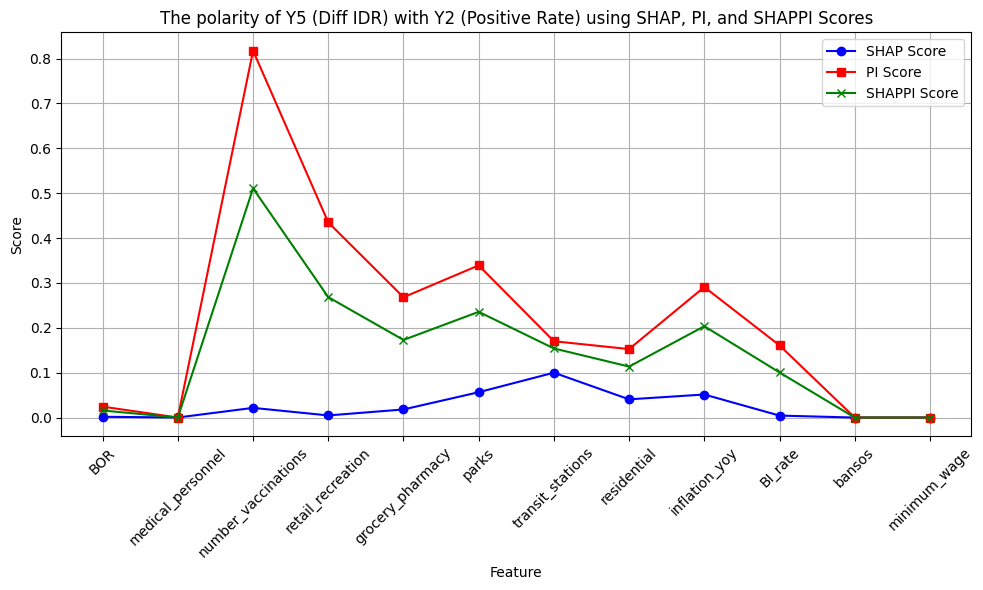

In [ ]:
plot_shap_pi_shappi(pol_anal_Y5_Y2, "The polarity of Y5 (Diff IDR) with Y2 (Positive Rate) using SHAP, PI, and SHAPPI Scores")

<ipython-input-23-c9a0d6b6b287>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])


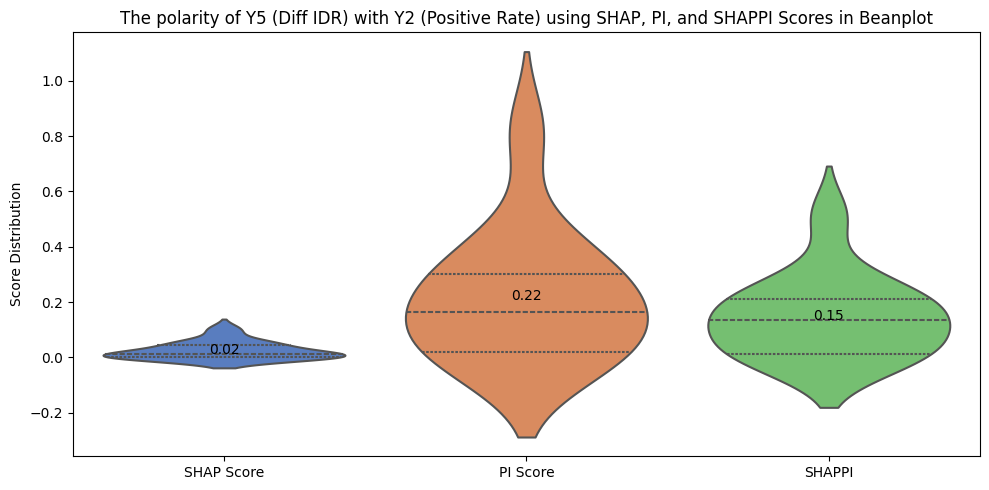

In [ ]:
plot_shap_pi_shappi_with_beanplot(pol_anal_Y5_Y2, "The polarity of Y5 (Diff IDR) with Y2 (Positive Rate) using SHAP, PI, and SHAPPI Scores in Beanplot")

In [ ]:
print("Analysis SHAP Y5 Polarity with Y3:")
pol_anal_Y5_Y3, perm_imp_Y5_Y3 = analysis_SHAP(shap_values_Y5, X_features_name, pol_Y3, regrY5, X_Y5, Y5)

Analysis SHAP Y5 Polarity with Y3:
---------------------------------------------------------------
Mean =  [0.0068955  0.00045943 0.0861159  0.01881132 0.07204203 0.22542131
 0.3992333  0.161998   0.20505948 0.0174467  0.         0.        ]
Condition =  [array([False,  True, False, False, False,  True,  True, False, False,
       False,  True,  True])]
--------------------------------------------------------------- 



In [ ]:
print("Analysis SHAPPI Y5 Polarity with Y3:")
shappi_Y5_Y3 = analysis_SHAPPI(pol_anal_Y5_Y3, perm_imp_Y5_Y3)
shappi_Y5_Y3

Analysis SHAPPI Y5 Polarity with Y3:
---------------------------------------------------------------


Feature  Polarity  PI Error    SHAPPI
2   number_vaccinations  Positive  0.027653  0.510785
3     retail_recreation  Positive  0.032951  0.268343
5                 parks  Positive  0.023914  0.235606
8         inflation_yoy  Positive  0.030192  0.203561
4      grocery_pharmacy  Positive  0.012775  0.172994
6      transit_stations  Positive  0.013572  0.154015
7           residential  Positive  0.008432  0.113611
9               BI_rate  Positive  0.011505  0.100551
0                   BOR  Positive  0.006574  0.015741
1     medical_personnel  Positive  0.000003  0.000062
10               bansos  Positive  0.000000  0.000000
11         minimum_wage  Positive  0.000000  0.000000

In [ ]:
pol_anal_Y5_Y3

Feature  SHAP Average  SHAP Score  Polarity  PI Score  \
0                   BOR     -0.002099    0.001727  Positive  0.024329   
1     medical_personnel      0.000296    0.000115  Positive  0.000008   
2   number_vaccinations     -0.033406    0.021570  Positive  0.817669   
3     retail_recreation     -0.004080    0.004712  Positive  0.434978   
4      grocery_pharmacy     -0.058586    0.018045  Positive  0.268149   
5                 parks      0.080237    0.056464  Positive  0.339127   
6      transit_stations      0.099421    0.100000  Positive  0.170099   
7           residential     -0.005888    0.040577  Positive  0.152614   
8         inflation_yoy     -0.043187    0.051363  Positive  0.290893   
9               BI_rate     -0.000054    0.004370  Positive  0.160861   
10               bansos      0.000000    0.000000  Positive  0.000000   
11         minimum_wage      0.000000    0.000000  Positive  0.000000   

    PI Error    SHAPPI  
0   0.006574  0.015741  
1   0.000003  0.000062  
2   0.027653  0.510785  
3   0.032951  0.268343  
4   0.012775  0.172994  
5   0.023914  0.235606  
6   0.013572  0.154015  
7   0.008432  0.113611  
8   0.030192  0.203561  
9   0.011505  0.100551  
10  0.000000  0.000000  
11  0.000000  0.000000

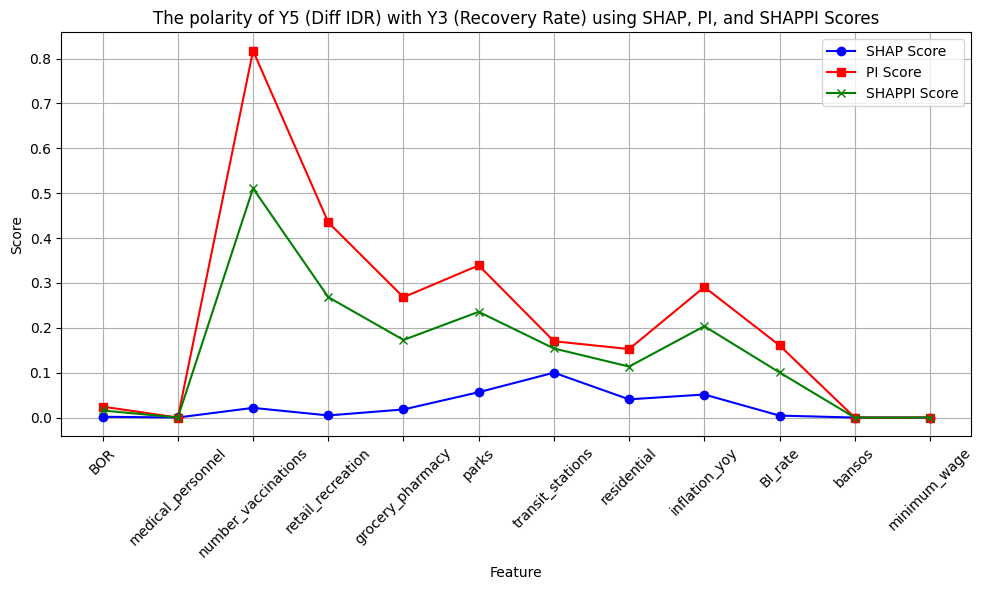

In [ ]:
plot_shap_pi_shappi(pol_anal_Y5_Y3, "The polarity of Y5 (Diff IDR) with Y3 (Recovery Rate) using SHAP, PI, and SHAPPI Scores")

<ipython-input-23-c9a0d6b6b287>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])


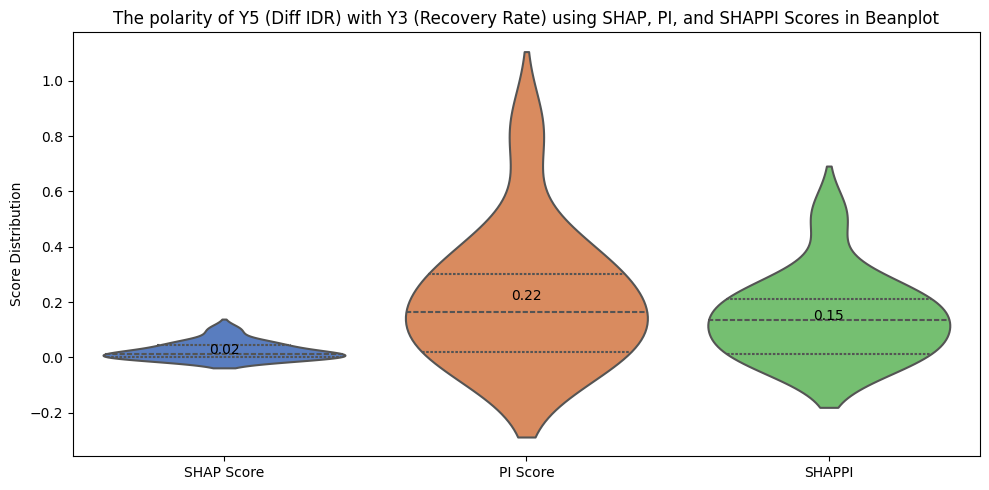

In [ ]:
plot_shap_pi_shappi_with_beanplot(pol_anal_Y5_Y3, "The polarity of Y5 (Diff IDR) with Y3 (Recovery Rate) using SHAP, PI, and SHAPPI Scores in Beanplot")

In [ ]:
print("Analysis SHAP Y5 Polarity with Y4:")
pol_anal_Y5_Y4, perm_imp_Y5_Y4 = analysis_SHAP(shap_values_Y5, X_features_name, pol_Y4, regrY5, X_Y5, Y5)

Analysis SHAP Y5 Polarity with Y4:
---------------------------------------------------------------
Mean =  [0.0068955  0.00045943 0.0861159  0.01881132 0.07204203 0.22542131
 0.3992333  0.161998   0.20505948 0.0174467  0.         0.        ]
Condition =  [array([False,  True, False, False, False,  True,  True, False, False,
       False,  True,  True])]
--------------------------------------------------------------- 



In [ ]:
print("Analysis SHAPPI Y5 Polarity with Y4:")
shappi_Y5_Y4 = analysis_SHAPPI(pol_anal_Y5_Y4, perm_imp_Y5_Y4)
shappi_Y5_Y4

Analysis SHAPPI Y5 Polarity with Y4:
---------------------------------------------------------------


Feature  Polarity  PI Error    SHAPPI
2   number_vaccinations  Positive  0.027653  0.510785
3     retail_recreation  Positive  0.032951  0.268343
5                 parks  Positive  0.023914  0.235606
8         inflation_yoy  Positive  0.030192  0.203561
4      grocery_pharmacy  Positive  0.012775  0.172994
6      transit_stations  Positive  0.013572  0.154015
7           residential  Positive  0.008432  0.113611
9               BI_rate  Positive  0.011505  0.100551
0                   BOR  Positive  0.006574  0.015741
1     medical_personnel  Positive  0.000003  0.000062
10               bansos  Positive  0.000000  0.000000
11         minimum_wage  Positive  0.000000  0.000000

In [ ]:
pol_anal_Y5_Y4

Feature  SHAP Average  SHAP Score  Polarity  PI Score  \
0                   BOR     -0.002099    0.001727  Positive  0.024329   
1     medical_personnel      0.000296    0.000115  Positive  0.000008   
2   number_vaccinations     -0.033406    0.021570  Positive  0.817669   
3     retail_recreation     -0.004080    0.004712  Positive  0.434978   
4      grocery_pharmacy     -0.058586    0.018045  Positive  0.268149   
5                 parks      0.080237    0.056464  Positive  0.339127   
6      transit_stations      0.099421    0.100000  Positive  0.170099   
7           residential     -0.005888    0.040577  Positive  0.152614   
8         inflation_yoy     -0.043187    0.051363  Positive  0.290893   
9               BI_rate     -0.000054    0.004370  Positive  0.160861   
10               bansos      0.000000    0.000000  Positive  0.000000   
11         minimum_wage      0.000000    0.000000  Positive  0.000000   

    PI Error    SHAPPI  
0   0.006574  0.015741  
1   0.000003  0.000062  
2   0.027653  0.510785  
3   0.032951  0.268343  
4   0.012775  0.172994  
5   0.023914  0.235606  
6   0.013572  0.154015  
7   0.008432  0.113611  
8   0.030192  0.203561  
9   0.011505  0.100551  
10  0.000000  0.000000  
11  0.000000  0.000000

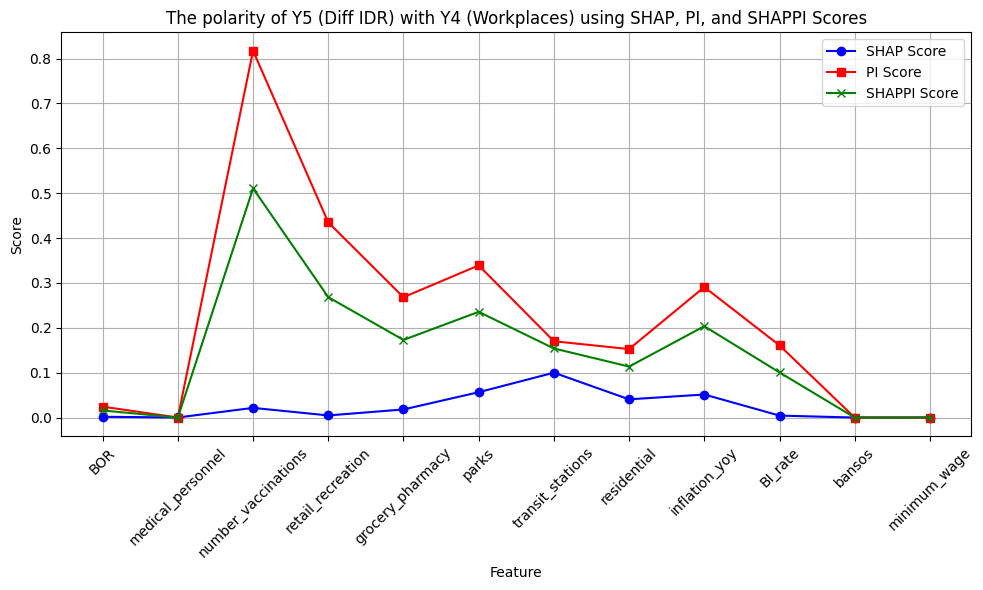

In [ ]:
plot_shap_pi_shappi(pol_anal_Y5_Y4, "The polarity of Y5 (Diff IDR) with Y4 (Workplaces) using SHAP, PI, and SHAPPI Scores")

<ipython-input-23-c9a0d6b6b287>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])


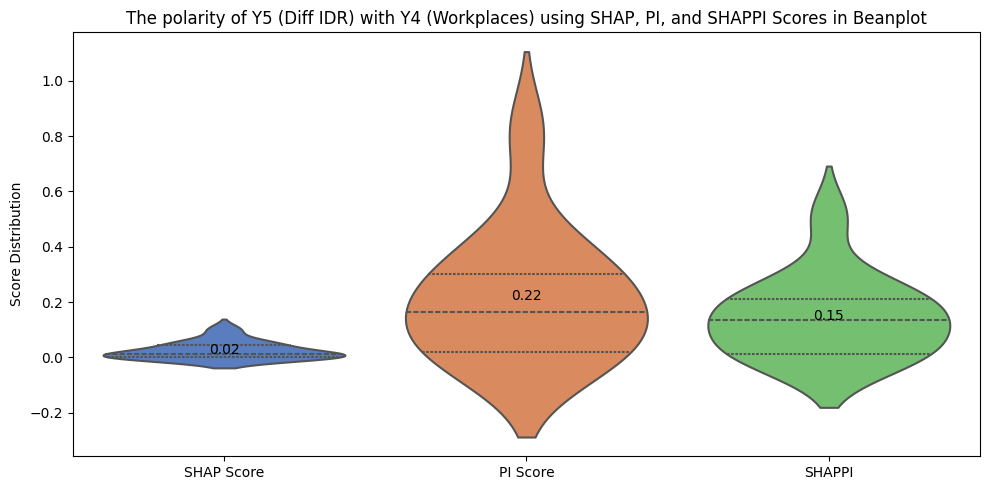

In [ ]:
plot_shap_pi_shappi_with_beanplot(pol_anal_Y5_Y4, "The polarity of Y5 (Diff IDR) with Y4 (Workplaces) using SHAP, PI, and SHAPPI Scores in Beanplot")

In [ ]:
print("Analysis SHAP Y5 Polarity with Y6:")
pol_anal_Y5_Y6, perm_imp_Y5_Y6 = analysis_SHAP(shap_values_Y5, X_features_name, pol_Y6, regrY5, X_Y5, Y5)

Analysis SHAP Y5 Polarity with Y6:
---------------------------------------------------------------
Mean =  [0.0068955  0.00045943 0.0861159  0.01881132 0.07204203 0.22542131
 0.3992333  0.161998   0.20505948 0.0174467  0.         0.        ]
Condition =  [array([False,  True, False, False, False,  True,  True, False, False,
       False,  True,  True])]
--------------------------------------------------------------- 



In [ ]:
print("Analysis SHAPPI Y5 Polarity with Y6:")
shappi_Y5_Y6 = analysis_SHAPPI(pol_anal_Y5_Y6, perm_imp_Y5_Y6)
shappi_Y5_Y6

Analysis SHAPPI Y5 Polarity with Y6:
---------------------------------------------------------------


Feature  Polarity  PI Error    SHAPPI
2   number_vaccinations  Positive  0.027653  0.510785
3     retail_recreation  Positive  0.032951  0.268343
5                 parks  Positive  0.023914  0.235606
8         inflation_yoy  Positive  0.030192  0.203561
4      grocery_pharmacy  Positive  0.012775  0.172994
6      transit_stations  Positive  0.013572  0.154015
7           residential  Positive  0.008432  0.113611
9               BI_rate  Positive  0.011505  0.100551
0                   BOR  Positive  0.006574  0.015741
1     medical_personnel  Positive  0.000003  0.000062
10               bansos  Positive  0.000000  0.000000
11         minimum_wage  Positive  0.000000  0.000000

In [ ]:
pol_anal_Y5_Y6

Feature  SHAP Average  SHAP Score  Polarity  PI Score  \
0                   BOR     -0.002099    0.001727  Positive  0.024329   
1     medical_personnel      0.000296    0.000115  Positive  0.000008   
2   number_vaccinations     -0.033406    0.021570  Positive  0.817669   
3     retail_recreation     -0.004080    0.004712  Positive  0.434978   
4      grocery_pharmacy     -0.058586    0.018045  Positive  0.268149   
5                 parks      0.080237    0.056464  Positive  0.339127   
6      transit_stations      0.099421    0.100000  Positive  0.170099   
7           residential     -0.005888    0.040577  Positive  0.152614   
8         inflation_yoy     -0.043187    0.051363  Positive  0.290893   
9               BI_rate     -0.000054    0.004370  Positive  0.160861   
10               bansos      0.000000    0.000000  Positive  0.000000   
11         minimum_wage      0.000000    0.000000  Positive  0.000000   

    PI Error    SHAPPI  
0   0.006574  0.015741  
1   0.000003  0.000062  
2   0.027653  0.510785  
3   0.032951  0.268343  
4   0.012775  0.172994  
5   0.023914  0.235606  
6   0.013572  0.154015  
7   0.008432  0.113611  
8   0.030192  0.203561  
9   0.011505  0.100551  
10  0.000000  0.000000  
11  0.000000  0.000000

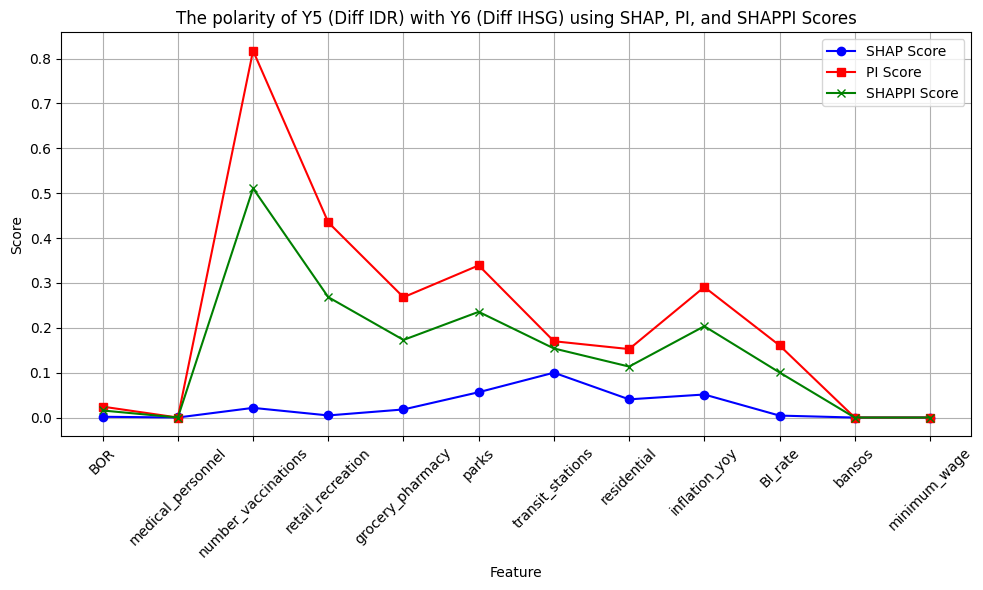

In [ ]:
plot_shap_pi_shappi(pol_anal_Y5_Y6, "The polarity of Y5 (Diff IDR) with Y6 (Diff IHSG) using SHAP, PI, and SHAPPI Scores")

<ipython-input-23-c9a0d6b6b287>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])


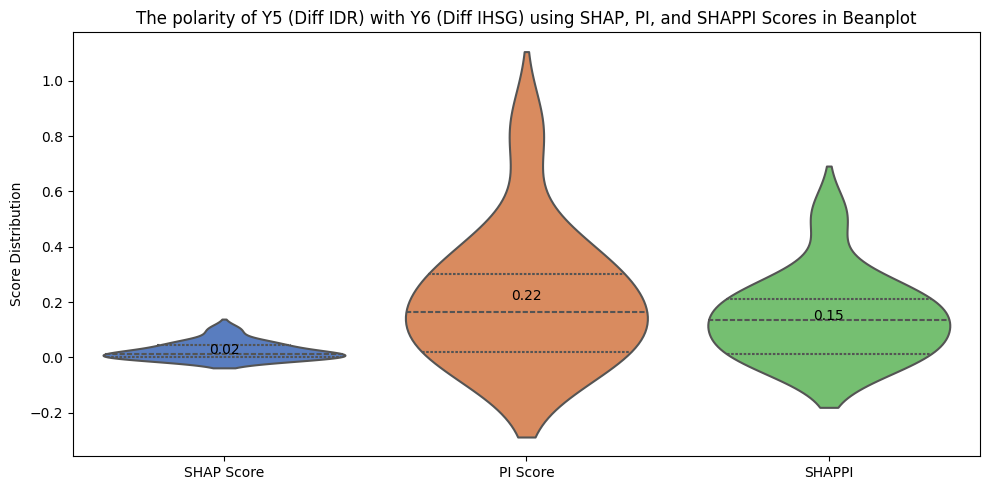

In [ ]:
plot_shap_pi_shappi_with_beanplot(pol_anal_Y5_Y6, "The polarity of Y5 (Diff IDR) with Y6 (Diff IHSG) using SHAP, PI, and SHAPPI Scores in Beanplot")

In [ ]:
print("Analysis SHAP Y6 Polarity with Y1:")
pol_anal_Y6_Y1, perm_imp_Y6_Y1 = analysis_SHAP(shap_values_Y6, X_features_name, pol_Y1, regrY6, X_Y6, Y6)

Analysis SHAP Y6 Polarity with Y1:
---------------------------------------------------------------
Mean =  [3.1815559e-02 9.1563873e-03 1.7644362e-01 2.3790878e-01 1.5126322e-01
 1.4480184e-01 8.7632805e-02 4.6253059e-02 1.7053607e-01 6.7745246e-02
 7.0169248e-05 0.0000000e+00]
Condition =  [array([ True, False, False, False, False,  True, False,  True,  True,
        True, False,  True])]
--------------------------------------------------------------- 



In [ ]:
print("Analysis SHAPPI Y6 Polarity with Y1:")
shappi_Y6_Y1 = analysis_SHAPPI(pol_anal_Y6_Y1, perm_imp_Y6_Y1)
shappi_Y6_Y1

Analysis SHAPPI Y6 Polarity with Y1:
---------------------------------------------------------------


Feature  Polarity  PI Error    SHAPPI
3     retail_recreation  Positive  0.064582  0.550000
4      grocery_pharmacy  Positive  0.027997  0.314113
2   number_vaccinations  Positive  0.013878  0.266211
5                 parks  Positive  0.018958  0.222379
8         inflation_yoy  Positive  0.028320  0.201536
9               BI_rate  Positive  0.018412  0.103995
6      transit_stations  Positive  0.018274  0.092249
7           residential  Positive  0.004095  0.047662
0                   BOR  Positive  0.005996  0.019799
1     medical_personnel  Positive  0.001154  0.003245
10               bansos  Positive  0.000016  0.000023
11         minimum_wage  Positive  0.000000  0.000000

In [ ]:
pol_anal_Y6_Y1

Feature  SHAP Average  SHAP Score  Polarity  PI Score  \
0                   BOR      0.008094    0.013373  Positive  0.032968   
1     medical_personnel     -0.002874    0.003849  Positive  0.003321   
2   number_vaccinations     -0.018839    0.074164  Positive  0.576080   
3     retail_recreation     -0.015632    0.100000  Positive  1.257112   
4      grocery_pharmacy     -0.040592    0.063580  Positive  0.709822   
5                 parks      0.054067    0.060864  Positive  0.482597   
6      transit_stations     -0.012765    0.036835  Positive  0.185629   
7           residential      0.014964    0.019442  Positive  0.095393   
8         inflation_yoy      0.004595    0.071681  Positive  0.416594   
9               BI_rate      0.003037    0.028475  Positive  0.225669   
10               bansos     -0.000062    0.000029  Positive  0.000022   
11         minimum_wage      0.000000    0.000000  Positive  0.000000   

    PI Error    SHAPPI  
0   0.005996  0.019799  
1   0.001154  0.003245  
2   0.013878  0.266211  
3   0.064582  0.550000  
4   0.027997  0.314113  
5   0.018958  0.222379  
6   0.018274  0.092249  
7   0.004095  0.047662  
8   0.028320  0.201536  
9   0.018412  0.103995  
10  0.000016  0.000023  
11  0.000000  0.000000

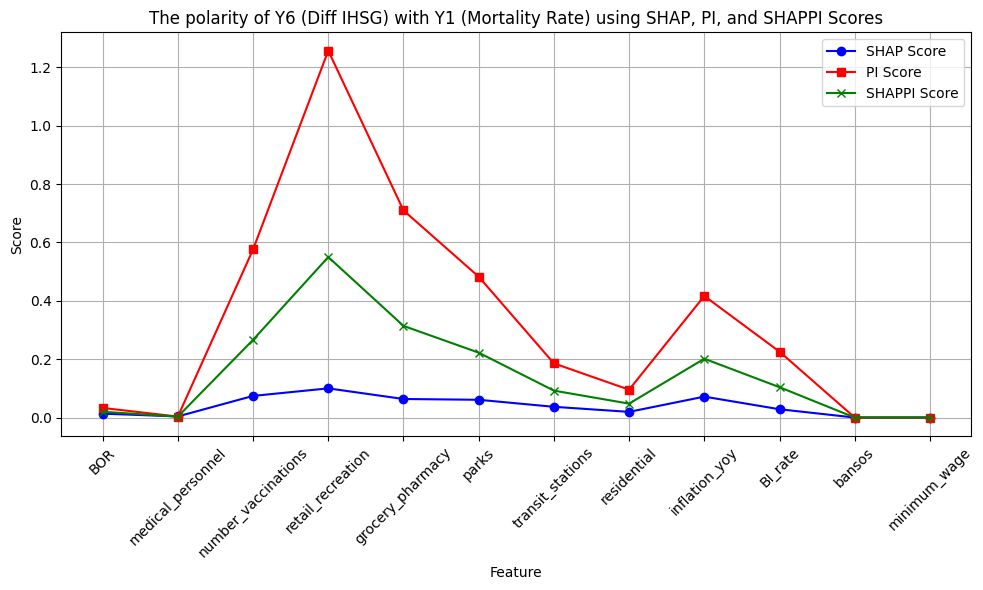

In [ ]:
plot_shap_pi_shappi(pol_anal_Y6_Y1, "The polarity of Y6 (Diff IHSG) with Y1 (Mortality Rate) using SHAP, PI, and SHAPPI Scores")

<ipython-input-23-c9a0d6b6b287>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])


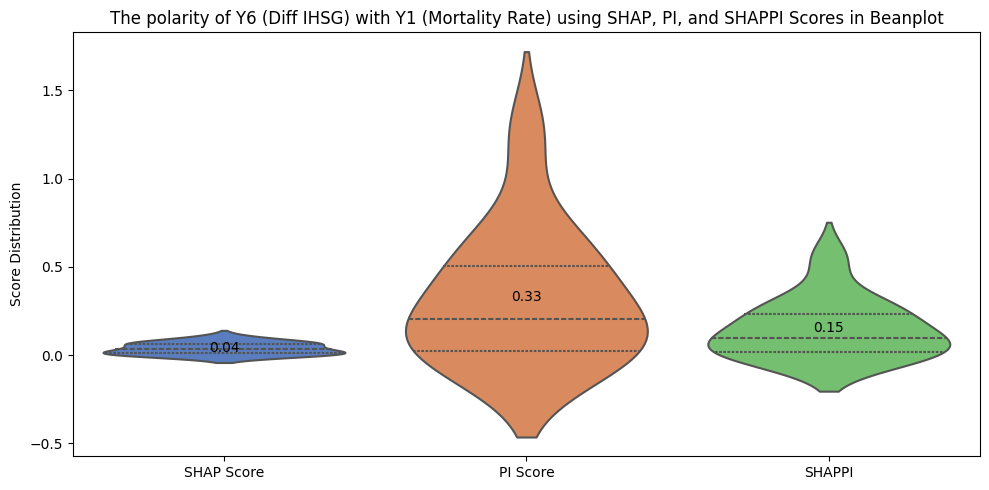

In [ ]:
plot_shap_pi_shappi_with_beanplot(pol_anal_Y6_Y1, "The polarity of Y6 (Diff IHSG) with Y1 (Mortality Rate) using SHAP, PI, and SHAPPI Scores in Beanplot")

In [ ]:
print("Analysis SHAP Y6 Polarity with Y2:")
pol_anal_Y6_Y2, perm_imp_Y6_Y2 = analysis_SHAP(shap_values_Y6, X_features_name, pol_Y2, regrY6, X_Y6, Y6)

Analysis SHAP Y6 Polarity with Y2:
---------------------------------------------------------------
Mean =  [3.1815559e-02 9.1563873e-03 1.7644362e-01 2.3790878e-01 1.5126322e-01
 1.4480184e-01 8.7632805e-02 4.6253059e-02 1.7053607e-01 6.7745246e-02
 7.0169248e-05 0.0000000e+00]
Condition =  [array([ True, False, False, False, False,  True, False,  True,  True,
        True, False,  True])]
--------------------------------------------------------------- 



In [ ]:
print("Analysis SHAPPI Y6 Polarity with Y2:")
shappi_Y6_Y2 = analysis_SHAPPI(pol_anal_Y6_Y2, perm_imp_Y6_Y2)
shappi_Y6_Y2

Analysis SHAPPI Y6 Polarity with Y2:
---------------------------------------------------------------


Feature  Polarity  PI Error    SHAPPI
3     retail_recreation  Positive  0.064582  0.550000
4      grocery_pharmacy  Positive  0.027997  0.314113
2   number_vaccinations  Positive  0.013878  0.266211
5                 parks  Positive  0.018958  0.222379
8         inflation_yoy  Positive  0.028320  0.201536
9               BI_rate  Positive  0.018412  0.103995
6      transit_stations  Positive  0.018274  0.092249
7           residential  Positive  0.004095  0.047662
0                   BOR  Positive  0.005996  0.019799
1     medical_personnel  Positive  0.001154  0.003245
10               bansos  Positive  0.000016  0.000023
11         minimum_wage  Positive  0.000000  0.000000

In [ ]:
pol_anal_Y6_Y2

Feature  SHAP Average  SHAP Score  Polarity  PI Score  \
0                   BOR      0.008094    0.013373  Positive  0.032968   
1     medical_personnel     -0.002874    0.003849  Positive  0.003321   
2   number_vaccinations     -0.018839    0.074164  Positive  0.576080   
3     retail_recreation     -0.015632    0.100000  Positive  1.257112   
4      grocery_pharmacy     -0.040592    0.063580  Positive  0.709822   
5                 parks      0.054067    0.060864  Positive  0.482597   
6      transit_stations     -0.012765    0.036835  Positive  0.185629   
7           residential      0.014964    0.019442  Positive  0.095393   
8         inflation_yoy      0.004595    0.071681  Positive  0.416594   
9               BI_rate      0.003037    0.028475  Positive  0.225669   
10               bansos     -0.000062    0.000029  Positive  0.000022   
11         minimum_wage      0.000000    0.000000  Positive  0.000000   

    PI Error    SHAPPI  
0   0.005996  0.019799  
1   0.001154  0.003245  
2   0.013878  0.266211  
3   0.064582  0.550000  
4   0.027997  0.314113  
5   0.018958  0.222379  
6   0.018274  0.092249  
7   0.004095  0.047662  
8   0.028320  0.201536  
9   0.018412  0.103995  
10  0.000016  0.000023  
11  0.000000  0.000000

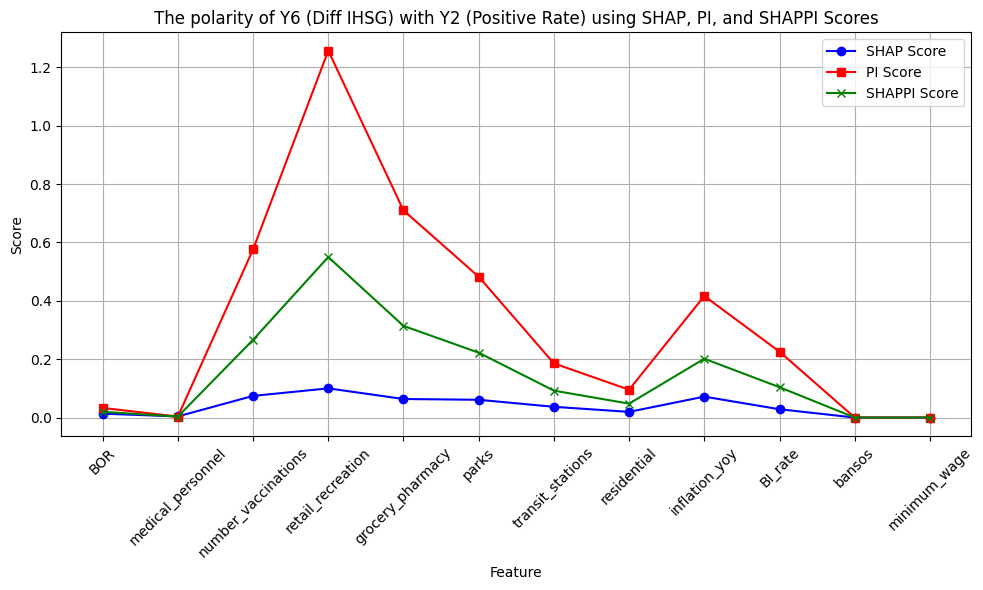

In [ ]:
plot_shap_pi_shappi(pol_anal_Y6_Y2, "The polarity of Y6 (Diff IHSG) with Y2 (Positive Rate) using SHAP, PI, and SHAPPI Scores")

<ipython-input-23-c9a0d6b6b287>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])


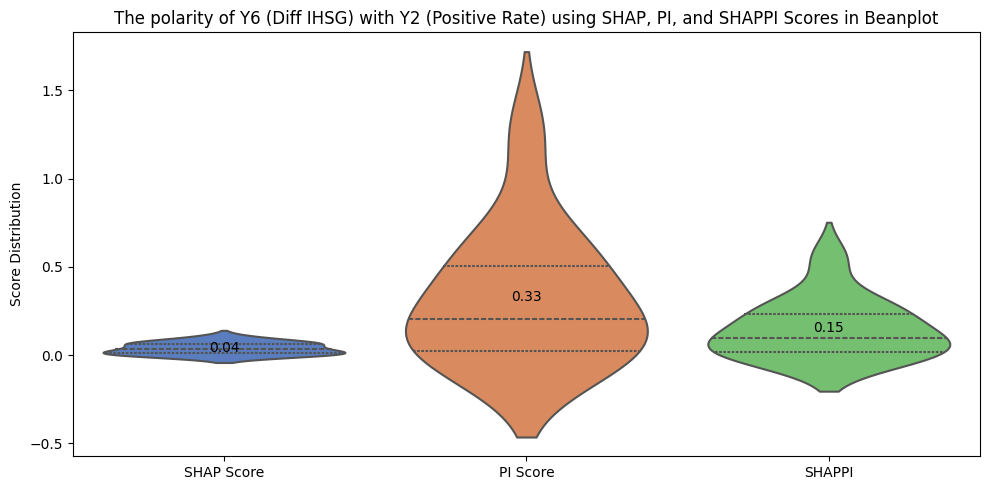

In [ ]:
plot_shap_pi_shappi_with_beanplot(pol_anal_Y6_Y2, "The polarity of Y6 (Diff IHSG) with Y2 (Positive Rate) using SHAP, PI, and SHAPPI Scores in Beanplot")

In [ ]:
print("Analysis SHAP Y6 Polarity with Y3:")
pol_anal_Y6_Y3, perm_imp_Y6_Y3 = analysis_SHAP(shap_values_Y6, X_features_name, pol_Y3, regrY6, X_Y6, Y6)

Analysis SHAP Y6 Polarity with Y3:
---------------------------------------------------------------
Mean =  [3.1815559e-02 9.1563873e-03 1.7644362e-01 2.3790878e-01 1.5126322e-01
 1.4480184e-01 8.7632805e-02 4.6253059e-02 1.7053607e-01 6.7745246e-02
 7.0169248e-05 0.0000000e+00]
Condition =  [array([ True, False, False, False, False,  True, False,  True,  True,
        True, False,  True])]
--------------------------------------------------------------- 



In [ ]:
print("Analysis SHAPPI Y6 Polarity with Y3:")
shappi_Y6_Y3 = analysis_SHAPPI(pol_anal_Y6_Y3, perm_imp_Y6_Y3)
shappi_Y6_Y3

Analysis SHAPPI Y6 Polarity with Y3:
---------------------------------------------------------------


Feature  Polarity  PI Error    SHAPPI
3     retail_recreation  Positive  0.064582  0.550000
4      grocery_pharmacy  Positive  0.027997  0.314113
2   number_vaccinations  Positive  0.013878  0.266211
5                 parks  Positive  0.018958  0.222379
8         inflation_yoy  Positive  0.028320  0.201536
9               BI_rate  Positive  0.018412  0.103995
6      transit_stations  Positive  0.018274  0.092249
7           residential  Positive  0.004095  0.047662
0                   BOR  Positive  0.005996  0.019799
1     medical_personnel  Positive  0.001154  0.003245
10               bansos  Positive  0.000016  0.000023
11         minimum_wage  Positive  0.000000  0.000000

In [ ]:
pol_anal_Y6_Y3

Feature  SHAP Average  SHAP Score  Polarity  PI Score  \
0                   BOR      0.008094    0.013373  Positive  0.032968   
1     medical_personnel     -0.002874    0.003849  Positive  0.003321   
2   number_vaccinations     -0.018839    0.074164  Positive  0.576080   
3     retail_recreation     -0.015632    0.100000  Positive  1.257112   
4      grocery_pharmacy     -0.040592    0.063580  Positive  0.709822   
5                 parks      0.054067    0.060864  Positive  0.482597   
6      transit_stations     -0.012765    0.036835  Positive  0.185629   
7           residential      0.014964    0.019442  Positive  0.095393   
8         inflation_yoy      0.004595    0.071681  Positive  0.416594   
9               BI_rate      0.003037    0.028475  Positive  0.225669   
10               bansos     -0.000062    0.000029  Positive  0.000022   
11         minimum_wage      0.000000    0.000000  Positive  0.000000   

    PI Error    SHAPPI  
0   0.005996  0.019799  
1   0.001154  0.003245  
2   0.013878  0.266211  
3   0.064582  0.550000  
4   0.027997  0.314113  
5   0.018958  0.222379  
6   0.018274  0.092249  
7   0.004095  0.047662  
8   0.028320  0.201536  
9   0.018412  0.103995  
10  0.000016  0.000023  
11  0.000000  0.000000

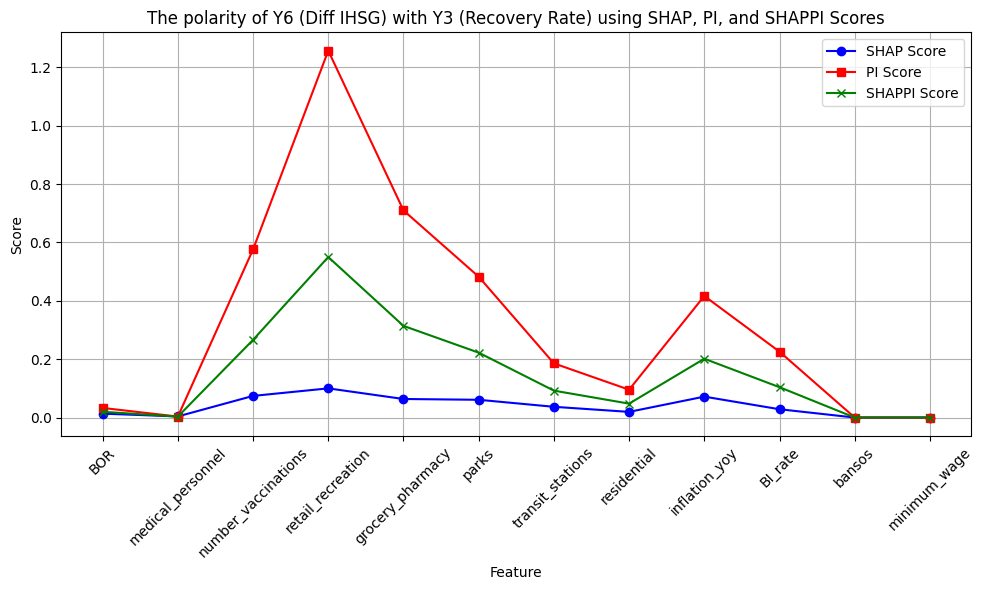

In [ ]:
plot_shap_pi_shappi(pol_anal_Y6_Y3, "The polarity of Y6 (Diff IHSG) with Y3 (Recovery Rate) using SHAP, PI, and SHAPPI Scores")

<ipython-input-23-c9a0d6b6b287>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])


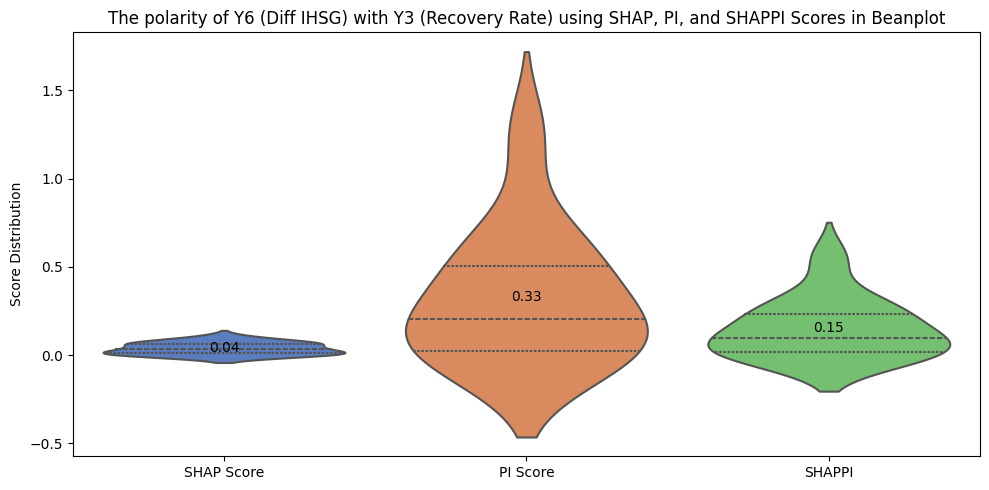

In [ ]:
plot_shap_pi_shappi_with_beanplot(pol_anal_Y6_Y3, "The polarity of Y6 (Diff IHSG) with Y3 (Recovery Rate) using SHAP, PI, and SHAPPI Scores in Beanplot")

In [ ]:
print("Analysis SHAP Y6 Polarity with Y4:")
pol_anal_Y6_Y4, perm_imp_Y6_Y4 = analysis_SHAP(shap_values_Y6, X_features_name, pol_Y4, regrY6, X_Y6, Y6)

Analysis SHAP Y6 Polarity with Y4:
---------------------------------------------------------------
Mean =  [3.1815559e-02 9.1563873e-03 1.7644362e-01 2.3790878e-01 1.5126322e-01
 1.4480184e-01 8.7632805e-02 4.6253059e-02 1.7053607e-01 6.7745246e-02
 7.0169248e-05 0.0000000e+00]
Condition =  [array([ True, False, False, False, False,  True, False,  True,  True,
        True, False,  True])]
--------------------------------------------------------------- 



In [ ]:
print("Analysis SHAPPI Y6 Polarity with Y4:")
shappi_Y6_Y4 = analysis_SHAPPI(pol_anal_Y6_Y4, perm_imp_Y6_Y4)
shappi_Y6_Y4

Analysis SHAPPI Y6 Polarity with Y4:
---------------------------------------------------------------


Feature  Polarity  PI Error    SHAPPI
3     retail_recreation  Positive  0.064582  0.550000
4      grocery_pharmacy  Positive  0.027997  0.314113
2   number_vaccinations  Positive  0.013878  0.266211
5                 parks  Positive  0.018958  0.222379
8         inflation_yoy  Positive  0.028320  0.201536
9               BI_rate  Positive  0.018412  0.103995
6      transit_stations  Positive  0.018274  0.092249
7           residential  Positive  0.004095  0.047662
0                   BOR  Positive  0.005996  0.019799
1     medical_personnel  Positive  0.001154  0.003245
10               bansos  Positive  0.000016  0.000023
11         minimum_wage  Positive  0.000000  0.000000

In [ ]:
pol_anal_Y6_Y4

Feature  SHAP Average  SHAP Score  Polarity  PI Score  \
0                   BOR      0.008094    0.013373  Positive  0.032968   
1     medical_personnel     -0.002874    0.003849  Positive  0.003321   
2   number_vaccinations     -0.018839    0.074164  Positive  0.576080   
3     retail_recreation     -0.015632    0.100000  Positive  1.257112   
4      grocery_pharmacy     -0.040592    0.063580  Positive  0.709822   
5                 parks      0.054067    0.060864  Positive  0.482597   
6      transit_stations     -0.012765    0.036835  Positive  0.185629   
7           residential      0.014964    0.019442  Positive  0.095393   
8         inflation_yoy      0.004595    0.071681  Positive  0.416594   
9               BI_rate      0.003037    0.028475  Positive  0.225669   
10               bansos     -0.000062    0.000029  Positive  0.000022   
11         minimum_wage      0.000000    0.000000  Positive  0.000000   

    PI Error    SHAPPI  
0   0.005996  0.019799  
1   0.001154  0.003245  
2   0.013878  0.266211  
3   0.064582  0.550000  
4   0.027997  0.314113  
5   0.018958  0.222379  
6   0.018274  0.092249  
7   0.004095  0.047662  
8   0.028320  0.201536  
9   0.018412  0.103995  
10  0.000016  0.000023  
11  0.000000  0.000000

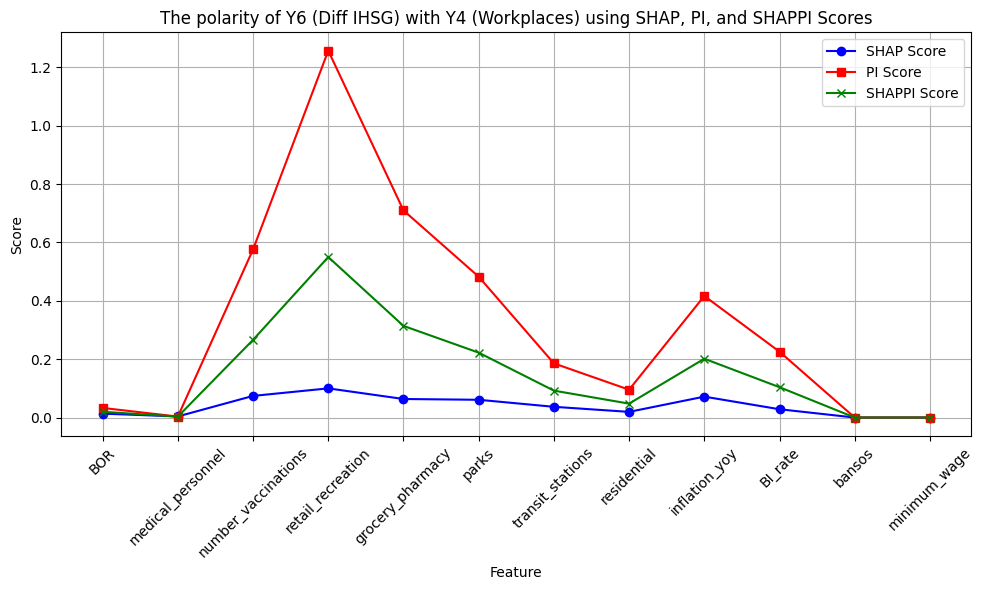

In [ ]:
plot_shap_pi_shappi(pol_anal_Y6_Y4, "The polarity of Y6 (Diff IHSG) with Y4 (Workplaces) using SHAP, PI, and SHAPPI Scores")

<ipython-input-23-c9a0d6b6b287>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])


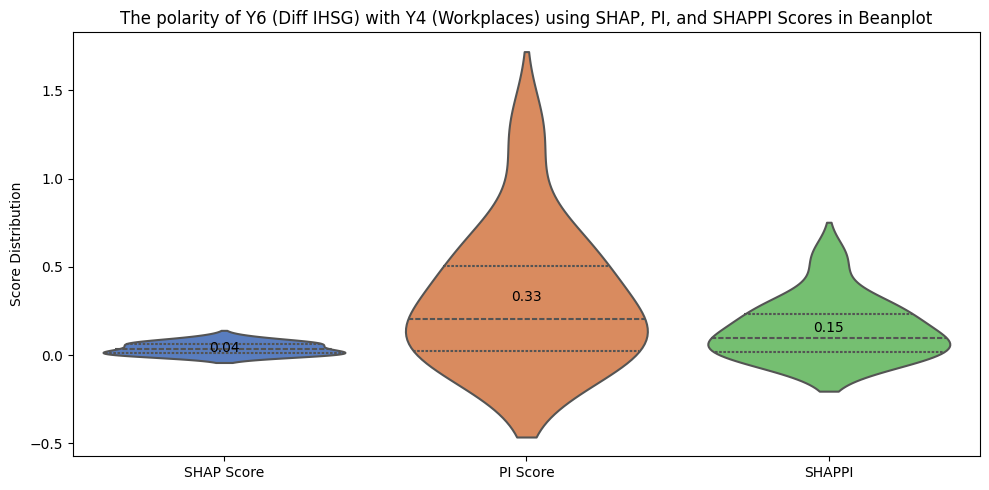

In [ ]:
plot_shap_pi_shappi_with_beanplot(pol_anal_Y6_Y4, "The polarity of Y6 (Diff IHSG) with Y4 (Workplaces) using SHAP, PI, and SHAPPI Scores in Beanplot")

In [ ]:
print("Analysis SHAP Y6 Polarity with Y5:")
pol_anal_Y6_Y5, perm_imp_Y6_Y5 = analysis_SHAP(shap_values_Y6, X_features_name, pol_Y5, regrY6, X_Y6, Y6)

Analysis SHAP Y6 Polarity with Y5:
---------------------------------------------------------------
Mean =  [3.1815559e-02 9.1563873e-03 1.7644362e-01 2.3790878e-01 1.5126322e-01
 1.4480184e-01 8.7632805e-02 4.6253059e-02 1.7053607e-01 6.7745246e-02
 7.0169248e-05 0.0000000e+00]
Condition =  [array([ True, False, False, False, False,  True, False,  True,  True,
        True, False,  True])]
--------------------------------------------------------------- 



In [ ]:
print("Analysis SHAPPI Y6 Polarity with Y5:")
shappi_Y6_Y5 = analysis_SHAPPI(pol_anal_Y6_Y5, perm_imp_Y6_Y5)
shappi_Y6_Y5

Analysis SHAPPI Y6 Polarity with Y5:
---------------------------------------------------------------


Feature  Polarity  PI Error    SHAPPI
3     retail_recreation  Positive  0.064582  0.550000
4      grocery_pharmacy  Positive  0.027997  0.314113
2   number_vaccinations  Positive  0.013878  0.266211
5                 parks  Positive  0.018958  0.222379
8         inflation_yoy  Positive  0.028320  0.201536
9               BI_rate  Positive  0.018412  0.103995
6      transit_stations  Positive  0.018274  0.092249
7           residential  Positive  0.004095  0.047662
0                   BOR  Positive  0.005996  0.019799
1     medical_personnel  Positive  0.001154  0.003245
10               bansos  Positive  0.000016  0.000023
11         minimum_wage  Positive  0.000000  0.000000

In [ ]:
pol_anal_Y6_Y5

Feature  SHAP Average  SHAP Score  Polarity  PI Score  \
0                   BOR      0.008094    0.013373  Positive  0.032968   
1     medical_personnel     -0.002874    0.003849  Positive  0.003321   
2   number_vaccinations     -0.018839    0.074164  Positive  0.576080   
3     retail_recreation     -0.015632    0.100000  Positive  1.257112   
4      grocery_pharmacy     -0.040592    0.063580  Positive  0.709822   
5                 parks      0.054067    0.060864  Positive  0.482597   
6      transit_stations     -0.012765    0.036835  Positive  0.185629   
7           residential      0.014964    0.019442  Positive  0.095393   
8         inflation_yoy      0.004595    0.071681  Positive  0.416594   
9               BI_rate      0.003037    0.028475  Positive  0.225669   
10               bansos     -0.000062    0.000029  Positive  0.000022   
11         minimum_wage      0.000000    0.000000  Positive  0.000000   

    PI Error    SHAPPI  
0   0.005996  0.019799  
1   0.001154  0.003245  
2   0.013878  0.266211  
3   0.064582  0.550000  
4   0.027997  0.314113  
5   0.018958  0.222379  
6   0.018274  0.092249  
7   0.004095  0.047662  
8   0.028320  0.201536  
9   0.018412  0.103995  
10  0.000016  0.000023  
11  0.000000  0.000000

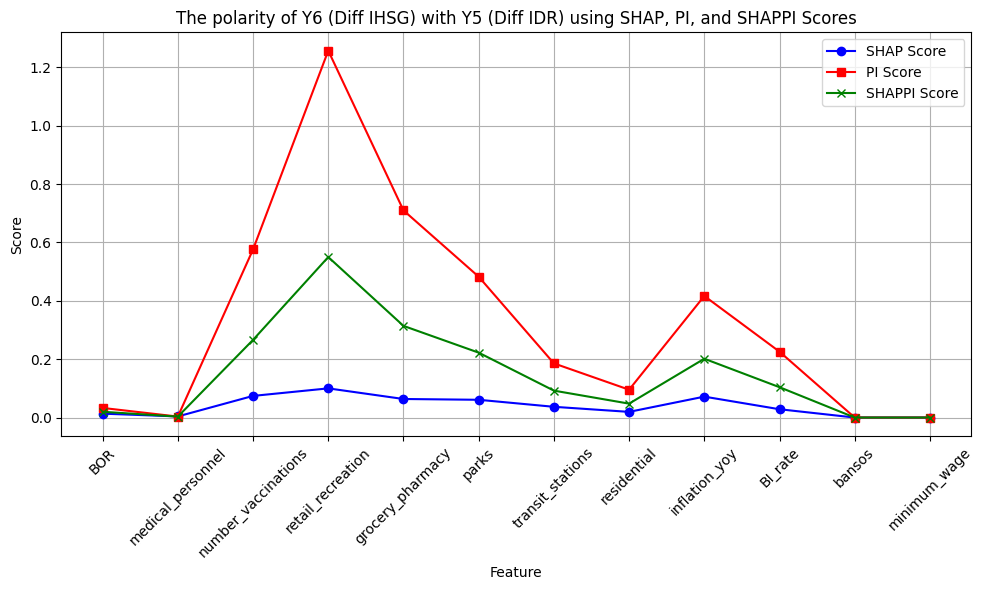

In [ ]:
plot_shap_pi_shappi(pol_anal_Y6_Y5, "The polarity of Y6 (Diff IHSG) with Y5 (Diff IDR) using SHAP, PI, and SHAPPI Scores")

<ipython-input-23-c9a0d6b6b287>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['SHAP Score', 'PI Score', 'SHAPPI'])


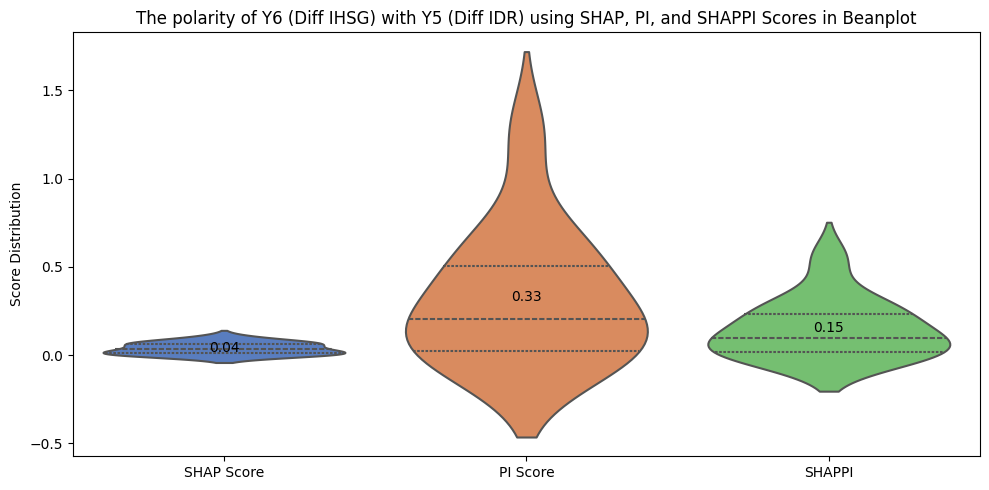

In [ ]:
plot_shap_pi_shappi_with_beanplot(pol_anal_Y6_Y5, "The polarity of Y6 (Diff IHSG) with Y5 (Diff IDR) using SHAP, PI, and SHAPPI Scores in Beanplot")

##**Perhitungan Bobot SHAP, PI, dan SHAPPI**

In [ ]:
def get_score_shap(pol_anal):
  shap_scores = pol_anal[["Feature", "SHAP Score"]]

  shap_scores_ = shap_scores.set_index("Feature").to_dict()["SHAP Score"]
  return shap_scores_

In [ ]:
def get_score_pi(pol_anal):
  pi_scores = pol_anal[["Feature", "PI Score"]]

  pi_scores_ = pi_scores.set_index("Feature").to_dict()["PI Score"]
  return pi_scores_

In [ ]:
def get_score_shappi(shappi):
  # Mengambil hanya kolom "Feature" dan "SHAPPI"
  shappi_scores = shappi[["Feature", "SHAPPI"]]

  # Mengkonversi DataFrame menjadi dictionary
  shappi_scores_ = shappi_scores.set_index("Feature").to_dict()["SHAPPI"]
  return shappi_scores_

In [ ]:
# Menggabungkan seluruh perhitungan SHAP, PI dan SHAPPI yang dilakukan dari Y1-Y2, Y1-Y3, Y1-Y4 dst....sampai Y6-Y4, Y6-Y5
var_Y = ["Y1", "Y2", "Y3", "Y4", "Y5", "Y6"]

shap_scores = {
    f"{y1}_{y2}": get_score_shap(globals()[f"pol_anal_{y1}_{y2}"])
    for y1 in var_Y for y2 in var_Y if y1 != y2
}

pi_scores = {
    f"{y1}_{y2}": get_score_pi(globals()[f"pol_anal_{y1}_{y2}"])
    for y1 in var_Y for y2 in var_Y if y1 != y2
}

shappi_scores = {
    f"{y1}_{y2}": get_score_shappi(globals()[f"shappi_{y1}_{y2}"])
    for y1 in var_Y for y2 in var_Y if y1 != y2
}

In [ ]:
def calculate_weight_feature_for_Y(scores, txt_Y, txt):
  # Menggabungkan skor akhir SHAPPI
  combined_scores = {} # inisialisasi awal

  for key, dicts in scores.items():
    if txt_Y in key:
      for key, value in dicts.items():
        if key in combined_scores:
          combined_scores[key] += value
        else:
          combined_scores[key] = value

  # Menghitung total skor dari gabungan tabel
  total_score_combined = sum(combined_scores.values())

  # Menghitung bobot untuk setiap fitur
  weights = {feature: score / total_score_combined for feature, score in combined_scores.items()}

  # Mengurutkan bobot dari yang tertinggi ke yang terendah
  sorted_weights = sorted(weights.items(), key=lambda item: item[1], reverse=True)

  print(f"Weight of Features for [{txt_Y}] from {txt}\n-----------------------------------")
  # Mencetak bobot yang sudah diurutkan
  for feature, weight in sorted_weights:
      print(f"Weight of {feature.upper()}: {weight:.4f}")

  # Menyimpan bobot ke dalam dictionary untuk digunakan dalam fungsi objektif
  weight_dict = {feature: weight for feature, weight in sorted_weights}

  return weight_dict

### Menghitung Bobot SHAP

In [ ]:
Y1_shap_weights = calculate_weight_feature_for_Y(shap_scores, "Y1", "SHAP")

Weight of Features for [Y1] from SHAP
-----------------------------------
Weight of NUMBER_VACCINATIONS: 0.3926
Weight of INFLATION_YOY: 0.1661
Weight of TRANSIT_STATIONS: 0.1193
Weight of PARKS: 0.0876
Weight of RETAIL_RECREATION: 0.0584
Weight of GROCERY_PHARMACY: 0.0555
Weight of RESIDENTIAL: 0.0542
Weight of BOR: 0.0356
Weight of BI_RATE: 0.0286
Weight of MEDICAL_PERSONNEL: 0.0020
Weight of BANSOS: 0.0000
Weight of MINIMUM_WAGE: 0.0000


In [ ]:
Y2_shap_weights = calculate_weight_feature_for_Y(shap_scores, "Y2", "SHAP")

Weight of Features for [Y2] from SHAP
-----------------------------------
Weight of NUMBER_VACCINATIONS: 0.3116
Weight of INFLATION_YOY: 0.2701
Weight of TRANSIT_STATIONS: 0.1103
Weight of PARKS: 0.0777
Weight of GROCERY_PHARMACY: 0.0658
Weight of RETAIL_RECREATION: 0.0533
Weight of RESIDENTIAL: 0.0523
Weight of BOR: 0.0320
Weight of BI_RATE: 0.0252
Weight of MEDICAL_PERSONNEL: 0.0017
Weight of BANSOS: 0.0000
Weight of MINIMUM_WAGE: 0.0000


In [ ]:
Y3_shap_weights = calculate_weight_feature_for_Y(shap_scores, "Y3", "SHAP")

Weight of Features for [Y3] from SHAP
-----------------------------------
Weight of NUMBER_VACCINATIONS: 0.3961
Weight of INFLATION_YOY: 0.1595
Weight of TRANSIT_STATIONS: 0.1207
Weight of PARKS: 0.0881
Weight of RETAIL_RECREATION: 0.0586
Weight of GROCERY_PHARMACY: 0.0559
Weight of RESIDENTIAL: 0.0529
Weight of BOR: 0.0372
Weight of BI_RATE: 0.0291
Weight of MEDICAL_PERSONNEL: 0.0020
Weight of BANSOS: 0.0000
Weight of MINIMUM_WAGE: 0.0000


In [ ]:
Y4_shap_weights = calculate_weight_feature_for_Y(shap_scores, "Y4", "SHAP")

Weight of Features for [Y4] from SHAP
-----------------------------------
Weight of TRANSIT_STATIONS: 0.2339
Weight of NUMBER_VACCINATIONS: 0.1810
Weight of INFLATION_YOY: 0.1810
Weight of PARKS: 0.1467
Weight of RESIDENTIAL: 0.0979
Weight of GROCERY_PHARMACY: 0.0673
Weight of RETAIL_RECREATION: 0.0490
Weight of BI_RATE: 0.0235
Weight of BOR: 0.0180
Weight of MEDICAL_PERSONNEL: 0.0017
Weight of BANSOS: 0.0000
Weight of MINIMUM_WAGE: 0.0000


In [ ]:
Y5_shap_weights = calculate_weight_feature_for_Y(shap_scores, "Y5", "SHAP")

Weight of Features for [Y5] from SHAP
-----------------------------------
Weight of TRANSIT_STATIONS: 0.2339
Weight of NUMBER_VACCINATIONS: 0.1810
Weight of INFLATION_YOY: 0.1810
Weight of PARKS: 0.1467
Weight of RESIDENTIAL: 0.0979
Weight of GROCERY_PHARMACY: 0.0673
Weight of RETAIL_RECREATION: 0.0490
Weight of BI_RATE: 0.0235
Weight of BOR: 0.0180
Weight of MEDICAL_PERSONNEL: 0.0017
Weight of BANSOS: 0.0000
Weight of MINIMUM_WAGE: 0.0000


In [ ]:
Y6_shap_weights = calculate_weight_feature_for_Y(shap_scores, "Y6", "SHAP")

Weight of Features for [Y6] from SHAP
-----------------------------------
Weight of NUMBER_VACCINATIONS: 0.2056
Weight of INFLATION_YOY: 0.1682
Weight of RETAIL_RECREATION: 0.1494
Weight of PARKS: 0.1224
Weight of TRANSIT_STATIONS: 0.1139
Weight of GROCERY_PHARMACY: 0.1065
Weight of RESIDENTIAL: 0.0538
Weight of BI_RATE: 0.0467
Weight of BOR: 0.0278
Weight of MEDICAL_PERSONNEL: 0.0057
Weight of BANSOS: 0.0000
Weight of MINIMUM_WAGE: 0.0000


### Menghitung Bobot PI

In [ ]:
Y1_pi_weights = calculate_weight_feature_for_Y(pi_scores, "Y1", "PI")

Weight of Features for [Y1] from PI
-----------------------------------
Weight of NUMBER_VACCINATIONS: 0.6157
Weight of INFLATION_YOY: 0.1065
Weight of RETAIL_RECREATION: 0.0781
Weight of GROCERY_PHARMACY: 0.0521
Weight of TRANSIT_STATIONS: 0.0502
Weight of PARKS: 0.0480
Weight of RESIDENTIAL: 0.0215
Weight of BI_RATE: 0.0197
Weight of BOR: 0.0080
Weight of MEDICAL_PERSONNEL: 0.0002
Weight of BANSOS: 0.0000
Weight of MINIMUM_WAGE: 0.0000


In [ ]:
Y2_pi_weights = calculate_weight_feature_for_Y(pi_scores, "Y2", "PI")

Weight of Features for [Y2] from PI
-----------------------------------
Weight of NUMBER_VACCINATIONS: 0.5041
Weight of INFLATION_YOY: 0.2471
Weight of RETAIL_RECREATION: 0.0646
Weight of TRANSIT_STATIONS: 0.0468
Weight of GROCERY_PHARMACY: 0.0454
Weight of PARKS: 0.0413
Weight of RESIDENTIAL: 0.0232
Weight of BI_RATE: 0.0167
Weight of BOR: 0.0107
Weight of MEDICAL_PERSONNEL: 0.0001
Weight of BANSOS: 0.0000
Weight of MINIMUM_WAGE: 0.0000


In [ ]:
Y3_pi_weights = calculate_weight_feature_for_Y(pi_scores, "Y3", "PI")

Weight of Features for [Y3] from PI
-----------------------------------
Weight of NUMBER_VACCINATIONS: 0.6219
Weight of INFLATION_YOY: 0.1004
Weight of RETAIL_RECREATION: 0.0782
Weight of GROCERY_PHARMACY: 0.0521
Weight of TRANSIT_STATIONS: 0.0502
Weight of PARKS: 0.0479
Weight of RESIDENTIAL: 0.0213
Weight of BI_RATE: 0.0195
Weight of BOR: 0.0083
Weight of MEDICAL_PERSONNEL: 0.0002
Weight of BANSOS: 0.0000
Weight of MINIMUM_WAGE: 0.0000


In [ ]:
Y4_pi_weights = calculate_weight_feature_for_Y(pi_scores, "Y4", "PI")

Weight of Features for [Y4] from PI
-----------------------------------
Weight of NUMBER_VACCINATIONS: 0.3404
Weight of TRANSIT_STATIONS: 0.1848
Weight of INFLATION_YOY: 0.1361
Weight of PARKS: 0.0904
Weight of RETAIL_RECREATION: 0.0832
Weight of GROCERY_PHARMACY: 0.0822
Weight of RESIDENTIAL: 0.0559
Weight of BI_RATE: 0.0207
Weight of BOR: 0.0063
Weight of MEDICAL_PERSONNEL: 0.0002
Weight of BANSOS: 0.0000
Weight of MINIMUM_WAGE: 0.0000


In [ ]:
Y5_pi_weights = calculate_weight_feature_for_Y(pi_scores, "Y5", "PI")

Weight of Features for [Y5] from PI
-----------------------------------
Weight of NUMBER_VACCINATIONS: 0.3918
Weight of RETAIL_RECREATION: 0.1353
Weight of INFLATION_YOY: 0.1289
Weight of PARKS: 0.0945
Weight of GROCERY_PHARMACY: 0.0870
Weight of TRANSIT_STATIONS: 0.0700
Weight of RESIDENTIAL: 0.0423
Weight of BI_RATE: 0.0413
Weight of BOR: 0.0088
Weight of MEDICAL_PERSONNEL: 0.0001
Weight of BANSOS: 0.0000
Weight of MINIMUM_WAGE: 0.0000


In [ ]:
Y6_pi_weights = calculate_weight_feature_for_Y(pi_scores, "Y6", "PI")

Weight of Features for [Y6] from PI
-----------------------------------
Weight of NUMBER_VACCINATIONS: 0.2932
Weight of RETAIL_RECREATION: 0.2186
Weight of GROCERY_PHARMACY: 0.1293
Weight of INFLATION_YOY: 0.1230
Weight of PARKS: 0.0968
Weight of TRANSIT_STATIONS: 0.0600
Weight of BI_RATE: 0.0426
Weight of RESIDENTIAL: 0.0276
Weight of BOR: 0.0084
Weight of MEDICAL_PERSONNEL: 0.0005
Weight of BANSOS: 0.0000
Weight of MINIMUM_WAGE: 0.0000


### Menghitung Bobot SHAPPI

In [ ]:
Y1_shappi_weights = calculate_weight_feature_for_Y(shappi_scores, "Y1", "SHAPPI")

Weight of Features for [Y1] from SHAPPI
-----------------------------------
Weight of NUMBER_VACCINATIONS: 0.5039
Weight of INFLATION_YOY: 0.1139
Weight of RETAIL_RECREATION: 0.0897
Weight of TRANSIT_STATIONS: 0.0866
Weight of PARKS: 0.0692
Weight of GROCERY_PHARMACY: 0.0657
Weight of RESIDENTIAL: 0.0349
Weight of BI_RATE: 0.0250
Weight of BOR: 0.0106
Weight of MEDICAL_PERSONNEL: 0.0004
Weight of BANSOS: 0.0000
Weight of MINIMUM_WAGE: 0.0000


In [ ]:
Y2_shappi_weights = calculate_weight_feature_for_Y(shappi_scores, "Y2", "SHAPPI")

Weight of Features for [Y2] from SHAPPI
-----------------------------------
Weight of NUMBER_VACCINATIONS: 0.4267
Weight of INFLATION_YOY: 0.2254
Weight of TRANSIT_STATIONS: 0.0793
Weight of RETAIL_RECREATION: 0.0777
Weight of PARKS: 0.0612
Weight of GROCERY_PHARMACY: 0.0603
Weight of RESIDENTIAL: 0.0347
Weight of BI_RATE: 0.0220
Weight of BOR: 0.0124
Weight of MEDICAL_PERSONNEL: 0.0003
Weight of BANSOS: 0.0000
Weight of MINIMUM_WAGE: 0.0000


In [ ]:
Y3_shappi_weights = calculate_weight_feature_for_Y(shappi_scores, "Y3", "SHAPPI")

Weight of Features for [Y3] from SHAPPI
-----------------------------------
Weight of NUMBER_VACCINATIONS: 0.5065
Weight of INFLATION_YOY: 0.1094
Weight of RETAIL_RECREATION: 0.0902
Weight of TRANSIT_STATIONS: 0.0871
Weight of PARKS: 0.0695
Weight of GROCERY_PHARMACY: 0.0660
Weight of RESIDENTIAL: 0.0348
Weight of BI_RATE: 0.0250
Weight of BOR: 0.0110
Weight of MEDICAL_PERSONNEL: 0.0004
Weight of BANSOS: 0.0000
Weight of MINIMUM_WAGE: 0.0000


In [ ]:
Y4_shappi_weights = calculate_weight_feature_for_Y(shappi_scores, "Y4", "SHAPPI")

Weight of Features for [Y4] from SHAPPI
-----------------------------------
Weight of TRANSIT_STATIONS: 0.2469
Weight of NUMBER_VACCINATIONS: 0.2425
Weight of INFLATION_YOY: 0.1337
Weight of PARKS: 0.1129
Weight of GROCERY_PHARMACY: 0.0885
Weight of RESIDENTIAL: 0.0750
Weight of RETAIL_RECREATION: 0.0731
Weight of BI_RATE: 0.0207
Weight of BOR: 0.0065
Weight of MEDICAL_PERSONNEL: 0.0003
Weight of BANSOS: 0.0000
Weight of MINIMUM_WAGE: 0.0000


In [ ]:
Y5_shappi_weights = calculate_weight_feature_for_Y(shappi_scores, "Y5", "SHAPPI")

Weight of Features for [Y5] from SHAPPI
-----------------------------------
Weight of NUMBER_VACCINATIONS: 0.3233
Weight of RETAIL_RECREATION: 0.1351
Weight of INFLATION_YOY: 0.1268
Weight of PARKS: 0.1124
Weight of TRANSIT_STATIONS: 0.1010
Weight of GROCERY_PHARMACY: 0.0924
Weight of RESIDENTIAL: 0.0551
Weight of BI_RATE: 0.0442
Weight of BOR: 0.0094
Weight of MEDICAL_PERSONNEL: 0.0003
Weight of BANSOS: 0.0000
Weight of MINIMUM_WAGE: 0.0000


In [ ]:
Y6_shappi_weights = calculate_weight_feature_for_Y(shappi_scores, "Y6", "SHAPPI")

Weight of Features for [Y6] from SHAPPI
-----------------------------------
Weight of NUMBER_VACCINATIONS: 0.2509
Weight of RETAIL_RECREATION: 0.2120
Weight of GROCERY_PHARMACY: 0.1306
Weight of INFLATION_YOY: 0.1246
Weight of PARKS: 0.1073
Weight of TRANSIT_STATIONS: 0.0825
Weight of BI_RATE: 0.0446
Weight of RESIDENTIAL: 0.0360
Weight of BOR: 0.0104
Weight of MEDICAL_PERSONNEL: 0.0011
Weight of BANSOS: 0.0000
Weight of MINIMUM_WAGE: 0.0000


## Save Data for Use in the Multi-Object Optimization

In [ ]:
import joblib

data_saved = {
    'X' : X,
    'regrY1' : regrY1,
    'regrY2' : regrY2,
    'regrY3' : regrY3,
    'regrY4' : regrY4,
    'regrY5' : regrY5,
    'regrY6' : regrY6,
    'n_dim_X_features' : n_dim_X_features,
    'n_dim_Y_features' : n_dim_Y_features,
    'X_features_name' : X_features_name,
    'Y_features_name' : Y_features_name,
    'Y1_shap_weights' : Y1_shap_weights,
    'Y2_shap_weights' : Y2_shap_weights,
    'Y3_shap_weights' : Y3_shap_weights,
    'Y4_shap_weights' : Y4_shap_weights,
    'Y5_shap_weights' : Y5_shap_weights,
    'Y6_shap_weights' : Y6_shap_weights,
    'Y1_pi_weights' : Y1_pi_weights,
    'Y2_pi_weights' : Y2_pi_weights,
    'Y3_pi_weights' : Y3_pi_weights,
    'Y4_pi_weights' : Y4_pi_weights,
    'Y5_pi_weights' : Y5_pi_weights,
    'Y6_pi_weights' : Y6_pi_weights,
    'Y1_shappi_weights' : Y1_shappi_weights,
    'Y2_shappi_weights' : Y2_shappi_weights,
    'Y3_shappi_weights' : Y3_shappi_weights,
    'Y4_shappi_weights' : Y4_shappi_weights,
    'Y5_shappi_weights' : Y5_shappi_weights,
    'Y6_shappi_weights' : Y6_shappi_weights,
}

joblib.dump(data_saved, folder_drive + 'data_saved2.job')

['/content/drive/MyDrive/Dokument S3 Bismillah/Data/data_saved1.jobdata_saved2.job']